In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf 
tf.test.gpu_device_name()


'/device:GPU:0'

In [2]:
!unzip drive/MyDrive/Polygence/audio.zip

Streaming output truncated to the last 5000 lines.
  inflating: audio/db085e26-665d-4f4c-a2a5-95251c22b69e/Gayathri_Venkataraghavan/December_Season_2008/Ekambranatham_Bhajeham/Ekambranatham_Bhajeham-40-sliced.mp3  
  inflating: audio/db085e26-665d-4f4c-a2a5-95251c22b69e/Gayathri_Venkataraghavan/December_Season_2008/Ekambranatham_Bhajeham/Ekambranatham_Bhajeham-15-sliced.mp3  
  inflating: audio/db085e26-665d-4f4c-a2a5-95251c22b69e/Gayathri_Venkataraghavan/December_Season_2008/Ekambranatham_Bhajeham/Ekambranatham_Bhajeham-22-sliced.mp3  
  inflating: audio/db085e26-665d-4f4c-a2a5-95251c22b69e/Gayathri_Venkataraghavan/December_Season_2008/Ekambranatham_Bhajeham/Ekambranatham_Bhajeham-5-sliced.mp3  
  inflating: audio/db085e26-665d-4f4c-a2a5-95251c22b69e/Gayathri_Venkataraghavan/December_Season_2008/Ekambranatham_Bhajeham/Ekambranatham_Bhajeham-45-sliced.mp3  
  inflating: audio/db085e26-665d-4f4c-a2a5-95251c22b69e/Gayathri_Venkataraghavan/December_Season_2008/Ekambranatham_Bhajeham/Ekamb

In [4]:
!pip install pydub

In [5]:
import os
from pydub import AudioSegment
from shutil import copy

rootdir = "audio"
outdir = "model_input"

if not os.path.isdir(outdir):
    os.mkdir(outdir)
    
ragaIdToIndex = {}
ragaIndexNumber = 0
for raga_id in os.listdir(rootdir):
    had_mp3_file = False
    # if directory doesnt exist, create directory
    path = os.path.join(outdir, str(ragaIndexNumber))
    if not os.path.isdir(path):
        print("Creating directory '%s'" % path)
        os.mkdir(path)
    for root, dirs, files in os.walk(os.path.join(rootdir, raga_id)):
        for file in files:
            if (file.endswith("-sliced.mp3")):
                copy(os.path.join(root, file), path)
                had_mp3_file = True
                # print("Copied " + file + ", " + path)
    if had_mp3_file:
        ragaIdToIndex[raga_id] = ragaIndexNumber
        ragaIndexNumber += 1

# Create an output file with raga ID to RagaIndexNumber.

# open a (new) file to write
outF = open(os.path.join(outdir, "ragaIdToIndex.txt"), "w")
for raga_id, raga_index in ragaIdToIndex.items():
    # write line to output file
    outF.write(raga_id + "," + str(raga_index))
    outF.write("\n")
outF.close()

Creating directory 'model_input/0'
Creating directory 'model_input/1'
Creating directory 'model_input/2'
Creating directory 'model_input/3'
Creating directory 'model_input/4'
Creating directory 'model_input/5'
Creating directory 'model_input/6'
Creating directory 'model_input/7'
Creating directory 'model_input/8'
Creating directory 'model_input/9'
Creating directory 'model_input/10'
Creating directory 'model_input/11'
Creating directory 'model_input/12'
Creating directory 'model_input/13'
Creating directory 'model_input/14'
Creating directory 'model_input/15'
Creating directory 'model_input/16'
Creating directory 'model_input/17'
Creating directory 'model_input/18'
Creating directory 'model_input/19'
Creating directory 'model_input/20'
Creating directory 'model_input/21'
Creating directory 'model_input/22'
Creating directory 'model_input/23'
Creating directory 'model_input/24'
Creating directory 'model_input/25'
Creating directory 'model_input/26'
Creating directory 'model_input/27'
Cr

In [6]:
!pip install keras
!pip install tensorflow

In [7]:
import os
import pandas as pd

path = 'model_input'

data = []

for root, dirs, files in os.walk(path):
    for file in files:
        if (file.endswith("-sliced.mp3")):
            # Get ragaIndexNumber from root and add the tuple [file, raga_id] into data list
            # replace path + / with ''
            raga_id = root.replace("model_input/", "")
            data.append([file, raga_id])
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['fileName', 'ragaIndexNumber'])
 
# print dataframe.
df

,fileName,ragaIndexNumber
0,Sariyevaramma-22-sliced.mp3,12
1,Enati_Nomu_Phalamu-20-sliced.mp3,12
2,Enati_Nomu_Phalamu-25-sliced.mp3,12
3,Kamakshi-29-sliced.mp3,12
4,Enati_Nomu_Phalamu-30-sliced.mp3,12
...,...,...
13634,Mamava_Karunaya-31-sliced.mp3,16
13635,Sadaanandamu-43-sliced.mp3,16
13636,Sadaanandamu-23-sliced.mp3,16
13637,Sadaanandamu-6-sliced.mp3,16


In [8]:
import librosa
import numpy as np

def extract_features(tuple):
    print(tuple)
    filename = os.path.join(path, tuple.ragaIndexNumber, tuple.fileName)
    X, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    return np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    
train_df = df.sample(frac=0.8)
val_df = df.drop(labels=train_df.index)



In [9]:
train_features = train_df.apply(extract_features, axis=1)
train_features

Output hidden; open in https://colab.research.google.com to view.

In [10]:
val_features = val_df.apply(extract_features, axis=1)
val_features

fileName           Enati_Nomu_Phalamu-25-sliced.mp3
ragaIndexNumber                                  12
Name: 2, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-112-sliced.mp3
ragaIndexNumber                             12
Name: 5, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-45-slic...
ragaIndexNumber                                                   12
Name: 8, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-53-sliced.mp3
ragaIndexNumber                             12
Name: 12, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-100-sliced.mp3
ragaIndexNumber                             12
Name: 17, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-51-sliced.mp3
ragaIndexNumber                            12
Name: 22, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-52-sliced.mp3
ragaIndexNumber                             12
Name: 24, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chintayama_Kanda-23-sliced.mp3
ragaIndexNumber                                12
Name: 25, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-38-sliced.mp3
ragaIndexNumber                            12
Name: 28, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chintayama_Kanda-19-sliced.mp3
ragaIndexNumber                                12
Name: 31, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-22-sliced.mp3
ragaIndexNumber                                  12
Name: 33, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-2-sliced.mp3
ragaIndexNumber                                       12
Name: 38, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-14-sliced.mp3
ragaIndexNumber                            12
Name: 45, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-62-slic...
ragaIndexNumber                                                   12
Name: 47, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chintayama_Kanda-4-sliced.mp3
ragaIndexNumber                               12
Name: 53, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-14-sliced.mp3
ragaIndexNumber                        12
Name: 61, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-36-slic...
ragaIndexNumber                                                   12
Name: 64, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-76-sliced.mp3
ragaIndexNumber                              12
Name: 66, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-68-sliced.mp3
ragaIndexNumber                            12
Name: 67, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-49-sliced.mp3
ragaIndexNumber                             12
Name: 82, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-81-sliced.mp3
ragaIndexNumber                            12
Name: 83, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Upacharamu-4-sliced.mp3
ragaIndexNumber                         12
Name: 90, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-16-sliced.mp3
ragaIndexNumber                              12
Name: 91, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-77-sliced.mp3
ragaIndexNumber                              12
Name: 95, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-82-sliced.mp3
ragaIndexNumber                              12
Name: 97, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-26-sliced.mp3
ragaIndexNumber                            12
Name: 98, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-27-sliced.mp3
ragaIndexNumber                                        12
Name: 100, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-96-sliced.mp3
ragaIndexNumber                            12
Name: 104, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-88-sliced.mp3
ragaIndexNumber                            12
Name: 105, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-7-sliced.mp3
ragaIndexNumber                           12
Name: 108, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-48-slic...
ragaIndexNumber                                                   12
Name: 116, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-23-sliced.mp3
ragaIndexNumber                             12
Name: 120, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Keechu_Keechu-4-sliced.mp3
ragaIndexNumber                            12
Name: 126, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-46-sliced.mp3
ragaIndexNumber                             12
Name: 127, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-28-sliced.mp3
ragaIndexNumber                             12
Name: 129, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-60-slic...
ragaIndexNumber                                                   12
Name: 134, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-21-sliced.mp3
ragaIndexNumber                                        12
Name: 138, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chintayama_Kanda-15-sliced.mp3
ragaIndexNumber                                12
Name: 140, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-44-sliced.mp3
ragaIndexNumber                                        12
Name: 152, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-5-sliced.mp3
ragaIndexNumber                                 12
Name: 158, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-106-sliced.mp3
ragaIndexNumber                             12
Name: 159, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-17-sliced.mp3
ragaIndexNumber                                        12
Name: 160, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-67-sliced.mp3
ragaIndexNumber                                        12
Name: 161, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-14-slic...
ragaIndexNumber                                                   12
Name: 162, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-34-sliced.mp3
ragaIndexNumber                              12
Name: 163, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-77-sliced.mp3
ragaIndexNumber                            12
Name: 167, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-53-slic...
ragaIndexNumber                                                   12
Name: 171, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-85-sliced.mp3
ragaIndexNumber                            12
Name: 173, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-40-sliced.mp3
ragaIndexNumber                            12
Name: 174, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-44-sliced.mp3
ragaIndexNumber                             12
Name: 180, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-24-slic...
ragaIndexNumber                                                   12
Name: 185, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-54-slic...
ragaIndexNumber                                                   12
Name: 187, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-14-sliced.mp3
ragaIndexNumber                              12
Name: 190, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-90-slic...
ragaIndexNumber                                                   12
Name: 192, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-94-sliced.mp3
ragaIndexNumber                            12
Name: 200, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chintayama_Kanda-30-sliced.mp3
ragaIndexNumber                                12
Name: 203, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-19-sliced.mp3
ragaIndexNumber                                        12
Name: 211, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-67-sliced.mp3
ragaIndexNumber                              12
Name: 214, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-14-sliced.mp3
ragaIndexNumber                                        12
Name: 215, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chintayama_Kanda-5-sliced.mp3
ragaIndexNumber                               12
Name: 219, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-10-sliced.mp3
ragaIndexNumber                        12
Name: 221, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-33-sliced.mp3
ragaIndexNumber                        12
Name: 228, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-25-slic...
ragaIndexNumber                                                   12
Name: 229, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-12-slic...
ragaIndexNumber                                                   12
Name: 232, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-13-sliced.mp3
ragaIndexNumber                            12
Name: 235, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-61-sliced.mp3
ragaIndexNumber                              12
Name: 238, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-19-sliced.mp3
ragaIndexNumber                              12
Name: 242, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chintayama_Kanda-29-sliced.mp3
ragaIndexNumber                                12
Name: 244, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-10-slic...
ragaIndexNumber                                                   12
Name: 245, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Upacharamu-7-sliced.mp3
ragaIndexNumber                         12
Name: 246, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-20-slic...
ragaIndexNumber                                                   12
Name: 247, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-98-sliced.mp3
ragaIndexNumber                            12
Name: 257, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Viriboni-14-sliced.mp3
ragaIndexNumber                        12
Name: 272, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-17-sliced.mp3
ragaIndexNumber                             12
Name: 277, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-34-sliced.mp3
ragaIndexNumber                        12
Name: 279, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-35-sliced.mp3
ragaIndexNumber                                        12
Name: 283, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-3-sliced.mp3
ragaIndexNumber                                 12
Name: 288, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-73-slic...
ragaIndexNumber                                                   12
Name: 293, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Viriboni-4-sliced.mp3
ragaIndexNumber                       12
Name: 299, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-2-sliced.mp3
ragaIndexNumber                            12
Name: 314, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-45-sliced.mp3
ragaIndexNumber                            12
Name: 317, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-58-sliced.mp3
ragaIndexNumber                             12
Name: 318, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-77-slic...
ragaIndexNumber                                                   12
Name: 319, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-28-sliced.mp3
ragaIndexNumber                                  12
Name: 320, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-0-slice...
ragaIndexNumber                                                   12
Name: 326, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chintayama_Kanda-12-sliced.mp3
ragaIndexNumber                                12
Name: 327, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-7-slice...
ragaIndexNumber                                                   12
Name: 352, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-67-slic...
ragaIndexNumber                                                   12
Name: 353, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-59-slic...
ragaIndexNumber                                                   12
Name: 359, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Keechu_Keechu-10-sliced.mp3
ragaIndexNumber                             12
Name: 363, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Thaye_Ezhai-4-sliced.mp3
ragaIndexNumber                          12
Name: 364, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Thaye_Ezhai-12-sliced.mp3
ragaIndexNumber                           12
Name: 365, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-31-sliced.mp3
ragaIndexNumber                                  12
Name: 383, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-19-sliced.mp3
ragaIndexNumber                            12
Name: 387, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-29-sliced.mp3
ragaIndexNumber                             12
Name: 391, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-61-sliced.mp3
ragaIndexNumber                                        12
Name: 404, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-54-sliced.mp3
ragaIndexNumber                            12
Name: 405, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-25-sliced.mp3
ragaIndexNumber                             12
Name: 409, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-60-sliced.mp3
ragaIndexNumber                                        12
Name: 410, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-92-slic...
ragaIndexNumber                                                   12
Name: 415, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-7-sliced.mp3
ragaIndexNumber                            12
Name: 423, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-37-sliced.mp3
ragaIndexNumber                                  12
Name: 424, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-74-sliced.mp3
ragaIndexNumber                            12
Name: 433, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-17-sliced.mp3
ragaIndexNumber                                  12
Name: 435, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-102-sliced.mp3
ragaIndexNumber                             12
Name: 441, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Keechu_Keechu-1-sliced.mp3
ragaIndexNumber                            12
Name: 450, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-8-sliced.mp3
ragaIndexNumber                                 12
Name: 456, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chintayama_Kanda-14-sliced.mp3
ragaIndexNumber                                12
Name: 457, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-79-slic...
ragaIndexNumber                                                   12
Name: 460, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-58-slic...
ragaIndexNumber                                                   12
Name: 464, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-95-sliced.mp3
ragaIndexNumber                            12
Name: 466, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-57-sliced.mp3
ragaIndexNumber                              12
Name: 469, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-35-slic...
ragaIndexNumber                                                   12
Name: 470, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-33-sliced.mp3
ragaIndexNumber                                  12
Name: 471, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-62-sliced.mp3
ragaIndexNumber                              12
Name: 472, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-15-sliced.mp3
ragaIndexNumber                             12
Name: 479, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-51-sliced.mp3
ragaIndexNumber                             12
Name: 485, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Upacharamu-13-sliced.mp3
ragaIndexNumber                          12
Name: 486, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-8-slice...
ragaIndexNumber                                                   12
Name: 489, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-11-sliced.mp3
ragaIndexNumber                                        12
Name: 494, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-34-sliced.mp3
ragaIndexNumber                             12
Name: 495, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-20-sliced.mp3
ragaIndexNumber                        12
Name: 499, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-9-sliced.mp3
ragaIndexNumber                                 12
Name: 504, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-14-sliced.mp3
ragaIndexNumber                                  12
Name: 513, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-39-slic...
ragaIndexNumber                                                   12
Name: 515, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-32-sliced.mp3
ragaIndexNumber                            12
Name: 516, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-0-sliced.mp3
ragaIndexNumber                                 12
Name: 520, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enati_Nomu_Phalamu-38-sliced.mp3
ragaIndexNumber                                  12
Name: 521, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-110-sliced.mp3
ragaIndexNumber                             12
Name: 532, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-16-slic...
ragaIndexNumber                                                   12
Name: 535, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-1-slice...
ragaIndexNumber                                                   12
Name: 538, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-92-sliced.mp3
ragaIndexNumber                            12
Name: 540, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-21-sliced.mp3
ragaIndexNumber                              12
Name: 543, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-45-sliced.mp3
ragaIndexNumber                                        12
Name: 545, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-13-sliced.mp3
ragaIndexNumber                                        12
Name: 546, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-22-slic...
ragaIndexNumber                                                   12
Name: 547, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-7-sliced.mp3
ragaIndexNumber                             12
Name: 554, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-18-sliced.mp3
ragaIndexNumber                              12
Name: 555, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-66-sliced.mp3
ragaIndexNumber                            12
Name: 559, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Thaye_Ezhai-10-sliced.mp3
ragaIndexNumber                           12
Name: 560, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-99-sliced.mp3
ragaIndexNumber                              12
Name: 561, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-30-sliced.mp3
ragaIndexNumber                        12
Name: 565, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chintayama_Kanda-35-sliced.mp3
ragaIndexNumber                                12
Name: 568, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-26-sliced.mp3
ragaIndexNumber                             12
Name: 569, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sariyevaramma-20-sliced.mp3
ragaIndexNumber                             12
Name: 571, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-59-sliced.mp3
ragaIndexNumber                            12
Name: 572, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-32-slic...
ragaIndexNumber                                                   12
Name: 576, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-30-slic...
ragaIndexNumber                                                   12
Name: 583, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-15-sliced.mp3
ragaIndexNumber                              12
Name: 590, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-16-sliced.mp3
ragaIndexNumber                        12
Name: 591, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-6-slice...
ragaIndexNumber                                                   12
Name: 592, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-35-sliced.mp3
ragaIndexNumber                            12
Name: 593, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Pada_Mule-37-sliced.mp3
ragaIndexNumber                            12
Name: 594, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Upacharamu-10-sliced.mp3
ragaIndexNumber                          12
Name: 598, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balagopala_Special_Note_by_T_M_Krishna-34-slic...
ragaIndexNumber                                                   12
Name: 599, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Keechu_Keechu-5-sliced.mp3
ragaIndexNumber                            12
Name: 607, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara_Sugunalaya-12-sliced.mp3
ragaIndexNumber                                        12
Name: 618, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-68-sliced.mp3
ragaIndexNumber                              12
Name: 619, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Viriboni-15-sliced.mp3
ragaIndexNumber                        12
Name: 620, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raksha_Bettare-35-sliced.mp3
ragaIndexNumber                              12
Name: 633, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Elara_Nee_Dayaraadu-5-sliced.mp3
ragaIndexNumber                                  17
Name: 637, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kumara-16-sliced.mp3
ragaIndexNumber                          17
Name: 652, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ilalo_Pranatartiharudanuchu-11-sliced.mp3
ragaIndexNumber                                           17
Name: 659, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anupama_Gunambudhi-21-sliced.mp3
ragaIndexNumber                                  17
Name: 670, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ilalo_Pranatartiharudanuchu-13-sliced.mp3
ragaIndexNumber                                           17
Name: 676, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalakalan_Kayilai_Nathan-4-sliced.mp3
ragaIndexNumber                                       17
Name: 701, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kumara-4-sliced.mp3
ragaIndexNumber                         17
Name: 702, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Vaidyanatham-2-sliced.mp3
ragaIndexNumber                               17
Name: 706, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kumara-12-sliced.mp3
ragaIndexNumber                          17
Name: 710, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Elani_Dayaradu-5-sliced.mp3
ragaIndexNumber                             17
Name: 711, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Vaidyanatham-6-sliced.mp3
ragaIndexNumber                               17
Name: 715, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Elani_Dayaradu-8-sliced.mp3
ragaIndexNumber                             17
Name: 723, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ilalo_Pranatartiharudanuchu-0-sliced.mp3
ragaIndexNumber                                          17
Name: 725, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Rama_Nama_Bhajanai-2-sliced.mp3
ragaIndexNumber                                     17
Name: 727, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kumara-21-sliced.mp3
ragaIndexNumber                          17
Name: 729, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Elani_Dayaradu-2-sliced.mp3
ragaIndexNumber                             17
Name: 733, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Valaputala-9-sliced.mp3
ragaIndexNumber                         17
Name: 735, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalakalan_Kayilai_Nathan-10-sliced.mp3
ragaIndexNumber                                        17
Name: 740, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalakalan_Kayilai_Nathan-8-sliced.mp3
ragaIndexNumber                                       17
Name: 744, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anupama_Gunambudhi-10-sliced.mp3
ragaIndexNumber                                  17
Name: 745, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Valaputala-0-sliced.mp3
ragaIndexNumber                         17
Name: 748, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kumara-22-sliced.mp3
ragaIndexNumber                          17
Name: 752, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Elara_Nee_Dayaraadu-8-sliced.mp3
ragaIndexNumber                                  17
Name: 761, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Vaidyanatham-30-sliced.mp3
ragaIndexNumber                                17
Name: 762, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ilalo_Pranatartiharudanuchu-14-sliced.mp3
ragaIndexNumber                                           17
Name: 770, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kumara-17-sliced.mp3
ragaIndexNumber                          17
Name: 771, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ela_Ni_Dayaradu-6-sliced.mp3
ragaIndexNumber                              17
Name: 772, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalakalan_Kayilai_Nathan-5-sliced.mp3
ragaIndexNumber                                       17
Name: 775, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anupama_Gunambudhi-2-sliced.mp3
ragaIndexNumber                                 17
Name: 777, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ela_Ni_Dayaradu-8-sliced.mp3
ragaIndexNumber                              17
Name: 778, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kumara-13-sliced.mp3
ragaIndexNumber                          17
Name: 790, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalakalan_Kayilai_Nathan-0-sliced.mp3
ragaIndexNumber                                       17
Name: 793, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anupama_Gunambudhi-15-sliced.mp3
ragaIndexNumber                                  17
Name: 797, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Rama_Nama_Bhajanai-0-sliced.mp3
ragaIndexNumber                                     17
Name: 798, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Elani_Dayaradu-9-sliced.mp3
ragaIndexNumber                             17
Name: 803, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anupamagunabhudhi-4-sliced.mp3
ragaIndexNumber                                17
Name: 805, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anupamagunabhudhi-0-sliced.mp3
ragaIndexNumber                                17
Name: 807, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anupamagunambudi-7-sliced.mp3
ragaIndexNumber                               17
Name: 809, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Vaidyanatham-1-sliced.mp3
ragaIndexNumber                               17
Name: 810, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ela_Ni_Dayaradu-18-sliced.mp3
ragaIndexNumber                               17
Name: 811, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Elara_Nee_Dayaraadu-6-sliced.mp3
ragaIndexNumber                                  17
Name: 812, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Valaputala-7-sliced.mp3
ragaIndexNumber                         17
Name: 822, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ilalo_Pranatartiharudanuchu-10-sliced.mp3
ragaIndexNumber                                           17
Name: 825, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ilalo_Pranatartiharudanuchu-7-sliced.mp3
ragaIndexNumber                                          17
Name: 833, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-75-sliced.mp3
ragaIndexNumber                           6
Name: 836, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-38-sliced.mp3
ragaIndexNumber                           6
Name: 845, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagarajaya_Namaste-18-sliced.mp3
ragaIndexNumber                                    6
Name: 850, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-64-sliced.mp3
ragaIndexNumber                           6
Name: 852, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagarajaya_Namaste-11-sliced.mp3
ragaIndexNumber                                    6
Name: 853, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-51-sliced.mp3
ragaIndexNumber                           6
Name: 860, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Va_Muruga_Va-7-sliced.mp3
ragaIndexNumber                            6
Name: 861, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-17-sliced.mp3
ragaIndexNumber                           6
Name: 885, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagarajaya_Namaste-37-sliced.mp3
ragaIndexNumber                                    6
Name: 895, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankari_Neeve-35-sliced.mp3
ragaIndexNumber                               6
Name: 913, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-73-sliced.mp3
ragaIndexNumber                           6
Name: 928, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagarajaya_Namaste-39-sliced.mp3
ragaIndexNumber                                    6
Name: 935, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Varnnam_Intachalamu-13-sliced.mp3
ragaIndexNumber                                    6
Name: 943, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-28-sliced.mp3
ragaIndexNumber                           6
Name: 956, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankari_Neeve-43-sliced.mp3
ragaIndexNumber                               6
Name: 957, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vallabha_Nayakasya-2-sliced.mp3
ragaIndexNumber                                  6
Name: 958, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagarajaya_Namaste-10-sliced.mp3
ragaIndexNumber                                    6
Name: 962, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-47-sliced.mp3
ragaIndexNumber                           6
Name: 970, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankari_Neeve-5-sliced.mp3
ragaIndexNumber                              6
Name: 974, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-25-sliced.mp3
ragaIndexNumber                           6
Name: 975, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-23-sliced.mp3
ragaIndexNumber                           6
Name: 978, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankari_Neeve-21-sliced.mp3
ragaIndexNumber                               6
Name: 979, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankari_Neeve-27-sliced.mp3
ragaIndexNumber                               6
Name: 980, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yarukkahilum-12-sliced.mp3
ragaIndexNumber                             6
Name: 982, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Va_Muruga_Va-3-sliced.mp3
ragaIndexNumber                            6
Name: 992, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankari_Neeve-41-sliced.mp3
ragaIndexNumber                               6
Name: 996, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-79-sliced.mp3
ragaIndexNumber                           6
Name: 1002, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagarajaya_Namaste-8-sliced.mp3
ragaIndexNumber                                   6
Name: 1003, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-30-sliced.mp3
ragaIndexNumber                           6
Name: 1010, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Varnnam_Intachalamu-5-sliced.mp3
ragaIndexNumber                                   6
Name: 1011, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagarajaya_Namaste-34-sliced.mp3
ragaIndexNumber                                    6
Name: 1012, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vallabha_Nayakasya-4-sliced.mp3
ragaIndexNumber                                  6
Name: 1030, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Va_Muruga_Va-1-sliced.mp3
ragaIndexNumber                            6
Name: 1034, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankari_Neeve-38-sliced.mp3
ragaIndexNumber                               6
Name: 1042, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankari_Neeve-14-sliced.mp3
ragaIndexNumber                               6
Name: 1048, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankari_Neeve-39-sliced.mp3
ragaIndexNumber                               6
Name: 1051, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-62-sliced.mp3
ragaIndexNumber                           6
Name: 1060, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagarajaya_Namaste-7-sliced.mp3
ragaIndexNumber                                   6
Name: 1065, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-24-sliced.mp3
ragaIndexNumber                           6
Name: 1067, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankari_Neeve-10-sliced.mp3
ragaIndexNumber                               6
Name: 1072, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagarajaya_Namaste-22-sliced.mp3
ragaIndexNumber                                    6
Name: 1074, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-61-sliced.mp3
ragaIndexNumber                           6
Name: 1079, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dayanidhe-7-sliced.mp3
ragaIndexNumber                         6
Name: 1085, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-20-sliced.mp3
ragaIndexNumber                           6
Name: 1090, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yarukkahilum-6-sliced.mp3
ragaIndexNumber                            6
Name: 1091, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-0-sliced.mp3
ragaIndexNumber                          6
Name: 1094, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-60-sliced.mp3
ragaIndexNumber                           6
Name: 1098, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadopasana-46-sliced.mp3
ragaIndexNumber                           6
Name: 1099, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-21-sliced.mp3
ragaIndexNumber                        25
Name: 1103, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Minakshi-13-sliced.mp3
ragaIndexNumber                               25
Name: 1107, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachalanayakam-49-sliced.mp3
ragaIndexNumber                                 25
Name: 1109, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maragathamani-2-sliced.mp3
ragaIndexNumber                            25
Name: 1110, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_vaa_vaa-13-sliced.mp3
ragaIndexNumber                          25
Name: 1117, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachalanayakam-41-sliced.mp3
ragaIndexNumber                                 25
Name: 1124, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_vaa_vaa-8-sliced.mp3
ragaIndexNumber                         25
Name: 1125, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-23-sliced.mp3
ragaIndexNumber                        25
Name: 1153, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maragathamani-8-sliced.mp3
ragaIndexNumber                            25
Name: 1156, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karunaelagante-5-sliced.mp3
ragaIndexNumber                             25
Name: 1157, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-22-sliced.mp3
ragaIndexNumber                                  25
Name: 1161, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_vaa_vaa-5-sliced.mp3
ragaIndexNumber                         25
Name: 1168, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-24-sliced.mp3
ragaIndexNumber                                  25
Name: 1178, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-26-sliced.mp3
ragaIndexNumber                                  25
Name: 1180, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachalanayakam-3-sliced.mp3
ragaIndexNumber                                25
Name: 1181, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-43-sliced.mp3
ragaIndexNumber                                  25
Name: 1185, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-17-sliced.mp3
ragaIndexNumber                                  25
Name: 1186, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_vaa_vaa-6-sliced.mp3
ragaIndexNumber                         25
Name: 1191, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maragathamani-3-sliced.mp3
ragaIndexNumber                            25
Name: 1200, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Yela_Kante-28-sliced.mp3
ragaIndexNumber                                 25
Name: 1206, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-39-sliced.mp3
ragaIndexNumber                                  25
Name: 1210, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Yela_Kante-11-sliced.mp3
ragaIndexNumber                                 25
Name: 1214, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_vaa_vaa-0-sliced.mp3
ragaIndexNumber                         25
Name: 1221, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Minakshi-4-sliced.mp3
ragaIndexNumber                              25
Name: 1231, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Minakshi-31-sliced.mp3
ragaIndexNumber                               25
Name: 1232, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachalanayakam-27-sliced.mp3
ragaIndexNumber                                 25
Name: 1244, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eti_Janmam-24-sliced.mp3
ragaIndexNumber                          25
Name: 1247, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Yela_Kante-0-sliced.mp3
ragaIndexNumber                                25
Name: 1249, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maragathamani-13-sliced.mp3
ragaIndexNumber                             25
Name: 1251, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eti_Janmam-35-sliced.mp3
ragaIndexNumber                          25
Name: 1256, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_vaa_vaa-4-sliced.mp3
ragaIndexNumber                         25
Name: 1262, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_vaa_vaa-7-sliced.mp3
ragaIndexNumber                         25
Name: 1272, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Minakshi-17-sliced.mp3
ragaIndexNumber                               25
Name: 1276, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Yela_Kante-8-sliced.mp3
ragaIndexNumber                                25
Name: 1278, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-16-sliced.mp3
ragaIndexNumber                                  25
Name: 1279, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-52-sliced.mp3
ragaIndexNumber                        25
Name: 1283, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-51-sliced.mp3
ragaIndexNumber                                  25
Name: 1284, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Yela_Kante-5-sliced.mp3
ragaIndexNumber                                25
Name: 1286, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Minakshi-25-sliced.mp3
ragaIndexNumber                               25
Name: 1297, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maragathamani-12-sliced.mp3
ragaIndexNumber                             25
Name: 1304, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-37-sliced.mp3
ragaIndexNumber                                  25
Name: 1308, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-3-sliced.mp3
ragaIndexNumber                                 25
Name: 1313, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Yela_Kante-14-sliced.mp3
ragaIndexNumber                                 25
Name: 1316, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-36-sliced.mp3
ragaIndexNumber                        25
Name: 1326, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-47-sliced.mp3
ragaIndexNumber                        25
Name: 1337, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eti_Janmam-4-sliced.mp3
ragaIndexNumber                         25
Name: 1346, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachalanayakam-28-sliced.mp3
ragaIndexNumber                                 25
Name: 1347, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maragathamani-22-sliced.mp3
ragaIndexNumber                             25
Name: 1348, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-1-sliced.mp3
ragaIndexNumber                       25
Name: 1351, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eti_Janmam-19-sliced.mp3
ragaIndexNumber                          25
Name: 1357, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maragathamani-10-sliced.mp3
ragaIndexNumber                             25
Name: 1361, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-4-sliced.mp3
ragaIndexNumber                                 25
Name: 1369, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachalanayakam-44-sliced.mp3
ragaIndexNumber                                 25
Name: 1377, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamakshi-50-sliced.mp3
ragaIndexNumber                        25
Name: 1378, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachalanayakam-43-sliced.mp3
ragaIndexNumber                                 25
Name: 1379, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Minakshi-15-sliced.mp3
ragaIndexNumber                               25
Name: 1381, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-46-sliced.mp3
ragaIndexNumber                                  25
Name: 1398, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Minakshi-5-sliced.mp3
ragaIndexNumber                              25
Name: 1400, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maragathamani-17-sliced.mp3
ragaIndexNumber                             25
Name: 1432, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karunaelagante-22-sliced.mp3
ragaIndexNumber                              25
Name: 1440, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-13-sliced.mp3
ragaIndexNumber                                  25
Name: 1443, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_vaa_vaa-19-sliced.mp3
ragaIndexNumber                          25
Name: 1447, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eti_Janmam-45-sliced.mp3
ragaIndexNumber                          25
Name: 1450, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachala_Nayakam-36-sliced.mp3
ragaIndexNumber                                  25
Name: 1451, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Seshachalanayakam-7-sliced.mp3
ragaIndexNumber                                25
Name: 1452, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Minakshi-26-sliced.mp3
ragaIndexNumber                               25
Name: 1460, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Yela_Kante-16-sliced.mp3
ragaIndexNumber                                 25
Name: 1464, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_vaa_vaa-11-sliced.mp3
ragaIndexNumber                          25
Name: 1467, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-51-sliced.mp3
ragaIndexNumber                             2
Name: 1474, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-93-sliced.mp3
ragaIndexNumber                                  2
Name: 1487, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-59-sliced.mp3
ragaIndexNumber                             2
Name: 1493, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-39-sliced.mp3
ragaIndexNumber                                 2
Name: 1495, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-61-sliced.mp3
ragaIndexNumber                             2
Name: 1509, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-28-sliced.mp3
ragaIndexNumber                             2
Name: 1525, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-50-sliced.mp3
ragaIndexNumber                               2
Name: 1526, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-111-sliced.mp3
ragaIndexNumber                              2
Name: 1527, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-14-sliced.mp3
ragaIndexNumber                               2
Name: 1528, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-45-sliced.mp3
ragaIndexNumber                             2
Name: 1529, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-21-sliced.mp3
ragaIndexNumber                                   2
Name: 1539, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-33-sliced.mp3
ragaIndexNumber                               2
Name: 1541, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Varnam_Eranapai_Inta-1-sliced.mp3
ragaIndexNumber                                    2
Name: 1543, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-60-sliced.mp3
ragaIndexNumber                               2
Name: 1546, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-75-sliced.mp3
ragaIndexNumber                             2
Name: 1547, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-7-sliced.mp3
ragaIndexNumber                                  2
Name: 1559, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-110-sliced.mp3
ragaIndexNumber                              2
Name: 1564, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dachchuko_Valena_Dasharathi-38-sliced.mp3
ragaIndexNumber                                            2
Name: 1569, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-18-sliced.mp3
ragaIndexNumber                                 2
Name: 1573, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-97-sliced.mp3
ragaIndexNumber                             2
Name: 1575, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-31-sliced.mp3
ragaIndexNumber                             2
Name: 1578, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-58-sliced.mp3
ragaIndexNumber                                 2
Name: 1582, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-20-sliced.mp3
ragaIndexNumber                             2
Name: 1592, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-42-sliced.mp3
ragaIndexNumber                               2
Name: 1597, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-89-sliced.mp3
ragaIndexNumber                               2
Name: 1599, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dachchuko_Valena_Dasharathi-32-sliced.mp3
ragaIndexNumber                                            2
Name: 1603, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-93-sliced.mp3
ragaIndexNumber                                 2
Name: 1609, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-63-sliced.mp3
ragaIndexNumber                                   2
Name: 1611, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-26-sliced.mp3
ragaIndexNumber                               2
Name: 1615, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-48-sliced.mp3
ragaIndexNumber                             2
Name: 1629, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-87-sliced.mp3
ragaIndexNumber                               2
Name: 1630, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-41-sliced.mp3
ragaIndexNumber                               2
Name: 1631, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-44-sliced.mp3
ragaIndexNumber                             2
Name: 1634, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-116-sliced.mp3
ragaIndexNumber                                2
Name: 1635, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emani_Migula-29-sliced.mp3
ragaIndexNumber                             2
Name: 1637, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-24-sliced.mp3
ragaIndexNumber                                  2
Name: 1648, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-107-sliced.mp3
ragaIndexNumber                                   2
Name: 1652, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-30-sliced.mp3
ragaIndexNumber                                  2
Name: 1655, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-60-sliced.mp3
ragaIndexNumber                                  2
Name: 1656, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-35-sliced.mp3
ragaIndexNumber                             2
Name: 1657, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dachchuko_Valena_Dasharathi-35-sliced.mp3
ragaIndexNumber                                            2
Name: 1666, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-75-sliced.mp3
ragaIndexNumber                               2
Name: 1668, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-77-sliced.mp3
ragaIndexNumber                                 2
Name: 1671, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-1-sliced.mp3
ragaIndexNumber                                  2
Name: 1678, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-94-sliced.mp3
ragaIndexNumber                             2
Name: 1686, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Jesite_Nemi-89-sliced.mp3
ragaIndexNumber                                2
Name: 1688, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Varnam_Eranapai_Inta-5-sliced.mp3
ragaIndexNumber                                    2
Name: 1697, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-1-sliced.mp3
ragaIndexNumber                              2
Name: 1699, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tanigai_Valar-23-sliced.mp3
ragaIndexNumber                              2
Name: 1701, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-76-sliced.mp3
ragaIndexNumber                             2
Name: 1704, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-16-sliced.mp3
ragaIndexNumber                             2
Name: 1741, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-59-sliced.mp3
ragaIndexNumber                                   2
Name: 1761, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-42-sliced.mp3
ragaIndexNumber                                   2
Name: 1770, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dachchuko_Valena_Dasharathi-18-sliced.mp3
ragaIndexNumber                                            2
Name: 1778, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Jesite_Nemi-51-sliced.mp3
ragaIndexNumber                                2
Name: 1783, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-115-sliced.mp3
ragaIndexNumber                                2
Name: 1799, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-114-sliced.mp3
ragaIndexNumber                                   2
Name: 1804, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-22-sliced.mp3
ragaIndexNumber                             2
Name: 1808, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-6-sliced.mp3
ragaIndexNumber                            2
Name: 1812, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-65-sliced.mp3
ragaIndexNumber                                   2
Name: 1817, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-58-sliced.mp3
ragaIndexNumber                             2
Name: 1836, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-0-sliced.mp3
ragaIndexNumber                              2
Name: 1838, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-20-sliced.mp3
ragaIndexNumber                                 2
Name: 1839, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-57-sliced.mp3
ragaIndexNumber                                   2
Name: 1840, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vazhi_Maraittirukkude-1-sliced.mp3
ragaIndexNumber                                     2
Name: 1842, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-3-sliced.mp3
ragaIndexNumber                                 2
Name: 1862, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-67-sliced.mp3
ragaIndexNumber                               2
Name: 1866, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-16-sliced.mp3
ragaIndexNumber                                  2
Name: 1869, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-72-sliced.mp3
ragaIndexNumber                                   2
Name: 1877, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-82-sliced.mp3
ragaIndexNumber                                 2
Name: 1879, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-67-sliced.mp3
ragaIndexNumber                             2
Name: 1881, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-118-sliced.mp3
ragaIndexNumber                                   2
Name: 1885, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-87-sliced.mp3
ragaIndexNumber                             2
Name: 1890, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-49-sliced.mp3
ragaIndexNumber                                 2
Name: 1902, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Jesite_Nemi-56-sliced.mp3
ragaIndexNumber                                2
Name: 1915, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-121-sliced.mp3
ragaIndexNumber                                   2
Name: 1920, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-65-sliced.mp3
ragaIndexNumber                                 2
Name: 1923, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tanigai_Valar-13-sliced.mp3
ragaIndexNumber                              2
Name: 1925, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-18-sliced.mp3
ragaIndexNumber                                  2
Name: 1932, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-54-sliced.mp3
ragaIndexNumber                                  2
Name: 1934, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-48-sliced.mp3
ragaIndexNumber                                 2
Name: 1939, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-57-sliced.mp3
ragaIndexNumber                                 2
Name: 1941, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dachchuko_Valena_Dasharathi-8-sliced.mp3
ragaIndexNumber                                           2
Name: 1952, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emani_Migula-18-sliced.mp3
ragaIndexNumber                             2
Name: 1972, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Jesite_Nemi-12-sliced.mp3
ragaIndexNumber                                2
Name: 1980, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Jesite_Nemi-25-sliced.mp3
ragaIndexNumber                                2
Name: 1983, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emani_Migula-16-sliced.mp3
ragaIndexNumber                             2
Name: 1984, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Jesite_Nemi-22-sliced.mp3
ragaIndexNumber                                2
Name: 1986, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emani_Migula-40-sliced.mp3
ragaIndexNumber                             2
Name: 1990, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emani_Migula-24-sliced.mp3
ragaIndexNumber                             2
Name: 1994, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-66-sliced.mp3
ragaIndexNumber                             2
Name: 2003, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emani_Migula-36-sliced.mp3
ragaIndexNumber                             2
Name: 2006, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Varnam_Eranapai_Inta-2-sliced.mp3
ragaIndexNumber                                    2
Name: 2024, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-58-sliced.mp3
ragaIndexNumber                               2
Name: 2030, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-60-sliced.mp3
ragaIndexNumber                                   2
Name: 2031, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-71-sliced.mp3
ragaIndexNumber                             2
Name: 2032, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-24-sliced.mp3
ragaIndexNumber                                 2
Name: 2034, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vazhi_Maraittirukkude-9-sliced.mp3
ragaIndexNumber                                     2
Name: 2044, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-26-sliced.mp3
ragaIndexNumber                                   2
Name: 2046, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-110-sliced.mp3
ragaIndexNumber                                   2
Name: 2047, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-8-sliced.mp3
ragaIndexNumber                              2
Name: 2054, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-46-sliced.mp3
ragaIndexNumber                               2
Name: 2076, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-77-sliced.mp3
ragaIndexNumber                                  2
Name: 2079, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dachchuko_Valena_Dasharathi-22-sliced.mp3
ragaIndexNumber                                            2
Name: 2085, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-5-sliced.mp3
ragaIndexNumber                            2
Name: 2090, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-16-sliced.mp3
ragaIndexNumber                                 2
Name: 2091, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Varnam_Eranapai_Inta-9-sliced.mp3
ragaIndexNumber                                    2
Name: 2092, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-89-sliced.mp3
ragaIndexNumber                                  2
Name: 2093, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-125-sliced.mp3
ragaIndexNumber                                   2
Name: 2094, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-94-sliced.mp3
ragaIndexNumber                                  2
Name: 2097, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-61-sliced.mp3
ragaIndexNumber                                   2
Name: 2098, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-62-sliced.mp3
ragaIndexNumber                                 2
Name: 2101, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Jesite_Nemi-4-sliced.mp3
ragaIndexNumber                               2
Name: 2106, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dachchuko_Valena_Dasharathi-26-sliced.mp3
ragaIndexNumber                                            2
Name: 2108, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-88-sliced.mp3
ragaIndexNumber                               2
Name: 2113, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Jesite_Nemi-35-sliced.mp3
ragaIndexNumber                                2
Name: 2115, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Jesite_Nemi-54-sliced.mp3
ragaIndexNumber                                2
Name: 2136, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-33-sliced.mp3
ragaIndexNumber                                  2
Name: 2139, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dachchuko_Valena_Dasharathi-13-sliced.mp3
ragaIndexNumber                                            2
Name: 2140, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-56-sliced.mp3
ragaIndexNumber                                  2
Name: 2149, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-83-sliced.mp3
ragaIndexNumber                                  2
Name: 2152, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-50-sliced.mp3
ragaIndexNumber                                  2
Name: 2153, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-22-sliced.mp3
ragaIndexNumber                                 2
Name: 2165, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-53-sliced.mp3
ragaIndexNumber                             2
Name: 2181, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-96-sliced.mp3
ragaIndexNumber                               2
Name: 2187, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-49-sliced.mp3
ragaIndexNumber                                   2
Name: 2208, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-53-sliced.mp3
ragaIndexNumber                               2
Name: 2210, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-98-sliced.mp3
ragaIndexNumber                               2
Name: 2215, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-23-sliced.mp3
ragaIndexNumber                                  2
Name: 2217, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-55-sliced.mp3
ragaIndexNumber                             2
Name: 2223, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dachchuko_Valena_Dasharathi-37-sliced.mp3
ragaIndexNumber                                            2
Name: 2234, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-50-sliced.mp3
ragaIndexNumber                             2
Name: 2235, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-42-sliced.mp3
ragaIndexNumber                                  2
Name: 2240, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-5-sliced.mp3
ragaIndexNumber                                2
Name: 2243, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-42-sliced.mp3
ragaIndexNumber                             2
Name: 2246, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-122-sliced.mp3
ragaIndexNumber                                   2
Name: 2250, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-105-sliced.mp3
ragaIndexNumber                                   2
Name: 2257, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-96-sliced.mp3
ragaIndexNumber                             2
Name: 2265, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Jesite_Nemi-52-sliced.mp3
ragaIndexNumber                                2
Name: 2274, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karuna_Judavamma-88-sliced.mp3
ragaIndexNumber                                 2
Name: 2275, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-62-sliced.mp3
ragaIndexNumber                                  2
Name: 2277, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dachchuko_Valena_Dasharathi-5-sliced.mp3
ragaIndexNumber                                           2
Name: 2282, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dachchuko_Valena_Dasharathi-24-sliced.mp3
ragaIndexNumber                                            2
Name: 2290, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Jesite_Nemi-60-sliced.mp3
ragaIndexNumber                                2
Name: 2297, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-18-sliced.mp3
ragaIndexNumber                               2
Name: 2301, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-20-sliced.mp3
ragaIndexNumber                                   2
Name: 2305, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-49-sliced.mp3
ragaIndexNumber                             2
Name: 2307, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaddanu_Variki-79-sliced.mp3
ragaIndexNumber                               2
Name: 2308, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-25-sliced.mp3
ragaIndexNumber                                   2
Name: 2309, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vazhi_Maraittirukkude-11-sliced.mp3
ragaIndexNumber                                      2
Name: 2310, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Nammi_Naanu-32-sliced.mp3
ragaIndexNumber                                  2
Name: 2314, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jesina_Della-37-sliced.mp3
ragaIndexNumber                             2
Name: 2315, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Jesite_Nemi-62-sliced.mp3
ragaIndexNumber                                2
Name: 2320, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dasarathi_Ni-65-sliced.mp3
ragaIndexNumber                             2
Name: 2324, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Krishnam_Bhaja-29-sliced.mp3
ragaIndexNumber                                   2
Name: 2326, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani-40-sliced.mp3
ragaIndexNumber                      23
Name: 2350, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-47-sliced.mp3
ragaIndexNumber                                 23
Name: 2361, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raagaratna_malikache-17-sliced.mp3
ragaIndexNumber                                    23
Name: 2368, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-76-sliced.mp3
ragaIndexNumber                                 23
Name: 2373, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dvaitamu-25-sliced.mp3
ragaIndexNumber                        23
Name: 2378, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Vidachi-14-sliced.mp3
ragaIndexNumber                             23
Name: 2383, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani-3-sliced.mp3
ragaIndexNumber                     23
Name: 2385, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani-47-sliced.mp3
ragaIndexNumber                      23
Name: 2393, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnuvina_Marigalada-23-sliced.mp3
ragaIndexNumber                                    23
Name: 2396, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-48-sliced.mp3
ragaIndexNumber                                 23
Name: 2398, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnuvina_Marigalada-18-sliced.mp3
ragaIndexNumber                                    23
Name: 2400, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-46-sliced.mp3
ragaIndexNumber                                 23
Name: 2404, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raagaratna_malikache-29-sliced.mp3
ragaIndexNumber                                    23
Name: 2407, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-54-sliced.mp3
ragaIndexNumber                                 23
Name: 2408, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Vidachi-1-sliced.mp3
ragaIndexNumber                            23
Name: 2414, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-17-sliced.mp3
ragaIndexNumber                                 23
Name: 2415, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raagaratna_malikache-7-sliced.mp3
ragaIndexNumber                                   23
Name: 2418, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raagaratna_malikache-11-sliced.mp3
ragaIndexNumber                                    23
Name: 2420, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vanajaksha-11-sliced.mp3
ragaIndexNumber                          23
Name: 2423, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani-27-sliced.mp3
ragaIndexNumber                      23
Name: 2425, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-29-sliced.mp3
ragaIndexNumber                                 23
Name: 2427, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Oraru_Mugane-5-sliced.mp3
ragaIndexNumber                           23
Name: 2429, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tatvamariya_Tarama-4-sliced.mp3
ragaIndexNumber                                 23
Name: 2431, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-40-sliced.mp3
ragaIndexNumber                                 23
Name: 2434, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnuvina_Marigalada-12-sliced.mp3
ragaIndexNumber                                    23
Name: 2435, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koti_Janmani-3-sliced.mp3
ragaIndexNumber                           23
Name: 2436, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raagaratna_malikache-6-sliced.mp3
ragaIndexNumber                                   23
Name: 2437, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-57-sliced.mp3
ragaIndexNumber                                 23
Name: 2438, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vanajaksha-6-sliced.mp3
ragaIndexNumber                         23
Name: 2439, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dvaitamu-3-sliced.mp3
ragaIndexNumber                       23
Name: 2449, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-61-sliced.mp3
ragaIndexNumber                                 23
Name: 2451, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-66-sliced.mp3
ragaIndexNumber                                 23
Name: 2452, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-8-sliced.mp3
ragaIndexNumber                                23
Name: 2453, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-7-sliced.mp3
ragaIndexNumber                                23
Name: 2455, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raagaratna_malikache-14-sliced.mp3
ragaIndexNumber                                    23
Name: 2460, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Cheraravade_Mi_Ra-6-sliced.mp3
ragaIndexNumber                                23
Name: 2462, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Vidachi-0-sliced.mp3
ragaIndexNumber                            23
Name: 2464, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Oraru_Mugane-4-sliced.mp3
ragaIndexNumber                           23
Name: 2467, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani-0-sliced.mp3
ragaIndexNumber                     23
Name: 2485, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-64-sliced.mp3
ragaIndexNumber                                 23
Name: 2491, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-56-sliced.mp3
ragaIndexNumber                                 23
Name: 2510, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_vidachi-2-sliced.mp3
ragaIndexNumber                            23
Name: 2511, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani-54-sliced.mp3
ragaIndexNumber                      23
Name: 2519, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnuvina_Marigalada-28-sliced.mp3
ragaIndexNumber                                    23
Name: 2522, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raagaratna_malikache-18-sliced.mp3
ragaIndexNumber                                    23
Name: 2525, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dvaitamu-35-sliced.mp3
ragaIndexNumber                        23
Name: 2526, dtype: object
fileName           Janani-5-sliced.mp3
ragaIndexNumber                     23
Name: 2562, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tatvamariya_Tarama-1-sliced.mp3
ragaIndexNumber                                 23
Name: 2574, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_vidachi-0-sliced.mp3
ragaIndexNumber                            23
Name: 2579, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koti_Janmani-14-sliced.mp3
ragaIndexNumber                            23
Name: 2580, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani-4-sliced.mp3
ragaIndexNumber                     23
Name: 2585, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koti_Janmani-8-sliced.mp3
ragaIndexNumber                           23
Name: 2600, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani-19-sliced.mp3
ragaIndexNumber                      23
Name: 2607, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnuvina_Marigalada-7-sliced.mp3
ragaIndexNumber                                   23
Name: 2613, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani-28-sliced.mp3
ragaIndexNumber                      23
Name: 2614, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnuvina_Marigalada-24-sliced.mp3
ragaIndexNumber                                    23
Name: 2617, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raagaratna_malikache-40-sliced.mp3
ragaIndexNumber                                    23
Name: 2620, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raagaratna_malikache-19-sliced.mp3
ragaIndexNumber                                    23
Name: 2621, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Oraru_Mugane-2-sliced.mp3
ragaIndexNumber                           23
Name: 2623, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnuvina_Marigalada-4-sliced.mp3
ragaIndexNumber                                   23
Name: 2624, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-6-sliced.mp3
ragaIndexNumber                                23
Name: 2629, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani-30-sliced.mp3
ragaIndexNumber                      23
Name: 2649, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnuvina_Marigalada-8-sliced.mp3
ragaIndexNumber                                   23
Name: 2655, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raagaratna_malikache-38-sliced.mp3
ragaIndexNumber                                    23
Name: 2659, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Cheraravade_Mi_Ra-10-sliced.mp3
ragaIndexNumber                                 23
Name: 2667, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Vidachi-15-sliced.mp3
ragaIndexNumber                             23
Name: 2672, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koti_Janmani-12-sliced.mp3
ragaIndexNumber                            23
Name: 2674, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnuvina_Marigalada-30-sliced.mp3
ragaIndexNumber                                    23
Name: 2680, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raagaratna_malikache-30-sliced.mp3
ragaIndexNumber                                    23
Name: 2683, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-23-sliced.mp3
ragaIndexNumber                                 23
Name: 2691, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Cheraravade_Mi_Ra-1-sliced.mp3
ragaIndexNumber                                23
Name: 2698, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tatvamariya_Tarama-10-sliced.mp3
ragaIndexNumber                                  23
Name: 2705, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koti_Janmani-13-sliced.mp3
ragaIndexNumber                            23
Name: 2706, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raagaratna_malikache-21-sliced.mp3
ragaIndexNumber                                    23
Name: 2715, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janani_Ninnu_Vina-10-sliced.mp3
ragaIndexNumber                                 23
Name: 2719, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koti_Janmani-9-sliced.mp3
ragaIndexNumber                           23
Name: 2723, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Vidachi-12-sliced.mp3
ragaIndexNumber                             23
Name: 2724, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_vidachi-10-sliced.mp3
ragaIndexNumber                             23
Name: 2727, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Bhuvini_Dasudane-31-sliced.mp3
ragaIndexNumber                                18
Name: 2731, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Gajavadana_Karuna-20-sliced.mp3
ragaIndexNumber                                 18
Name: 2733, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ini_Oru_Kanam-10-sliced.mp3
ragaIndexNumber                             18
Name: 2736, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ini_Oru_Kanam-21-sliced.mp3
ragaIndexNumber                             18
Name: 2753, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ini_Oru_Kanam-0-sliced.mp3
ragaIndexNumber                            18
Name: 2768, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brochevaarevare-2-sliced.mp3
ragaIndexNumber                              18
Name: 2776, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brochevaarevare-10-sliced.mp3
ragaIndexNumber                               18
Name: 2777, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ini_Oru_Kanam-14-sliced.mp3
ragaIndexNumber                             18
Name: 2781, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Marubalka-9-sliced.mp3
ragaIndexNumber                        18
Name: 2783, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brochevaarevare-9-sliced.mp3
ragaIndexNumber                              18
Name: 2787, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Bhuvini_Dasudane-28-sliced.mp3
ragaIndexNumber                                18
Name: 2791, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ini_Oru_Kanam-9-sliced.mp3
ragaIndexNumber                            18
Name: 2806, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Marubalka-8-sliced.mp3
ragaIndexNumber                        18
Name: 2809, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Bhuvini_Dasudane-33-sliced.mp3
ragaIndexNumber                                18
Name: 2814, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Bhuvini_Dasudane-6-sliced.mp3
ragaIndexNumber                               18
Name: 2816, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Gajavadana_Karuna-0-sliced.mp3
ragaIndexNumber                                18
Name: 2827, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brochevaarevare-3-sliced.mp3
ragaIndexNumber                              18
Name: 2836, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Bhuvini_Dasudane-0-sliced.mp3
ragaIndexNumber                               18
Name: 2843, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dundurge_Siva_Samsaare-7-sliced.mp3
ragaIndexNumber                                         18
Name: 2845, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karumugil_Vannam_-Badrinath-2-sliced.mp3
ragaIndexNumber                                          18
Name: 2852, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Bhuvini_Dasudane-29-sliced.mp3
ragaIndexNumber                                18
Name: 2862, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ini_Oru_Kanam-19-sliced.mp3
ragaIndexNumber                             18
Name: 2866, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ini_Oru_Kanam-34-sliced.mp3
ragaIndexNumber                             18
Name: 2870, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Gajavadana_Karuna-11-sliced.mp3
ragaIndexNumber                                 18
Name: 2873, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ini_Oru_Kanam-26-sliced.mp3
ragaIndexNumber                             18
Name: 2874, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ini_Oru_Kanam-15-sliced.mp3
ragaIndexNumber                             18
Name: 2877, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ini_Oru_Kanam-13-sliced.mp3
ragaIndexNumber                             18
Name: 2895, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karumugil_Vannam_-Badrinath-3-sliced.mp3
ragaIndexNumber                                          18
Name: 2897, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Gajavadana_Karuna-21-sliced.mp3
ragaIndexNumber                                 18
Name: 2900, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Varuvaro_Varam_Taruvaro-4-sliced.mp3
ragaIndexNumber                                      38
Name: 2904, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Annapoorne_Visalakshi-5-sliced.mp3
ragaIndexNumber                                    38
Name: 2905, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Annapoorne-4-sliced.mp3
ragaIndexNumber                         38
Name: 2908, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shantamuleka-13-sliced.mp3
ragaIndexNumber                            38
Name: 2917, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anna_Purne-2-sliced.mp3
ragaIndexNumber                         38
Name: 2918, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Santhamu_leka_Sowkyamu_ledu-9-sliced.mp3
ragaIndexNumber                                          38
Name: 2919, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasa_Sancharare-1-sliced.mp3
ragaIndexNumber                                38
Name: 2921, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Santhamu_leka_Sowkyamu_ledu-2-sliced.mp3
ragaIndexNumber                                          38
Name: 2926, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Annapoorne-1-sliced.mp3
ragaIndexNumber                         38
Name: 2933, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasa_Sancharare-2-sliced.mp3
ragaIndexNumber                                38
Name: 2939, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Annapoorne_Visalakshi-10-sliced.mp3
ragaIndexNumber                                     38
Name: 2940, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasa_Sancharare-5-sliced.mp3
ragaIndexNumber                                38
Name: 2941, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kanamum_Maravade-5-sliced.mp3
ragaIndexNumber                               38
Name: 2946, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kanamum_Maravade-1-sliced.mp3
ragaIndexNumber                               38
Name: 2961, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shantamuleka-3-sliced.mp3
ragaIndexNumber                           38
Name: 2964, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Annapoorne-0-sliced.mp3
ragaIndexNumber                         38
Name: 2972, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Annapoorne_Visalakshi-9-sliced.mp3
ragaIndexNumber                                    38
Name: 2976, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Santhamu_leka_Sowkyamu_ledu-5-sliced.mp3
ragaIndexNumber                                          38
Name: 2977, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kanamum_Maravade-3-sliced.mp3
ragaIndexNumber                               38
Name: 2978, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anna_Purne-6-sliced.mp3
ragaIndexNumber                         38
Name: 2984, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasa_Sancharare-4-sliced.mp3
ragaIndexNumber                                38
Name: 2992, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shantamuleka-8-sliced.mp3
ragaIndexNumber                           38
Name: 2997, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shantamuleka-0-sliced.mp3
ragaIndexNumber                           38
Name: 3009, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vazhimaraithirukkuthe-1-sliced.mp3
ragaIndexNumber                                    28
Name: 3019, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Budhamashrayami-21-sliced.mp3
ragaIndexNumber                               28
Name: 3020, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Budhamashrayami-18-sliced.mp3
ragaIndexNumber                               28
Name: 3028, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Budhamashrayami-7-sliced.mp3
ragaIndexNumber                              28
Name: 3038, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Budhamashrayami-9-sliced.mp3
ragaIndexNumber                              28
Name: 3040, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Svami_Nan_Unran-4-sliced.mp3
ragaIndexNumber                              28
Name: 3053, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Saraswati-2-sliced.mp3
ragaIndexNumber                                 28
Name: 3054, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vazhimaraithirukkuthe-14-sliced.mp3
ragaIndexNumber                                     28
Name: 3056, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_sada-34-sliced.mp3
ragaIndexNumber                           28
Name: 3057, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Budhamashrayami-5-sliced.mp3
ragaIndexNumber                              28
Name: 3069, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_sada-27-sliced.mp3
ragaIndexNumber                           28
Name: 3070, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_sada-31-sliced.mp3
ragaIndexNumber                           28
Name: 3071, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Svami_Nan_Unran-13-sliced.mp3
ragaIndexNumber                               28
Name: 3072, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_sada-41-sliced.mp3
ragaIndexNumber                           28
Name: 3084, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_sada-35-sliced.mp3
ragaIndexNumber                           28
Name: 3090, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vazhimaraithirukkuthe-3-sliced.mp3
ragaIndexNumber                                    28
Name: 3091, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_sada-14-sliced.mp3
ragaIndexNumber                           28
Name: 3105, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Saraswati-1-sliced.mp3
ragaIndexNumber                                 28
Name: 3108, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamavasada_Varade-12-sliced.mp3
ragaIndexNumber                                 28
Name: 3109, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamavasada_Varade-6-sliced.mp3
ragaIndexNumber                                28
Name: 3112, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Budhamashrayami-8-sliced.mp3
ragaIndexNumber                              28
Name: 3121, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chalame-1-sliced.mp3
ragaIndexNumber                      28
Name: 3125, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahisanthi_Murthim-5-sliced.mp3
ragaIndexNumber                                 28
Name: 3126, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_sada-28-sliced.mp3
ragaIndexNumber                           28
Name: 3128, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Saraswati-4-sliced.mp3
ragaIndexNumber                                 28
Name: 3131, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Svami_Nan_Unran-5-sliced.mp3
ragaIndexNumber                              28
Name: 3136, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_sada-15-sliced.mp3
ragaIndexNumber                           28
Name: 3137, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Saraswati-12-sliced.mp3
ragaIndexNumber                                  28
Name: 3139, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Saraswati-10-sliced.mp3
ragaIndexNumber                                  28
Name: 3154, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamavasada_Varade-5-sliced.mp3
ragaIndexNumber                                28
Name: 3155, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Svami_Nan_Unran-11-sliced.mp3
ragaIndexNumber                               28
Name: 3157, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_sada-19-sliced.mp3
ragaIndexNumber                           28
Name: 3158, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Saraswati-5-sliced.mp3
ragaIndexNumber                                 28
Name: 3165, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chalame-9-sliced.mp3
ragaIndexNumber                      28
Name: 3168, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_sada-23-sliced.mp3
ragaIndexNumber                           28
Name: 3170, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vazhimaraithirukkuthe-8-sliced.mp3
ragaIndexNumber                                    28
Name: 3171, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_sada-43-sliced.mp3
ragaIndexNumber                           28
Name: 3173, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_sada-36-sliced.mp3
ragaIndexNumber                           28
Name: 3179, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Saraswati-9-sliced.mp3
ragaIndexNumber                                 28
Name: 3184, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-8-sliced.mp3
ragaIndexNumber                           28
Name: 3188, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahisanthi_Murthim-7-sliced.mp3
ragaIndexNumber                                 28
Name: 3191, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Budhamashrayami-1-sliced.mp3
ragaIndexNumber                              28
Name: 3200, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vanajakshi_-_Varnam-9-sliced.mp3
ragaIndexNumber                                  26
Name: 3201, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-18-sliced.mp3
ragaIndexNumber                                   26
Name: 3202, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-43-sliced.mp3
ragaIndexNumber                         26
Name: 3203, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-44-sliced.mp3
ragaIndexNumber                                26
Name: 3209, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-35-sliced.mp3
ragaIndexNumber                                   26
Name: 3211, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-59-sliced.mp3
ragaIndexNumber                                   26
Name: 3212, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vanajakshiro-11-sliced.mp3
ragaIndexNumber                            26
Name: 3215, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ambarame_Tannire-50-sliced.mp3
ragaIndexNumber                                26
Name: 3229, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-85-sliced.mp3
ragaIndexNumber                                   26
Name: 3231, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-49-sliced.mp3
ragaIndexNumber                                26
Name: 3233, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kanden_Kaliten-3-sliced.mp3
ragaIndexNumber                             26
Name: 3242, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundari_Nee_Divya-40-sliced.mp3
ragaIndexNumber                                 26
Name: 3252, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-66-sliced.mp3
ragaIndexNumber                                   26
Name: 3254, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-34-sliced.mp3
ragaIndexNumber                         26
Name: 3269, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundari_Nee_Divya-12-sliced.mp3
ragaIndexNumber                                 26
Name: 3272, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-87-sliced.mp3
ragaIndexNumber                                26
Name: 3274, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-54-sliced.mp3
ragaIndexNumber                                   26
Name: 3275, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-92-sliced.mp3
ragaIndexNumber                         26
Name: 3277, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-42-sliced.mp3
ragaIndexNumber                                26
Name: 3278, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-82-sliced.mp3
ragaIndexNumber                                26
Name: 3302, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-109-sliced.mp3
ragaIndexNumber                                    26
Name: 3306, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Isha_Paahimam-6-sliced.mp3
ragaIndexNumber                            26
Name: 3312, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-90-sliced.mp3
ragaIndexNumber                                   26
Name: 3318, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-79-sliced.mp3
ragaIndexNumber                         26
Name: 3324, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-10-sliced.mp3
ragaIndexNumber                                   26
Name: 3325, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ambarame_Tannire-7-sliced.mp3
ragaIndexNumber                               26
Name: 3330, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kanden_Kaliten-4-sliced.mp3
ragaIndexNumber                             26
Name: 3339, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-17-sliced.mp3
ragaIndexNumber                                   26
Name: 3340, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-14-sliced.mp3
ragaIndexNumber                         26
Name: 3351, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paarengum-3-sliced.mp3
ragaIndexNumber                        26
Name: 3352, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundari_Nee_Divya-18-sliced.mp3
ragaIndexNumber                                 26
Name: 3359, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ambarame_Tannire-24-sliced.mp3
ragaIndexNumber                                26
Name: 3374, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-64-sliced.mp3
ragaIndexNumber                                26
Name: 3384, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundari_Nee_Divya-27-sliced.mp3
ragaIndexNumber                                 26
Name: 3385, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-73-sliced.mp3
ragaIndexNumber                         26
Name: 3392, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-79-sliced.mp3
ragaIndexNumber                                   26
Name: 3393, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-58-sliced.mp3
ragaIndexNumber                                26
Name: 3394, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-102-sliced.mp3
ragaIndexNumber                                 26
Name: 3404, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-38-sliced.mp3
ragaIndexNumber                                   26
Name: 3406, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-3-sliced.mp3
ragaIndexNumber                               26
Name: 3408, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ambarame_Tannire-33-sliced.mp3
ragaIndexNumber                                26
Name: 3415, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-107-sliced.mp3
ragaIndexNumber                                 26
Name: 3422, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-103-sliced.mp3
ragaIndexNumber                                 26
Name: 3423, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-22-sliced.mp3
ragaIndexNumber                         26
Name: 3430, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-65-sliced.mp3
ragaIndexNumber                         26
Name: 3431, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-51-sliced.mp3
ragaIndexNumber                         26
Name: 3433, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-108-sliced.mp3
ragaIndexNumber                          26
Name: 3434, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-21-sliced.mp3
ragaIndexNumber                                26
Name: 3435, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-91-sliced.mp3
ragaIndexNumber                         26
Name: 3437, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-57-sliced.mp3
ragaIndexNumber                                   26
Name: 3447, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundari_Nee_Divya-48-sliced.mp3
ragaIndexNumber                                 26
Name: 3451, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundari_Nee_Divya-32-sliced.mp3
ragaIndexNumber                                 26
Name: 3461, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-75-sliced.mp3
ragaIndexNumber                                   26
Name: 3466, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-100-sliced.mp3
ragaIndexNumber                          26
Name: 3469, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-37-sliced.mp3
ragaIndexNumber                         26
Name: 3470, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-66-sliced.mp3
ragaIndexNumber                         26
Name: 3487, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-106-sliced.mp3
ragaIndexNumber                                 26
Name: 3488, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ambarame_Tannire-27-sliced.mp3
ragaIndexNumber                                26
Name: 3490, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-100-sliced.mp3
ragaIndexNumber                                 26
Name: 3495, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-28-sliced.mp3
ragaIndexNumber                         26
Name: 3496, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-46-sliced.mp3
ragaIndexNumber                         26
Name: 3498, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-86-sliced.mp3
ragaIndexNumber                                   26
Name: 3515, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-32-sliced.mp3
ragaIndexNumber                         26
Name: 3544, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-76-sliced.mp3
ragaIndexNumber                                   26
Name: 3554, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ambarame_Tannire-23-sliced.mp3
ragaIndexNumber                                26
Name: 3561, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-81-sliced.mp3
ragaIndexNumber                         26
Name: 3564, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-28-sliced.mp3
ragaIndexNumber                                26
Name: 3583, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-95-sliced.mp3
ragaIndexNumber                                26
Name: 3598, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-13-sliced.mp3
ragaIndexNumber                         26
Name: 3601, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-42-sliced.mp3
ragaIndexNumber                         26
Name: 3607, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundari_Nee_Divya-6-sliced.mp3
ragaIndexNumber                                26
Name: 3610, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-73-sliced.mp3
ragaIndexNumber                                26
Name: 3612, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-34-sliced.mp3
ragaIndexNumber                                   26
Name: 3619, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-33-sliced.mp3
ragaIndexNumber                         26
Name: 3620, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-29-sliced.mp3
ragaIndexNumber                                   26
Name: 3622, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-111-sliced.mp3
ragaIndexNumber                                    26
Name: 3633, dtype: object
fileName           Abhayamba-83-sliced.mp3
ragaIndexNumber                         26
Name: 3635, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-92-sliced.mp3
ragaIndexNumber                                   26
Name: 3640, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Isha_Paahimam-3-sliced.mp3
ragaIndexNumber                            26
Name: 3651, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-56-sliced.mp3
ragaIndexNumber                                26
Name: 3658, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-40-sliced.mp3
ragaIndexNumber                                26
Name: 3665, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundari_Nee_Divya-3-sliced.mp3
ragaIndexNumber                                26
Name: 3668, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-4-sliced.mp3
ragaIndexNumber                               26
Name: 3671, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-19-sliced.mp3
ragaIndexNumber                         26
Name: 3678, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-58-sliced.mp3
ragaIndexNumber                                   26
Name: 3679, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-53-sliced.mp3
ragaIndexNumber                         26
Name: 3680, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ambarame_Tannire-1-sliced.mp3
ragaIndexNumber                               26
Name: 3686, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-33-sliced.mp3
ragaIndexNumber                                   26
Name: 3690, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Abhayamba-107-sliced.mp3
ragaIndexNumber                          26
Name: 3692, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talli_Ninnu_Nera-86-sliced.mp3
ragaIndexNumber                                26
Name: 3698, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nidhi_Chala_Sukhama-71-sliced.mp3
ragaIndexNumber                                   26
Name: 3703, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Isha_Paahimam-10-sliced.mp3
ragaIndexNumber                             26
Name: 3705, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-39-sliced.mp3
ragaIndexNumber                                30
Name: 3709, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-19-sliced.mp3
ragaIndexNumber                             30
Name: 3713, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-8-sliced.mp3
ragaIndexNumber                            30
Name: 3717, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Duru_Suga_Kripa-22-sliced.mp3
ragaIndexNumber                               30
Name: 3718, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasuda-8-sliced.mp3
ragaIndexNumber                       30
Name: 3719, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamakoti_Peethasthite-9-sliced.mp3
ragaIndexNumber                                        30
Name: 3725, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raja_Gopala-23-sliced.mp3
ragaIndexNumber                               30
Name: 3727, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-20-sliced.mp3
ragaIndexNumber                                30
Name: 3734, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamakoti_Peethasthite-38-sliced.mp3
ragaIndexNumber                                         30
Name: 3750, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raja_Gopala-58-sliced.mp3
ragaIndexNumber                               30
Name: 3753, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Duru_Suga_Kripa-29-sliced.mp3
ragaIndexNumber                               30
Name: 3754, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-31-sliced.mp3
ragaIndexNumber                             30
Name: 3757, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kari_Kalabha_Mukham-5-sliced.mp3
ragaIndexNumber                                  30
Name: 3759, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasuda_Ninne-8-sliced.mp3
ragaIndexNumber                             30
Name: 3771, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamakoti_Peethasthite-13-sliced.mp3
ragaIndexNumber                                         30
Name: 3782, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-42-sliced.mp3
ragaIndexNumber                             30
Name: 3786, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kari_Kalabha_Mukham-10-sliced.mp3
ragaIndexNumber                                   30
Name: 3788, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Duru_Suga_Kripa-1-sliced.mp3
ragaIndexNumber                              30
Name: 3793, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamakoti_Peethasthite-32-sliced.mp3
ragaIndexNumber                                         30
Name: 3797, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-14-sliced.mp3
ragaIndexNumber                             30
Name: 3801, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Duru_Suga_Kripa-19-sliced.mp3
ragaIndexNumber                               30
Name: 3802, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Duru_Suga_Kripa-16-sliced.mp3
ragaIndexNumber                               30
Name: 3813, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-16-sliced.mp3
ragaIndexNumber                                30
Name: 3817, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raja_Gopala-54-sliced.mp3
ragaIndexNumber                               30
Name: 3822, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raja_Gopala-4-sliced.mp3
ragaIndexNumber                              30
Name: 3826, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-26-sliced.mp3
ragaIndexNumber                                30
Name: 3832, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasuda-7-sliced.mp3
ragaIndexNumber                       30
Name: 3836, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-38-sliced.mp3
ragaIndexNumber                                30
Name: 3841, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muruga-8-sliced.mp3
ragaIndexNumber                            30
Name: 3842, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-13-sliced.mp3
ragaIndexNumber                             30
Name: 3846, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamakoti_Peethasthite-17-sliced.mp3
ragaIndexNumber                                         30
Name: 3862, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-55-sliced.mp3
ragaIndexNumber                             30
Name: 3870, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamakoti_Peethasthite-7-sliced.mp3
ragaIndexNumber                                        30
Name: 3876, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Velaiyya-3-sliced.mp3
ragaIndexNumber                       30
Name: 3877, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasuda_Ninne-10-sliced.mp3
ragaIndexNumber                              30
Name: 3880, dtype: object
fileName           Sri_Kamakoti_Peethasthite-0-sliced.mp3
ragaIndexNumber                                        30
Name: 3881, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muruga-7-sliced.mp3
ragaIndexNumber                            30
Name: 3889, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muruga-16-sliced.mp3
ragaIndexNumber                             30
Name: 3893, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muruga-3-sliced.mp3
ragaIndexNumber                            30
Name: 3896, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasuda_Ninne-7-sliced.mp3
ragaIndexNumber                             30
Name: 3908, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Duru_Suga_Kripa-30-sliced.mp3
ragaIndexNumber                               30
Name: 3910, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-8-sliced.mp3
ragaIndexNumber                               30
Name: 3911, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasuda-13-sliced.mp3
ragaIndexNumber                        30
Name: 3915, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-18-sliced.mp3
ragaIndexNumber                             30
Name: 3923, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raja_Gopala-33-sliced.mp3
ragaIndexNumber                               30
Name: 3929, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-0-sliced.mp3
ragaIndexNumber                               30
Name: 3930, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-12-sliced.mp3
ragaIndexNumber                             30
Name: 3934, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daritapu-9-sliced.mp3
ragaIndexNumber                       30
Name: 3940, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raja_Gopala-11-sliced.mp3
ragaIndexNumber                               30
Name: 3947, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daritapu-8-sliced.mp3
ragaIndexNumber                       30
Name: 3965, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daritapu-24-sliced.mp3
ragaIndexNumber                        30
Name: 3968, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muruga-12-sliced.mp3
ragaIndexNumber                             30
Name: 3969, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasuda-12-sliced.mp3
ragaIndexNumber                        30
Name: 3980, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raja_Gopala-40-sliced.mp3
ragaIndexNumber                               30
Name: 3981, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-22-sliced.mp3
ragaIndexNumber                             30
Name: 3984, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raja_Gopala-61-sliced.mp3
ragaIndexNumber                               30
Name: 3991, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasuda_Ninne-3-sliced.mp3
ragaIndexNumber                             30
Name: 3994, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raja_Gopala-5-sliced.mp3
ragaIndexNumber                              30
Name: 4010, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-11-sliced.mp3
ragaIndexNumber                                30
Name: 4015, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-43-sliced.mp3
ragaIndexNumber                                30
Name: 4017, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-46-sliced.mp3
ragaIndexNumber                             30
Name: 4022, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daritapu-18-sliced.mp3
ragaIndexNumber                        30
Name: 4024, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-36-sliced.mp3
ragaIndexNumber                             30
Name: 4025, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-25-sliced.mp3
ragaIndexNumber                                30
Name: 4026, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Daridaapuleka-54-sliced.mp3
ragaIndexNumber                             30
Name: 4034, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raja_Gopala-1-sliced.mp3
ragaIndexNumber                              30
Name: 4036, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-23-sliced.mp3
ragaIndexNumber                                30
Name: 4037, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-1-sliced.mp3
ragaIndexNumber                               30
Name: 4044, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raja_Gopala-44-sliced.mp3
ragaIndexNumber                               30
Name: 4057, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruga_Muzhumadi-5-sliced.mp3
ragaIndexNumber                               30
Name: 4058, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karunai_Deivame-4-sliced.mp3
ragaIndexNumber                              37
Name: 4066, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manadirkkugandhadu-6-sliced.mp3
ragaIndexNumber                                 37
Name: 4081, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karunai_Deivame-3-sliced.mp3
ragaIndexNumber                              37
Name: 4084, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anrivvulagam-6-sliced.mp3
ragaIndexNumber                           37
Name: 4087, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kanndu_Nee_Sollavendum-11-sliced.mp3
ragaIndexNumber                                      37
Name: 4089, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tirupati_Venkataramana-3-sliced.mp3
ragaIndexNumber                                     37
Name: 4093, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maname_Ramanai_Paada-4-sliced.mp3
ragaIndexNumber                                   37
Name: 4095, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tirupati_Venkataramana-4-sliced.mp3
ragaIndexNumber                                     37
Name: 4098, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karunai_Deivame-5-sliced.mp3
ragaIndexNumber                              37
Name: 4101, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tirupati_Venkataramana-5-sliced.mp3
ragaIndexNumber                                     37
Name: 4106, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vishweshsra-6-sliced.mp3
ragaIndexNumber                          37
Name: 4109, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nenjukku_Neediyum-5-sliced.mp3
ragaIndexNumber                                37
Name: 4117, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manadirkkugandhadu-0-sliced.mp3
ragaIndexNumber                                 37
Name: 4139, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tirupati_Venkataramana-7-sliced.mp3
ragaIndexNumber                                     37
Name: 4144, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maname_Ramanai_Paada-1-sliced.mp3
ragaIndexNumber                                   37
Name: 4149, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chediyaya_Valvinaiga-0-sliced.mp3
ragaIndexNumber                                   37
Name: 4151, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maname_Ramanai_Paada-0-sliced.mp3
ragaIndexNumber                                   37
Name: 4153, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chediyaya_Valvinaiga-10-sliced.mp3
ragaIndexNumber                                    37
Name: 4154, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manadirkkugandhadu-8-sliced.mp3
ragaIndexNumber                                 37
Name: 4155, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manadirkkugandhadu-7-sliced.mp3
ragaIndexNumber                                 37
Name: 4160, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Va_Va_Brindavana-6-sliced.mp3
ragaIndexNumber                               37
Name: 4162, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chediyaya_Valvinaiga-12-sliced.mp3
ragaIndexNumber                                    37
Name: 4172, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Visweswara-8-sliced.mp3
ragaIndexNumber                         37
Name: 4181, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-43-sliced.mp3
ragaIndexNumber                                   29
Name: 4185, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasa_Samamukha-6-sliced.mp3
ragaIndexNumber                               29
Name: 4189, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sitapathe-11-sliced.mp3
ragaIndexNumber                         29
Name: 4192, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sitapathe-9-sliced.mp3
ragaIndexNumber                        29
Name: 4194, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sitapathe-6-sliced.mp3
ragaIndexNumber                        29
Name: 4196, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brocevarevarura-5-sliced.mp3
ragaIndexNumber                              29
Name: 4202, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Santhana_Gopalakrishnam-9-sliced.mp3
ragaIndexNumber                                      29
Name: 4205, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sitapathe-22-sliced.mp3
ragaIndexNumber                         29
Name: 4215, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kadaikan_Parvai-8-sliced.mp3
ragaIndexNumber                              29
Name: 4217, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brocevarevarura-27-sliced.mp3
ragaIndexNumber                               29
Name: 4220, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasa_Samamukha-9-sliced.mp3
ragaIndexNumber                               29
Name: 4225, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Matadabaradeno-2-sliced.mp3
ragaIndexNumber                             29
Name: 4230, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiru_Kanden_-_Karpuram_Narumo-12-sliced.mp3
ragaIndexNumber                                             29
Name: 4231, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brocevarevarura-31-sliced.mp3
ragaIndexNumber                               29
Name: 4234, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brocevarevarura-30-sliced.mp3
ragaIndexNumber                               29
Name: 4239, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasa_Samamukha-19-sliced.mp3
ragaIndexNumber                                29
Name: 4243, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Santhana_Gopalakrishnam-7-sliced.mp3
ragaIndexNumber                                      29
Name: 4244, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasa_Samamukha-10-sliced.mp3
ragaIndexNumber                                29
Name: 4249, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpuram_Naarumo-15-sliced.mp3
ragaIndexNumber                                29
Name: 4253, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brocevarevarura-6-sliced.mp3
ragaIndexNumber                              29
Name: 4267, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiru_Kanden_-_Karpuram_Narumo-10-sliced.mp3
ragaIndexNumber                                             29
Name: 4272, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kadaikann_paarvai-5-sliced.mp3
ragaIndexNumber                                29
Name: 4280, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasa_Samamukha-1-sliced.mp3
ragaIndexNumber                               29
Name: 4284, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brochevarevarura-10-sliced.mp3
ragaIndexNumber                                29
Name: 4288, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brochevarevarura-8-sliced.mp3
ragaIndexNumber                               29
Name: 4289, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sitapathe-14-sliced.mp3
ragaIndexNumber                         29
Name: 4300, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-5-sliced.mp3
ragaIndexNumber                                  29
Name: 4310, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasa_Samamukha-18-sliced.mp3
ragaIndexNumber                                29
Name: 4314, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-7-sliced.mp3
ragaIndexNumber                                  29
Name: 4316, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-39-sliced.mp3
ragaIndexNumber                                   29
Name: 4325, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brocevarevarura-15-sliced.mp3
ragaIndexNumber                               29
Name: 4337, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sitapathe-3-sliced.mp3
ragaIndexNumber                        29
Name: 4340, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Matadabaradeno-8-sliced.mp3
ragaIndexNumber                             29
Name: 4342, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpuram_Naarumo-28-sliced.mp3
ragaIndexNumber                                29
Name: 4344, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpuram_Naarumo-6-sliced.mp3
ragaIndexNumber                               29
Name: 4365, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-38-sliced.mp3
ragaIndexNumber                                   29
Name: 4389, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpuram_Naarumo-12-sliced.mp3
ragaIndexNumber                                29
Name: 4392, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Teruvadeppo-1-sliced.mp3
ragaIndexNumber                          29
Name: 4401, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kadaikan_Parvai-7-sliced.mp3
ragaIndexNumber                              29
Name: 4407, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brochevarevarura-16-sliced.mp3
ragaIndexNumber                                29
Name: 4418, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brocevarevarura-3-sliced.mp3
ragaIndexNumber                              29
Name: 4420, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpuram_Naarumo-1-sliced.mp3
ragaIndexNumber                               29
Name: 4433, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sitapathe-0-sliced.mp3
ragaIndexNumber                        29
Name: 4436, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pazhani_Shanmuga-3-sliced.mp3
ragaIndexNumber                               33
Name: 4465, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pittam_Teliya-3-sliced.mp3
ragaIndexNumber                            33
Name: 4467, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Valli_Kanavan-2-sliced.mp3
ragaIndexNumber                            33
Name: 4469, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Villinai_Otha-5-sliced.mp3
ragaIndexNumber                            33
Name: 4470, dtype: object
fileName           Kallarkkum-6-sliced.mp3
ragaIndexNumber                         33
Name: 4472, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaliyugathil-6-sliced.mp3
ragaIndexNumber                           33
Name: 4478, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Valli_Kanavan-5-sliced.mp3
ragaIndexNumber                            33
Name: 4480, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pittam_Teliya-5-sliced.mp3
ragaIndexNumber                            33
Name: 4490, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Villinai_Otha-1-sliced.mp3
ragaIndexNumber                            33
Name: 4491, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naada_Bindu_Kalaadi-0-sliced.mp3
ragaIndexNumber                                  33
Name: 4492, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaliyugathil-13-sliced.mp3
ragaIndexNumber                            33
Name: 4497, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pazhani_Shanmuga-4-sliced.mp3
ragaIndexNumber                               33
Name: 4505, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Villinai_Otha-3-sliced.mp3
ragaIndexNumber                            33
Name: 4518, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaliyugathil-10-sliced.mp3
ragaIndexNumber                            33
Name: 4523, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kallarkkum-8-sliced.mp3
ragaIndexNumber                         33
Name: 4528, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Valli_Kanavan-0-sliced.mp3
ragaIndexNumber                            33
Name: 4529, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharanu-0-sliced.mp3
ragaIndexNumber                      33
Name: 4532, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enadu_Ullame-4-sliced.mp3
ragaIndexNumber                           33
Name: 4536, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharanu-7-sliced.mp3
ragaIndexNumber                      33
Name: 4544, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naada_Bindu_Kalaadi-4-sliced.mp3
ragaIndexNumber                                  33
Name: 4547, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pittam_Teliya-2-sliced.mp3
ragaIndexNumber                            33
Name: 4550, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaliyugathil-1-sliced.mp3
ragaIndexNumber                           33
Name: 4555, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharanu-3-sliced.mp3
ragaIndexNumber                      33
Name: 4556, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-64-sliced.mp3
ragaIndexNumber                                                21
Name: 4573, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-6-sliced.mp3
ragaIndexNumber                                               21
Name: 4579, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-68-sliced.mp3
ragaIndexNumber                              21
Name: 4580, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-64-sliced.mp3
ragaIndexNumber                                        21
Name: 4585, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-89-sliced.mp3
ragaIndexNumber                             21
Name: 4587, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nee_Samanamevaru-49-sliced.mp3
ragaIndexNumber                                     21
Name: 4595, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-125-sliced.mp3
ragaIndexNumber                               21
Name: 4601, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-42-sliced.mp3
ragaIndexNumber                              21
Name: 4612, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-35-sliced.mp3
ragaIndexNumber                             21
Name: 4613, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-22-sliced.mp3
ragaIndexNumber                                        21
Name: 4614, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-99-sliced.mp3
ragaIndexNumber                             21
Name: 4617, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-92-sliced.mp3
ragaIndexNumber                                21
Name: 4621, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-68-sliced.mp3
ragaIndexNumber                                        21
Name: 4624, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-52-sliced.mp3
ragaIndexNumber                                        21
Name: 4627, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-75-sliced.mp3
ragaIndexNumber                              21
Name: 4637, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-84-sliced.mp3
ragaIndexNumber                                                21
Name: 4641, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-100-sliced.mp3
ragaIndexNumber                              21
Name: 4645, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-102-sliced.mp3
ragaIndexNumber                              21
Name: 4658, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-43-sliced.mp3
ragaIndexNumber                                21
Name: 4667, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-27-sliced.mp3
ragaIndexNumber                              21
Name: 4669, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-80-sliced.mp3
ragaIndexNumber                                21
Name: 4670, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-116-sliced.mp3
ragaIndexNumber                               21
Name: 4680, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-65-sliced.mp3
ragaIndexNumber                             21
Name: 4694, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-116-sliced.mp3
ragaIndexNumber                              21
Name: 4698, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Navasiddhi_Petralum-11-sliced.mp3
ragaIndexNumber                                   21
Name: 4705, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-16-sliced.mp3
ragaIndexNumber                                        21
Name: 4710, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-40-sliced.mp3
ragaIndexNumber                                                21
Name: 4713, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-40-sliced.mp3
ragaIndexNumber                             21
Name: 4715, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-94-sliced.mp3
ragaIndexNumber                             21
Name: 4725, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-26-sliced.mp3
ragaIndexNumber                                        21
Name: 4733, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-18-sliced.mp3
ragaIndexNumber                              21
Name: 4738, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-57-sliced.mp3
ragaIndexNumber                                                21
Name: 4745, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Navasiddhi_Petralum-2-sliced.mp3
ragaIndexNumber                                  21
Name: 4750, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-66-sliced.mp3
ragaIndexNumber                                                21
Name: 4755, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-50-sliced.mp3
ragaIndexNumber                              21
Name: 4757, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-72-sliced.mp3
ragaIndexNumber                                                21
Name: 4758, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-12-sliced.mp3
ragaIndexNumber                             21
Name: 4760, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-83-sliced.mp3
ragaIndexNumber                                                21
Name: 4762, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nee_Samanamevaru-34-sliced.mp3
ragaIndexNumber                                     21
Name: 4774, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nee_Samanamevaru-22-sliced.mp3
ragaIndexNumber                                     21
Name: 4785, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-109-sliced.mp3
ragaIndexNumber                              21
Name: 4789, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-104-sliced.mp3
ragaIndexNumber                              21
Name: 4791, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-34-sliced.mp3
ragaIndexNumber                              21
Name: 4793, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nee_Samanamevaru-14-sliced.mp3
ragaIndexNumber                                     21
Name: 4794, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-63-sliced.mp3
ragaIndexNumber                             21
Name: 4796, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-28-sliced.mp3
ragaIndexNumber                                                21
Name: 4803, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-43-sliced.mp3
ragaIndexNumber                              21
Name: 4804, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-63-sliced.mp3
ragaIndexNumber                              21
Name: 4812, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-35-sliced.mp3
ragaIndexNumber                                21
Name: 4814, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-31-sliced.mp3
ragaIndexNumber                                21
Name: 4820, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-9-sliced.mp3
ragaIndexNumber                             21
Name: 4829, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-48-sliced.mp3
ragaIndexNumber                                        21
Name: 4831, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-27-sliced.mp3
ragaIndexNumber                                        21
Name: 4834, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-5-sliced.mp3
ragaIndexNumber                               21
Name: 4841, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-13-sliced.mp3
ragaIndexNumber                              21
Name: 4842, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-74-sliced.mp3
ragaIndexNumber                                21
Name: 4846, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-25-sliced.mp3
ragaIndexNumber                                                21
Name: 4851, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-7-sliced.mp3
ragaIndexNumber                               21
Name: 4853, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-113-sliced.mp3
ragaIndexNumber                               21
Name: 4865, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-24-sliced.mp3
ragaIndexNumber                                21
Name: 4871, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-101-sliced.mp3
ragaIndexNumber                               21
Name: 4880, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-46-sliced.mp3
ragaIndexNumber                                21
Name: 4889, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sivanar_Manam-6-sliced.mp3
ragaIndexNumber                            21
Name: 4912, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Navasiddhi_Petralum-4-sliced.mp3
ragaIndexNumber                                  21
Name: 4918, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-82-sliced.mp3
ragaIndexNumber                              21
Name: 4920, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-72-sliced.mp3
ragaIndexNumber                                21
Name: 4922, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-60-sliced.mp3
ragaIndexNumber                              21
Name: 4923, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-51-sliced.mp3
ragaIndexNumber                                21
Name: 4925, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-32-sliced.mp3
ragaIndexNumber                                        21
Name: 4933, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nee_Samanamevaru-7-sliced.mp3
ragaIndexNumber                                    21
Name: 4941, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-26-sliced.mp3
ragaIndexNumber                              21
Name: 4950, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-7-sliced.mp3
ragaIndexNumber                                       21
Name: 4955, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Oru_murai_darishanam-16-sliced.mp3
ragaIndexNumber                                    21
Name: 4964, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-71-sliced.mp3
ragaIndexNumber                              21
Name: 4965, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-28-sliced.mp3
ragaIndexNumber                                21
Name: 4970, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-0-sliced.mp3
ragaIndexNumber                            21
Name: 4973, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-62-sliced.mp3
ragaIndexNumber                             21
Name: 4977, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-23-sliced.mp3
ragaIndexNumber                                21
Name: 4997, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-76-sliced.mp3
ragaIndexNumber                                21
Name: 5004, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-43-sliced.mp3
ragaIndexNumber                             21
Name: 5007, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nee_Samanamevaru-28-sliced.mp3
ragaIndexNumber                                     21
Name: 5009, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Oru_murai_darishanam-5-sliced.mp3
ragaIndexNumber                                   21
Name: 5012, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-57-sliced.mp3
ragaIndexNumber                                        21
Name: 5018, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-9-sliced.mp3
ragaIndexNumber                               21
Name: 5020, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-50-sliced.mp3
ragaIndexNumber                                21
Name: 5025, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-65-sliced.mp3
ragaIndexNumber                              21
Name: 5027, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-132-sliced.mp3
ragaIndexNumber                               21
Name: 5038, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-60-sliced.mp3
ragaIndexNumber                                        21
Name: 5046, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Oru_murai_darishanam-8-sliced.mp3
ragaIndexNumber                                   21
Name: 5047, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-73-sliced.mp3
ragaIndexNumber                                                21
Name: 5053, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Oru_murai_darishanam-30-sliced.mp3
ragaIndexNumber                                    21
Name: 5064, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-107-sliced.mp3
ragaIndexNumber                              21
Name: 5069, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-62-sliced.mp3
ragaIndexNumber                              21
Name: 5071, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Oru_murai_darishanam-24-sliced.mp3
ragaIndexNumber                                    21
Name: 5072, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-4-sliced.mp3
ragaIndexNumber                               21
Name: 5079, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-19-sliced.mp3
ragaIndexNumber                                                21
Name: 5081, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-45-sliced.mp3
ragaIndexNumber                                        21
Name: 5083, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-1-sliced.mp3
ragaIndexNumber                               21
Name: 5084, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nee_Samanamevaru-8-sliced.mp3
ragaIndexNumber                                    21
Name: 5090, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nee_Samanamevaru-53-sliced.mp3
ragaIndexNumber                                     21
Name: 5093, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-45-sliced.mp3
ragaIndexNumber                              21
Name: 5108, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-58-sliced.mp3
ragaIndexNumber                                        21
Name: 5109, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-76-sliced.mp3
ragaIndexNumber                              21
Name: 5110, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Oru_murai_darishanam-22-sliced.mp3
ragaIndexNumber                                    21
Name: 5121, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Oru_murai_darishanam-14-sliced.mp3
ragaIndexNumber                                    21
Name: 5124, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-126-sliced.mp3
ragaIndexNumber                               21
Name: 5127, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-23-sliced.mp3
ragaIndexNumber                                                21
Name: 5133, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-42-sliced.mp3
ragaIndexNumber                             21
Name: 5137, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Janakipathe_Jaya_Karunya_Jaladhe-13-sliced.mp3
ragaIndexNumber                                                21
Name: 5138, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sreenivasa_Thavacharanam-28-sliced.mp3
ragaIndexNumber                                        21
Name: 5148, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-87-sliced.mp3
ragaIndexNumber                             21
Name: 5150, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-39-sliced.mp3
ragaIndexNumber                              21
Name: 5151, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-73-sliced.mp3
ragaIndexNumber                                21
Name: 5154, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chakkani_Raja-4-sliced.mp3
ragaIndexNumber                            21
Name: 5158, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-12-sliced.mp3
ragaIndexNumber                                21
Name: 5160, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-58-sliced.mp3
ragaIndexNumber                              21
Name: 5161, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nee_Samanamevaru-52-sliced.mp3
ragaIndexNumber                                     21
Name: 5162, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-92-sliced.mp3
ragaIndexNumber                              21
Name: 5167, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pakkala_Nilabadi-17-sliced.mp3
ragaIndexNumber                                21
Name: 5171, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satatam_Tavaka-96-sliced.mp3
ragaIndexNumber                              21
Name: 5178, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srivaralakshmi-1-sliced.mp3
ragaIndexNumber                             39
Name: 5181, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naamakusumamula-0-sliced.mp3
ragaIndexNumber                              39
Name: 5185, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srivaralakshmi-27-sliced.mp3
ragaIndexNumber                              39
Name: 5199, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Parvati-6-sliced.mp3
ragaIndexNumber                          39
Name: 5200, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Parvati-4-sliced.mp3
ragaIndexNumber                          39
Name: 5213, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Varalakshmi-9-sliced.mp3
ragaIndexNumber                              39
Name: 5215, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naamakusumamula-9-sliced.mp3
ragaIndexNumber                              39
Name: 5222, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naamakusumamula-2-sliced.mp3
ragaIndexNumber                              39
Name: 5226, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Samininne_Kori-10-sliced.mp3
ragaIndexNumber                              39
Name: 5227, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Varalakshmi-4-sliced.mp3
ragaIndexNumber                              39
Name: 5230, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Endaromahanubhavulu-11-sliced.mp3
ragaIndexNumber                                   39
Name: 5232, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Samininne_Kori-2-sliced.mp3
ragaIndexNumber                             39
Name: 5233, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagarajamahadhwajaroha-0-sliced.mp3
ragaIndexNumber                                      39
Name: 5244, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Parvati-8-sliced.mp3
ragaIndexNumber                          39
Name: 5248, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Varalakshmi-8-sliced.mp3
ragaIndexNumber                              39
Name: 5259, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Endaromahanubhavulu-23-sliced.mp3
ragaIndexNumber                                   39
Name: 5262, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kanakavela_karunalavala-5-sliced.mp3
ragaIndexNumber                                      39
Name: 5263, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sami_Ninne_Kori-Varnam-8-sliced.mp3
ragaIndexNumber                                     39
Name: 5264, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srivaralakshmi-0-sliced.mp3
ragaIndexNumber                             39
Name: 5273, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagarajamahadhwajaroha-14-sliced.mp3
ragaIndexNumber                                       39
Name: 5277, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Samininne_Kori-7-sliced.mp3
ragaIndexNumber                             39
Name: 5278, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagarajamahadhwajaroha-16-sliced.mp3
ragaIndexNumber                                       39
Name: 5279, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Endaromahanubhavulu-14-sliced.mp3
ragaIndexNumber                                   39
Name: 5289, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karunajooda-2-sliced.mp3
ragaIndexNumber                          39
Name: 5290, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Varalakshmi-5-sliced.mp3
ragaIndexNumber                              39
Name: 5296, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karunajooda-1-sliced.mp3
ragaIndexNumber                          39
Name: 5301, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sami_Ninne_Kori-Varnam-2-sliced.mp3
ragaIndexNumber                                     39
Name: 5323, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Samininne_Kori-8-sliced.mp3
ragaIndexNumber                             39
Name: 5325, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Endaromahanubhavulu-21-sliced.mp3
ragaIndexNumber                                   39
Name: 5326, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srivaralakshmi-4-sliced.mp3
ragaIndexNumber                             39
Name: 5329, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srivaralakshmi-16-sliced.mp3
ragaIndexNumber                              39
Name: 5337, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naamakusumamula-13-sliced.mp3
ragaIndexNumber                               39
Name: 5339, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karunajooda-5-sliced.mp3
ragaIndexNumber                          39
Name: 5340, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srivaralakshmi-2-sliced.mp3
ragaIndexNumber                             39
Name: 5341, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srivaralakshmi-32-sliced.mp3
ragaIndexNumber                              39
Name: 5343, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Parvati-3-sliced.mp3
ragaIndexNumber                          39
Name: 5347, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srivaralakshmi-8-sliced.mp3
ragaIndexNumber                             39
Name: 5357, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sama_geeta_priyan-5-sliced.mp3
ragaIndexNumber                                31
Name: 5362, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chelimi_Kori-6-sliced.mp3
ragaIndexNumber                           31
Name: 5365, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saamageeta_Priyan-2-sliced.mp3
ragaIndexNumber                                31
Name: 5371, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dudukugala-8-sliced.mp3
ragaIndexNumber                         31
Name: 5372, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saamageeta_Priyan-4-sliced.mp3
ragaIndexNumber                                31
Name: 5374, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srimaha_Ganapati-19-sliced.mp3
ragaIndexNumber                                31
Name: 5376, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saamageeta_Priyan-9-sliced.mp3
ragaIndexNumber                                31
Name: 5377, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sama_geeta_priyan-17-sliced.mp3
ragaIndexNumber                                 31
Name: 5379, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dudukugala-15-sliced.mp3
ragaIndexNumber                          31
Name: 5381, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaamajanaka-11-sliced.mp3
ragaIndexNumber                           31
Name: 5382, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srimaha_Ganapati-9-sliced.mp3
ragaIndexNumber                               31
Name: 5384, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srimaha_Ganapati-13-sliced.mp3
ragaIndexNumber                                31
Name: 5388, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sama_geeta_priyan-24-sliced.mp3
ragaIndexNumber                                 31
Name: 5389, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja_Palayasumam-2-sliced.mp3
ragaIndexNumber                                    31
Name: 5393, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja-26-sliced.mp3
ragaIndexNumber                         31
Name: 5394, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Gananadhaya-2-sliced.mp3
ragaIndexNumber                          31
Name: 5395, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaamajanaka-12-sliced.mp3
ragaIndexNumber                           31
Name: 5416, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srimaha_Ganapati-10-sliced.mp3
ragaIndexNumber                                31
Name: 5424, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja-12-sliced.mp3
ragaIndexNumber                         31
Name: 5425, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dudukugala-25-sliced.mp3
ragaIndexNumber                          31
Name: 5428, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chelimi_Kori-1-sliced.mp3
ragaIndexNumber                           31
Name: 5436, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja-7-sliced.mp3
ragaIndexNumber                        31
Name: 5441, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaamajanaka-5-sliced.mp3
ragaIndexNumber                          31
Name: 5449, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srimaha_Ganapati-12-sliced.mp3
ragaIndexNumber                                31
Name: 5454, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Celimikori_Varnam-1-sliced.mp3
ragaIndexNumber                                31
Name: 5457, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dudukugala-18-sliced.mp3
ragaIndexNumber                          31
Name: 5464, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srimaha_Ganapati-0-sliced.mp3
ragaIndexNumber                               31
Name: 5465, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sama_geeta_priyan-21-sliced.mp3
ragaIndexNumber                                 31
Name: 5471, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja-4-sliced.mp3
ragaIndexNumber                        31
Name: 5478, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaamajanaka-18-sliced.mp3
ragaIndexNumber                           31
Name: 5480, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srimaha_Ganapati-21-sliced.mp3
ragaIndexNumber                                31
Name: 5485, dtype: object
fileName           Kaamajanaka-13-sliced.mp3
ragaIndexNumber                           31
Name: 5487, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja-15-sliced.mp3
ragaIndexNumber                         31
Name: 5489, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Celimikori_Varnam-6-sliced.mp3
ragaIndexNumber                                31
Name: 5499, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srimaha_Ganapati-14-sliced.mp3
ragaIndexNumber                                31
Name: 5500, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharanagati_Enru_nambi-13-sliced.mp3
ragaIndexNumber                                      31
Name: 5506, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dudukugala-3-sliced.mp3
ragaIndexNumber                         31
Name: 5508, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja-16-sliced.mp3
ragaIndexNumber                         31
Name: 5517, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saamageeta_Priyan-7-sliced.mp3
ragaIndexNumber                                31
Name: 5521, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saamageeta_Priyan-6-sliced.mp3
ragaIndexNumber                                31
Name: 5525, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaamajanaka-10-sliced.mp3
ragaIndexNumber                           31
Name: 5531, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sama_geeta_priyan-15-sliced.mp3
ragaIndexNumber                                 31
Name: 5532, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaamajanaka-17-sliced.mp3
ragaIndexNumber                           31
Name: 5540, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja-0-sliced.mp3
ragaIndexNumber                        31
Name: 5546, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaamajanaka-22-sliced.mp3
ragaIndexNumber                           31
Name: 5552, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja_Palayasumam-4-sliced.mp3
ragaIndexNumber                                    31
Name: 5554, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Thyagaraja_Palayasumam-7-sliced.mp3
ragaIndexNumber                                     31
Name: 5556, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja_Palayasumam-23-sliced.mp3
ragaIndexNumber                                     31
Name: 5559, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dudukugala-23-sliced.mp3
ragaIndexNumber                          31
Name: 5564, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja-24-sliced.mp3
ragaIndexNumber                         31
Name: 5566, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dudukugala-16-sliced.mp3
ragaIndexNumber                          31
Name: 5569, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dudukugala-4-sliced.mp3
ragaIndexNumber                         31
Name: 5571, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja-8-sliced.mp3
ragaIndexNumber                        31
Name: 5573, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dudukugala-17-sliced.mp3
ragaIndexNumber                          31
Name: 5577, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dudukugala-20-sliced.mp3
ragaIndexNumber                          31
Name: 5580, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dudukugala-26-sliced.mp3
ragaIndexNumber                          31
Name: 5581, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srimaha_Ganapati-20-sliced.mp3
ragaIndexNumber                                31
Name: 5595, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaamajanaka-2-sliced.mp3
ragaIndexNumber                          31
Name: 5597, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Celimikori_Varnam-4-sliced.mp3
ragaIndexNumber                                31
Name: 5598, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tyagaraja_Palayasumam-27-sliced.mp3
ragaIndexNumber                                     31
Name: 5599, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-73-sliced.mp3
ragaIndexNumber                            10
Name: 5605, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Ninne-14-sliced.mp3
ragaIndexNumber                          10
Name: 5608, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-44-sliced.mp3
ragaIndexNumber                            10
Name: 5613, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-78-sliced.mp3
ragaIndexNumber                            10
Name: 5617, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-5-sliced.mp3
ragaIndexNumber                          10
Name: 5623, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandaan_Vandaan_Bharatha-22-sliced.mp3
ragaIndexNumber                                        10
Name: 5625, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandaan_Vandaan_Bharatha-30-sliced.mp3
ragaIndexNumber                                        10
Name: 5626, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-81-sliced.mp3
ragaIndexNumber                                    10
Name: 5629, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rakta_Ganapatim-12-sliced.mp3
ragaIndexNumber                               10
Name: 5640, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pahimam_Parvati-10-sliced.mp3
ragaIndexNumber                               10
Name: 5644, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-41-sliced.mp3
ragaIndexNumber                            10
Name: 5654, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-49-sliced.mp3
ragaIndexNumber                           10
Name: 5663, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Palimpa-15-sliced.mp3
ragaIndexNumber                             10
Name: 5664, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-0-sliced.mp3
ragaIndexNumber                                   10
Name: 5666, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Palimpa-47-sliced.mp3
ragaIndexNumber                             10
Name: 5670, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-62-sliced.mp3
ragaIndexNumber                           10
Name: 5678, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pahimam_Parvati-8-sliced.mp3
ragaIndexNumber                              10
Name: 5683, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kapali-36-sliced.mp3
ragaIndexNumber                      10
Name: 5684, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kapali-39-sliced.mp3
ragaIndexNumber                      10
Name: 5685, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Palimpa-32-sliced.mp3
ragaIndexNumber                             10
Name: 5687, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Palimpa-12-sliced.mp3
ragaIndexNumber                             10
Name: 5688, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-33-sliced.mp3
ragaIndexNumber                                    10
Name: 5691, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-43-sliced.mp3
ragaIndexNumber                           10
Name: 5692, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kapali-16-sliced.mp3
ragaIndexNumber                      10
Name: 5699, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-54-sliced.mp3
ragaIndexNumber                                    10
Name: 5704, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kapali-4-sliced.mp3
ragaIndexNumber                     10
Name: 5705, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-58-sliced.mp3
ragaIndexNumber                           10
Name: 5708, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-69-sliced.mp3
ragaIndexNumber                           10
Name: 5710, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Palimpa-11-sliced.mp3
ragaIndexNumber                             10
Name: 5726, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-6-sliced.mp3
ragaIndexNumber                           10
Name: 5731, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-18-sliced.mp3
ragaIndexNumber                           10
Name: 5734, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandaan_Vandaan_Bharatha-26-sliced.mp3
ragaIndexNumber                                        10
Name: 5737, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kapali-22-sliced.mp3
ragaIndexNumber                      10
Name: 5738, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-79-sliced.mp3
ragaIndexNumber                           10
Name: 5740, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-44-sliced.mp3
ragaIndexNumber                                    10
Name: 5745, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kapali-10-sliced.mp3
ragaIndexNumber                      10
Name: 5751, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Palimpa-35-sliced.mp3
ragaIndexNumber                             10
Name: 5752, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-44-sliced.mp3
ragaIndexNumber                           10
Name: 5753, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-53-sliced.mp3
ragaIndexNumber                            10
Name: 5757, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rakta_Ganapatim-6-sliced.mp3
ragaIndexNumber                              10
Name: 5761, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maruvakadaya-8-sliced.mp3
ragaIndexNumber                           10
Name: 5774, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-29-sliced.mp3
ragaIndexNumber                            10
Name: 5779, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-28-sliced.mp3
ragaIndexNumber                                    10
Name: 5780, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Palimpa-34-sliced.mp3
ragaIndexNumber                             10
Name: 5791, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Palimpa-27-sliced.mp3
ragaIndexNumber                             10
Name: 5794, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-48-sliced.mp3
ragaIndexNumber                           10
Name: 5796, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-23-sliced.mp3
ragaIndexNumber                                    10
Name: 5797, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-18-sliced.mp3
ragaIndexNumber                            10
Name: 5817, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-42-sliced.mp3
ragaIndexNumber                           10
Name: 5818, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-51-sliced.mp3
ragaIndexNumber                                    10
Name: 5820, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-32-sliced.mp3
ragaIndexNumber                                    10
Name: 5828, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Palimpa-10-sliced.mp3
ragaIndexNumber                             10
Name: 5832, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-42-sliced.mp3
ragaIndexNumber                                    10
Name: 5835, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-57-sliced.mp3
ragaIndexNumber                           10
Name: 5836, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-22-sliced.mp3
ragaIndexNumber                           10
Name: 5837, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandaan_Vandaan_Bharatha-19-sliced.mp3
ragaIndexNumber                                        10
Name: 5846, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rakta_Ganapatim-11-sliced.mp3
ragaIndexNumber                               10
Name: 5848, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-85-sliced.mp3
ragaIndexNumber                           10
Name: 5849, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-57-sliced.mp3
ragaIndexNumber                                    10
Name: 5853, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-37-sliced.mp3
ragaIndexNumber                            10
Name: 5856, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Ninne-6-sliced.mp3
ragaIndexNumber                         10
Name: 5859, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-39-sliced.mp3
ragaIndexNumber                            10
Name: 5860, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-30-sliced.mp3
ragaIndexNumber                           10
Name: 5863, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-6-sliced.mp3
ragaIndexNumber                          10
Name: 5866, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pahimam_Parvati-1-sliced.mp3
ragaIndexNumber                              10
Name: 5869, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandaan_Vandaan_Bharatha-18-sliced.mp3
ragaIndexNumber                                        10
Name: 5876, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandaan_Vandaan_Bharatha-16-sliced.mp3
ragaIndexNumber                                        10
Name: 5881, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-76-sliced.mp3
ragaIndexNumber                           10
Name: 5883, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-21-sliced.mp3
ragaIndexNumber                           10
Name: 5888, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Ninne-13-sliced.mp3
ragaIndexNumber                          10
Name: 5891, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-17-sliced.mp3
ragaIndexNumber                           10
Name: 5892, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-72-sliced.mp3
ragaIndexNumber                           10
Name: 5900, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Evarura-2-sliced.mp3
ragaIndexNumber                      10
Name: 5908, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maruvakadaya-1-sliced.mp3
ragaIndexNumber                           10
Name: 5911, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-12-sliced.mp3
ragaIndexNumber                           10
Name: 5916, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kapali-31-sliced.mp3
ragaIndexNumber                      10
Name: 5917, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-58-sliced.mp3
ragaIndexNumber                            10
Name: 5918, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pahimam_Parvati-21-sliced.mp3
ragaIndexNumber                               10
Name: 5919, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-13-sliced.mp3
ragaIndexNumber                            10
Name: 5926, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Ninne-10-sliced.mp3
ragaIndexNumber                          10
Name: 5934, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-86-sliced.mp3
ragaIndexNumber                            10
Name: 5940, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-43-sliced.mp3
ragaIndexNumber                           10
Name: 5944, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rakta_Ganapatim-3-sliced.mp3
ragaIndexNumber                              10
Name: 5945, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-38-sliced.mp3
ragaIndexNumber                           10
Name: 5947, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kapali-35-sliced.mp3
ragaIndexNumber                      10
Name: 5948, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandaan_Vandaan_Bharatha-10-sliced.mp3
ragaIndexNumber                                        10
Name: 5950, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Ninne-7-sliced.mp3
ragaIndexNumber                         10
Name: 5952, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-2-sliced.mp3
ragaIndexNumber                          10
Name: 5953, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandaan_Vandaan_Bharatha-25-sliced.mp3
ragaIndexNumber                                        10
Name: 5954, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kapali-27-sliced.mp3
ragaIndexNumber                      10
Name: 5959, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Palimpa-25-sliced.mp3
ragaIndexNumber                             10
Name: 5960, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-81-sliced.mp3
ragaIndexNumber                            10
Name: 5962, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kapali-1-sliced.mp3
ragaIndexNumber                     10
Name: 5963, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Evarura-0-sliced.mp3
ragaIndexNumber                      10
Name: 5965, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-26-sliced.mp3
ragaIndexNumber                           10
Name: 5974, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandaan_Vandaan_Bharatha-12-sliced.mp3
ragaIndexNumber                                        10
Name: 5980, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-3-sliced.mp3
ragaIndexNumber                                   10
Name: 5991, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-30-sliced.mp3
ragaIndexNumber                           10
Name: 5994, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pahimam_Parvati-28-sliced.mp3
ragaIndexNumber                               10
Name: 6001, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Palimpa-37-sliced.mp3
ragaIndexNumber                             10
Name: 6004, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-23-sliced.mp3
ragaIndexNumber                           10
Name: 6006, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pahimam_Parvati-12-sliced.mp3
ragaIndexNumber                               10
Name: 6022, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-25-sliced.mp3
ragaIndexNumber                            10
Name: 6024, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-2-sliced.mp3
ragaIndexNumber                           10
Name: 6025, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-37-sliced.mp3
ragaIndexNumber                                    10
Name: 6027, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-3-sliced.mp3
ragaIndexNumber                          10
Name: 6033, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-0-sliced.mp3
ragaIndexNumber                           10
Name: 6037, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Evarura-6-sliced.mp3
ragaIndexNumber                      10
Name: 6045, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-14-sliced.mp3
ragaIndexNumber                           10
Name: 6049, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-58-sliced.mp3
ragaIndexNumber                                    10
Name: 6050, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-6-sliced.mp3
ragaIndexNumber                                   10
Name: 6052, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-90-sliced.mp3
ragaIndexNumber                            10
Name: 6054, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-1-sliced.mp3
ragaIndexNumber                          10
Name: 6057, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-63-sliced.mp3
ragaIndexNumber                                    10
Name: 6073, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Divya_namam-22-sliced.mp3
ragaIndexNumber                                    10
Name: 6083, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-4-sliced.mp3
ragaIndexNumber                          10
Name: 6088, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-77-sliced.mp3
ragaIndexNumber                           10
Name: 6090, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannu_Palimpa-3-sliced.mp3
ragaIndexNumber                            10
Name: 6091, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Evarura-3-sliced.mp3
ragaIndexNumber                      10
Name: 6094, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-52-sliced.mp3
ragaIndexNumber                            10
Name: 6095, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-26-sliced.mp3
ragaIndexNumber                           10
Name: 6099, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-16-sliced.mp3
ragaIndexNumber                            10
Name: 6119, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mati_Matiki-29-sliced.mp3
ragaIndexNumber                           10
Name: 6123, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kapali-21-sliced.mp3
ragaIndexNumber                      10
Name: 6126, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-85-sliced.mp3
ragaIndexNumber                            10
Name: 6128, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-19-sliced.mp3
ragaIndexNumber                           10
Name: 6134, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nannupalimpa-83-sliced.mp3
ragaIndexNumber                            10
Name: 6141, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohana_Rama-33-sliced.mp3
ragaIndexNumber                           10
Name: 6143, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dewarkaratanujam-30-sliced.mp3
ragaIndexNumber                                19
Name: 6163, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Bhujaga_Sayinam-13-sliced.mp3
ragaIndexNumber                               19
Name: 6164, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnusevinchina-8-sliced.mp3
ragaIndexNumber                              19
Name: 6179, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dewarkaratanujam-0-sliced.mp3
ragaIndexNumber                               19
Name: 6185, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnusevinchina-25-sliced.mp3
ragaIndexNumber                               19
Name: 6187, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalai_Tukki-4-sliced.mp3
ragaIndexNumber                          19
Name: 6195, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dewarkaratanujam-5-sliced.mp3
ragaIndexNumber                               19
Name: 6200, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dewarkaratanujam-2-sliced.mp3
ragaIndexNumber                               19
Name: 6220, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Amba_Kamakshi_Padayugame-3-sliced.mp3
ragaIndexNumber                                       19
Name: 6224, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Diwakara_Tanujam-9-sliced.mp3
ragaIndexNumber                               19
Name: 6226, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dewarkaratanujam-24-sliced.mp3
ragaIndexNumber                                19
Name: 6228, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Aarenduraghavanai-2-sliced.mp3
ragaIndexNumber                                19
Name: 6239, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dewarkaratanujam-8-sliced.mp3
ragaIndexNumber                               19
Name: 6244, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dewarkaratanujam-6-sliced.mp3
ragaIndexNumber                               19
Name: 6258, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Hechariga-18-sliced.mp3
ragaIndexNumber                         19
Name: 6271, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalai_Tukki-21-sliced.mp3
ragaIndexNumber                           19
Name: 6275, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yarenru_Raghavanai-8-sliced.mp3
ragaIndexNumber                                 19
Name: 6276, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Amba_Kamakshi_Padayugame-5-sliced.mp3
ragaIndexNumber                                       19
Name: 6277, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalai_Tukki-26-sliced.mp3
ragaIndexNumber                           19
Name: 6281, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Hechariga-13-sliced.mp3
ragaIndexNumber                         19
Name: 6286, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Bhujaga_Sayinam-15-sliced.mp3
ragaIndexNumber                               19
Name: 6294, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohanamayee-7-sliced.mp3
ragaIndexNumber                          19
Name: 6297, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Amba_Kamakshi_Padayugame-19-sliced.mp3
ragaIndexNumber                                        19
Name: 6298, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Hechariga-14-sliced.mp3
ragaIndexNumber                         19
Name: 6306, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Hechariga-0-sliced.mp3
ragaIndexNumber                        19
Name: 6308, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnusevinchina-9-sliced.mp3
ragaIndexNumber                              19
Name: 6311, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yarenru_Raghavanai-3-sliced.mp3
ragaIndexNumber                                 19
Name: 6316, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Bhujaga_Sayinam-7-sliced.mp3
ragaIndexNumber                              19
Name: 6322, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dewarkaratanujam-35-sliced.mp3
ragaIndexNumber                                19
Name: 6324, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dewarkaratanujam-13-sliced.mp3
ragaIndexNumber                                19
Name: 6325, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yarenru_Raghavanai-13-sliced.mp3
ragaIndexNumber                                  19
Name: 6335, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Rama_Jaya_Rama-4-sliced.mp3
ragaIndexNumber                                 19
Name: 6337, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalai_Tukki-36-sliced.mp3
ragaIndexNumber                           19
Name: 6340, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Amba_Kamakshi_Padayugame-21-sliced.mp3
ragaIndexNumber                                        19
Name: 6348, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Amba_Kamakshi_Padayugame-0-sliced.mp3
ragaIndexNumber                                       19
Name: 6357, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dewarkaratanujam-33-sliced.mp3
ragaIndexNumber                                19
Name: 6359, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Aarenduraghavanai-1-sliced.mp3
ragaIndexNumber                                19
Name: 6364, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Amba_Kamakshi_Padayugame-14-sliced.mp3
ragaIndexNumber                                        19
Name: 6368, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Diwakara_Tanujam-2-sliced.mp3
ragaIndexNumber                               19
Name: 6374, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Bhujaga_Sayinam-18-sliced.mp3
ragaIndexNumber                               19
Name: 6375, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohanamayee-9-sliced.mp3
ragaIndexNumber                          19
Name: 6384, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yarenru_Raghavanai-6-sliced.mp3
ragaIndexNumber                                 19
Name: 6390, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mohanamayee-6-sliced.mp3
ragaIndexNumber                          19
Name: 6394, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalai_Tukki-9-sliced.mp3
ragaIndexNumber                          19
Name: 6396, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Bhujaga_Sayinam-2-sliced.mp3
ragaIndexNumber                              19
Name: 6398, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Hechariga-9-sliced.mp3
ragaIndexNumber                        19
Name: 6400, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalai_Tukki-27-sliced.mp3
ragaIndexNumber                           19
Name: 6402, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-5-sliced.mp3
ragaIndexNumber                        34
Name: 6413, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sithavara_Sangita-14-sliced.mp3
ragaIndexNumber                                 34
Name: 6423, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sithavara_Sangita-2-sliced.mp3
ragaIndexNumber                                34
Name: 6431, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enneramum-13-sliced.mp3
ragaIndexNumber                         34
Name: 6445, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-36-sliced.mp3
ragaIndexNumber                         34
Name: 6448, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-7-sliced.mp3
ragaIndexNumber                        34
Name: 6459, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiruvadidarisanam-Tirupati-11-sliced.mp3
ragaIndexNumber                                          34
Name: 6468, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-23-sliced.mp3
ragaIndexNumber                         34
Name: 6470, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Namoraalakimpavemi-0-sliced.mp3
ragaIndexNumber                                 34
Name: 6471, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-16-sliced.mp3
ragaIndexNumber                         34
Name: 6474, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-28-sliced.mp3
ragaIndexNumber                         34
Name: 6484, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sithavara_Sangita-4-sliced.mp3
ragaIndexNumber                                34
Name: 6485, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koluvaiyunnaade-2-sliced.mp3
ragaIndexNumber                              34
Name: 6493, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-17-sliced.mp3
ragaIndexNumber                         34
Name: 6494, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidalaguma-1-sliced.mp3
ragaIndexNumber                         34
Name: 6496, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-32-sliced.mp3
ragaIndexNumber                         34
Name: 6498, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enneramum-8-sliced.mp3
ragaIndexNumber                        34
Name: 6500, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-52-sliced.mp3
ragaIndexNumber                         34
Name: 6503, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Namoraalakimpavemi-11-sliced.mp3
ragaIndexNumber                                  34
Name: 6506, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vinaradana_Manavee-5-sliced.mp3
ragaIndexNumber                                 34
Name: 6507, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sithavara_Sangita-20-sliced.mp3
ragaIndexNumber                                 34
Name: 6514, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-27-sliced.mp3
ragaIndexNumber                         34
Name: 6520, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshitija_Ramanam-23-sliced.mp3
ragaIndexNumber                                34
Name: 6529, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enneramum-0-sliced.mp3
ragaIndexNumber                        34
Name: 6531, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidalaguma-10-sliced.mp3
ragaIndexNumber                          34
Name: 6535, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidalaguma-13-sliced.mp3
ragaIndexNumber                          34
Name: 6541, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiruvadidarisanam-Tirupati-18-sliced.mp3
ragaIndexNumber                                          34
Name: 6549, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sithavara_Sangita-6-sliced.mp3
ragaIndexNumber                                34
Name: 6558, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sithavara_Sangita-27-sliced.mp3
ragaIndexNumber                                 34
Name: 6559, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sithavara_Sangita-19-sliced.mp3
ragaIndexNumber                                 34
Name: 6571, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Namoraalakimpavemi-28-sliced.mp3
ragaIndexNumber                                  34
Name: 6580, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshitija_Ramanam-7-sliced.mp3
ragaIndexNumber                               34
Name: 6584, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-11-sliced.mp3
ragaIndexNumber                         34
Name: 6591, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiruvadidarisanam-Tirupati-27-sliced.mp3
ragaIndexNumber                                          34
Name: 6597, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sithavara_Sangita-16-sliced.mp3
ragaIndexNumber                                 34
Name: 6604, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sithavara_Sangita-25-sliced.mp3
ragaIndexNumber                                 34
Name: 6609, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koluvaiyunnaade-5-sliced.mp3
ragaIndexNumber                              34
Name: 6612, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiruvadidarisanam-Tirupati-23-sliced.mp3
ragaIndexNumber                                          34
Name: 6614, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiruvadidarisanam-Tirupati-3-sliced.mp3
ragaIndexNumber                                         34
Name: 6616, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshitija_Ramanam-12-sliced.mp3
ragaIndexNumber                                34
Name: 6625, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiruvadidarisanam-Tirupati-6-sliced.mp3
ragaIndexNumber                                         34
Name: 6628, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sithavara_Sangita-3-sliced.mp3
ragaIndexNumber                                34
Name: 6629, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Namoraalakimpavemi-21-sliced.mp3
ragaIndexNumber                                  34
Name: 6637, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vinaradana_Manavee-8-sliced.mp3
ragaIndexNumber                                 34
Name: 6639, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Namoraalakimpavemi-23-sliced.mp3
ragaIndexNumber                                  34
Name: 6643, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-38-sliced.mp3
ragaIndexNumber                         34
Name: 6646, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshitija_Ramanam-22-sliced.mp3
ragaIndexNumber                                34
Name: 6655, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaya_Roha-35-sliced.mp3
ragaIndexNumber                         34
Name: 6657, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Namoraalakimpavemi-9-sliced.mp3
ragaIndexNumber                                 34
Name: 6660, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Toli_Janmamuna-17-sliced.mp3
ragaIndexNumber                               9
Name: 6664, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-53-sliced.mp3
ragaIndexNumber                                    9
Name: 6668, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamayooram_Meedil_Eriva-10-sliced.mp3
ragaIndexNumber                                        9
Name: 6673, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Balasubramanya-23-sliced.mp3
ragaIndexNumber                                   9
Name: 6679, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekadantam-5-sliced.mp3
ragaIndexNumber                         9
Name: 6680, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Balasubramanya-46-sliced.mp3
ragaIndexNumber                                   9
Name: 6681, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridaanamichite-29-sliced.mp3
ragaIndexNumber                                 9
Name: 6685, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-6-sliced.mp3
ragaIndexNumber                              9
Name: 6692, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridaanamichite-31-sliced.mp3
ragaIndexNumber                                 9
Name: 6697, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-3-sliced.mp3
ragaIndexNumber                                   9
Name: 6699, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-53-sliced.mp3
ragaIndexNumber                               9
Name: 6708, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-2-sliced.mp3
ragaIndexNumber                                   9
Name: 6709, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamayooram_Meedil_Eriva-3-sliced.mp3
ragaIndexNumber                                       9
Name: 6714, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Balasubramanya-36-sliced.mp3
ragaIndexNumber                                   9
Name: 6715, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-59-sliced.mp3
ragaIndexNumber                               9
Name: 6722, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Balasubramanya-4-sliced.mp3
ragaIndexNumber                                  9
Name: 6731, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-68-sliced.mp3
ragaIndexNumber                               9
Name: 6741, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Chamundeshwari-26-sliced.mp3
ragaIndexNumber                                   9
Name: 6752, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-48-sliced.mp3
ragaIndexNumber                               9
Name: 6755, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpagambike-6-sliced.mp3
ragaIndexNumber                            9
Name: 6764, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Balasubramanya-38-sliced.mp3
ragaIndexNumber                                   9
Name: 6767, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-20-sliced.mp3
ragaIndexNumber                               9
Name: 6769, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpagambike-4-sliced.mp3
ragaIndexNumber                            9
Name: 6776, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Toli_Janmamuna-10-sliced.mp3
ragaIndexNumber                               9
Name: 6778, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-43-sliced.mp3
ragaIndexNumber                               9
Name: 6779, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-16-sliced.mp3
ragaIndexNumber                               9
Name: 6782, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridanamiccite-2-sliced.mp3
ragaIndexNumber                               9
Name: 6791, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Toli_Janmamuna-2-sliced.mp3
ragaIndexNumber                              9
Name: 6802, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridaanamichite-8-sliced.mp3
ragaIndexNumber                                9
Name: 6803, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-27-sliced.mp3
ragaIndexNumber                               9
Name: 6807, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Chamundeshwari-30-sliced.mp3
ragaIndexNumber                                   9
Name: 6808, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpagambike-0-sliced.mp3
ragaIndexNumber                            9
Name: 6815, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridanamiccite-5-sliced.mp3
ragaIndexNumber                               9
Name: 6816, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-92-sliced.mp3
ragaIndexNumber                               9
Name: 6817, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-28-sliced.mp3
ragaIndexNumber                                    9
Name: 6822, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-4-sliced.mp3
ragaIndexNumber                              9
Name: 6823, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridaanamichite-10-sliced.mp3
ragaIndexNumber                                 9
Name: 6827, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-37-sliced.mp3
ragaIndexNumber                               9
Name: 6830, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-5-sliced.mp3
ragaIndexNumber                                   9
Name: 6832, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-32-sliced.mp3
ragaIndexNumber                               9
Name: 6839, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekadantam-7-sliced.mp3
ragaIndexNumber                         9
Name: 6843, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpagambike-10-sliced.mp3
ragaIndexNumber                             9
Name: 6853, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Chamundeshwari-11-sliced.mp3
ragaIndexNumber                                   9
Name: 6857, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Chamundeshwari-20-sliced.mp3
ragaIndexNumber                                   9
Name: 6858, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Balasubramanya-64-sliced.mp3
ragaIndexNumber                                   9
Name: 6860, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-55-sliced.mp3
ragaIndexNumber                               9
Name: 6861, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Chamundeshwari-3-sliced.mp3
ragaIndexNumber                                  9
Name: 6863, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Balasubramanya-3-sliced.mp3
ragaIndexNumber                                  9
Name: 6867, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridaanamichite-33-sliced.mp3
ragaIndexNumber                                 9
Name: 6869, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-2-sliced.mp3
ragaIndexNumber                              9
Name: 6871, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Balasubramanya-8-sliced.mp3
ragaIndexNumber                                  9
Name: 6877, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-42-sliced.mp3
ragaIndexNumber                                    9
Name: 6879, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Balasubramanya-59-sliced.mp3
ragaIndexNumber                                   9
Name: 6887, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Chamundeshwari-34-sliced.mp3
ragaIndexNumber                                   9
Name: 6899, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridaanamichite-23-sliced.mp3
ragaIndexNumber                                 9
Name: 6900, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Balasubramanya-2-sliced.mp3
ragaIndexNumber                                  9
Name: 6903, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridaanamichite-18-sliced.mp3
ragaIndexNumber                                 9
Name: 6909, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamayooram_Meedil_Eriva-9-sliced.mp3
ragaIndexNumber                                       9
Name: 6910, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamayooram_Meedil_Eriva-11-sliced.mp3
ragaIndexNumber                                        9
Name: 6914, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Toli_Janmamuna-21-sliced.mp3
ragaIndexNumber                               9
Name: 6915, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridaanamichite-1-sliced.mp3
ragaIndexNumber                                9
Name: 6919, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Chamundeshwari-31-sliced.mp3
ragaIndexNumber                                   9
Name: 6923, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridanamiccite-7-sliced.mp3
ragaIndexNumber                               9
Name: 6928, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Toli_Janmamuna-22-sliced.mp3
ragaIndexNumber                               9
Name: 6938, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Chamundeshwari-33-sliced.mp3
ragaIndexNumber                                   9
Name: 6944, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpagambike-8-sliced.mp3
ragaIndexNumber                            9
Name: 6949, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Balasubramanya-13-sliced.mp3
ragaIndexNumber                                   9
Name: 6951, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-10-sliced.mp3
ragaIndexNumber                                    9
Name: 6953, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Balasubramanya-17-sliced.mp3
ragaIndexNumber                                   9
Name: 6963, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-78-sliced.mp3
ragaIndexNumber                               9
Name: 6965, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Toli_Janmamuna-0-sliced.mp3
ragaIndexNumber                              9
Name: 6979, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekadantam-14-sliced.mp3
ragaIndexNumber                          9
Name: 6980, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekadantam-1-sliced.mp3
ragaIndexNumber                         9
Name: 6983, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Chamundeshwari-12-sliced.mp3
ragaIndexNumber                                   9
Name: 6984, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridanamiccite-3-sliced.mp3
ragaIndexNumber                               9
Name: 6992, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-71-sliced.mp3
ragaIndexNumber                               9
Name: 6996, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-32-sliced.mp3
ragaIndexNumber                                    9
Name: 7000, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Naa_Jeevadhara-28-sliced.mp3
ragaIndexNumber                               9
Name: 7005, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ragam_Tanam_Pallavi-23-sliced.mp3
ragaIndexNumber                                    9
Name: 7012, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekadantam-9-sliced.mp3
ragaIndexNumber                         9
Name: 7019, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpagambike-12-sliced.mp3
ragaIndexNumber                             9
Name: 7020, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridaanamichite-21-sliced.mp3
ragaIndexNumber                                 9
Name: 7025, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paridaanamichite-34-sliced.mp3
ragaIndexNumber                                 9
Name: 7029, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekadantam-11-sliced.mp3
ragaIndexNumber                          9
Name: 7030, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekadantam-8-sliced.mp3
ragaIndexNumber                         9
Name: 7038, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chittam_Irrangadenaiyya-30-sliced.mp3
ragaIndexNumber                                       13
Name: 7046, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanadichevo-2-sliced.mp3
ragaIndexNumber                           13
Name: 7048, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Ika_Nannu-10-sliced.mp3
ragaIndexNumber                              13
Name: 7054, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-30-sliced.mp3
ragaIndexNumber                                  13
Name: 7059, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghupate_Rama-48-sliced.mp3
ragaIndexNumber                              13
Name: 7077, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandanamu-16-sliced.mp3
ragaIndexNumber                         13
Name: 7082, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Varnam_-_Evvaremi-13-sliced.mp3
ragaIndexNumber                                 13
Name: 7085, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Varnam_-_Evvaremi-2-sliced.mp3
ragaIndexNumber                                13
Name: 7087, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Vatapi-0-sliced.mp3
ragaIndexNumber                         13
Name: 7090, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanadichevo-7-sliced.mp3
ragaIndexNumber                           13
Name: 7094, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandanamu-22-sliced.mp3
ragaIndexNumber                         13
Name: 7098, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chittam_Irrangadenaiyya-1-sliced.mp3
ragaIndexNumber                                      13
Name: 7114, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghupate_Rama-30-sliced.mp3
ragaIndexNumber                              13
Name: 7121, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-9-sliced.mp3
ragaIndexNumber                                 13
Name: 7126, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandanamu-6-sliced.mp3
ragaIndexNumber                        13
Name: 7136, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chittam_Irrangadenaiyya-27-sliced.mp3
ragaIndexNumber                                       13
Name: 7141, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghupate_Rama-15-sliced.mp3
ragaIndexNumber                              13
Name: 7142, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-17-sliced.mp3
ragaIndexNumber                                  13
Name: 7144, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Vatapi-15-sliced.mp3
ragaIndexNumber                          13
Name: 7147, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandanamu-19-sliced.mp3
ragaIndexNumber                         13
Name: 7156, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-41-sliced.mp3
ragaIndexNumber                                  13
Name: 7160, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghupate_Rama-12-sliced.mp3
ragaIndexNumber                              13
Name: 7172, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-23-sliced.mp3
ragaIndexNumber                                  13
Name: 7173, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-46-sliced.mp3
ragaIndexNumber                                  13
Name: 7175, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanadichevo-15-sliced.mp3
ragaIndexNumber                            13
Name: 7190, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-2-sliced.mp3
ragaIndexNumber                                 13
Name: 7193, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghupate_Rama-2-sliced.mp3
ragaIndexNumber                             13
Name: 7201, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chittam_Irrangadenaiyya-22-sliced.mp3
ragaIndexNumber                                       13
Name: 7205, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghupate_Rama-18-sliced.mp3
ragaIndexNumber                              13
Name: 7214, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Vatapi-19-sliced.mp3
ragaIndexNumber                          13
Name: 7218, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-47-sliced.mp3
ragaIndexNumber                                  13
Name: 7219, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanadichevo-17-sliced.mp3
ragaIndexNumber                            13
Name: 7224, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-6-sliced.mp3
ragaIndexNumber                                 13
Name: 7225, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandanamu-2-sliced.mp3
ragaIndexNumber                        13
Name: 7238, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vandanamu-27-sliced.mp3
ragaIndexNumber                         13
Name: 7244, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chittam_Irrangadenaiyya-25-sliced.mp3
ragaIndexNumber                                       13
Name: 7247, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chittam_Irrangadenaiyya-19-sliced.mp3
ragaIndexNumber                                       13
Name: 7249, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-10-sliced.mp3
ragaIndexNumber                                  13
Name: 7253, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-5-sliced.mp3
ragaIndexNumber                                 13
Name: 7261, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-19-sliced.mp3
ragaIndexNumber                                  13
Name: 7265, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Kamalambikayam-35-sliced.mp3
ragaIndexNumber                                  13
Name: 7266, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chittam_Irrangadenaiyya-3-sliced.mp3
ragaIndexNumber                                      13
Name: 7267, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Vatapi-8-sliced.mp3
ragaIndexNumber                         13
Name: 7275, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Vatapi-16-sliced.mp3
ragaIndexNumber                          13
Name: 7277, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chittam_Irrangadenaiyya-35-sliced.mp3
ragaIndexNumber                                       13
Name: 7281, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Varnam_-_Evvaremi-9-sliced.mp3
ragaIndexNumber                                13
Name: 7283, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chittam_Irrangadenaiyya-10-sliced.mp3
ragaIndexNumber                                       13
Name: 7287, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Vatapi-11-sliced.mp3
ragaIndexNumber                          13
Name: 7289, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghupate_Rama-8-sliced.mp3
ragaIndexNumber                             13
Name: 7304, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chittam_Irrangadenaiyya-32-sliced.mp3
ragaIndexNumber                                       13
Name: 7307, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Chittam_Irrangadenaiyya-13-sliced.mp3
ragaIndexNumber                                       13
Name: 7314, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghupate_Rama-24-sliced.mp3
ragaIndexNumber                              13
Name: 7317, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghupate_Rama-11-sliced.mp3
ragaIndexNumber                              13
Name: 7321, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pavanatmajagaccha-6-sliced.mp3
ragaIndexNumber                                24
Name: 7332, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pavanatmajagaccha-9-sliced.mp3
ragaIndexNumber                                24
Name: 7335, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Re_Re_Manasa_Bhajare-0-sliced.mp3
ragaIndexNumber                                   24
Name: 7339, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahaganapathim-16-sliced.mp3
ragaIndexNumber                              24
Name: 7345, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shivatraya_Mahaganapatim-29-sliced.mp3
ragaIndexNumber                                        24
Name: 7346, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Margazhi_Thingal-4-sliced.mp3
ragaIndexNumber                               24
Name: 7351, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shivatraya_Mahaganapatim-10-sliced.mp3
ragaIndexNumber                                        24
Name: 7358, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Margazhi_Thingal-7-sliced.mp3
ragaIndexNumber                               24
Name: 7371, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Bhajana-18-sliced.mp3
ragaIndexNumber                             24
Name: 7375, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Swaminatha_Paripalaya-5-sliced.mp3
ragaIndexNumber                                    24
Name: 7376, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shivatraya_Mahaganapatim-2-sliced.mp3
ragaIndexNumber                                       24
Name: 7378, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahaganapathim-2-sliced.mp3
ragaIndexNumber                             24
Name: 7383, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shivatraya_Mahaganapatim-5-sliced.mp3
ragaIndexNumber                                       24
Name: 7388, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jaya_Jaya_Janaki_Kantha-11-sliced.mp3
ragaIndexNumber                                       24
Name: 7392, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pavanatmajagaccha-5-sliced.mp3
ragaIndexNumber                                24
Name: 7397, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jaya_Jaya_Jaya_Janaki_Kantha-8-sliced.mp3
ragaIndexNumber                                           24
Name: 7405, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jaya_Jaya_Jaya_Janaki_Kantha-6-sliced.mp3
ragaIndexNumber                                           24
Name: 7417, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahaganapathim-4-sliced.mp3
ragaIndexNumber                             24
Name: 7421, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jaya_Jaya_Janaki_Kantha-9-sliced.mp3
ragaIndexNumber                                      24
Name: 7422, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Bhajana-14-sliced.mp3
ragaIndexNumber                             24
Name: 7427, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jaya_Jaya_Janaki_Kantha-7-sliced.mp3
ragaIndexNumber                                      24
Name: 7431, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Re_Re_Manasa_Bhajare-12-sliced.mp3
ragaIndexNumber                                    24
Name: 7432, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Re_Re_Manasa_Bhajare-3-sliced.mp3
ragaIndexNumber                                   24
Name: 7441, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shivatraya_Mahaganapatim-28-sliced.mp3
ragaIndexNumber                                        24
Name: 7444, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jaya_Jaya_Jaya_Janaki_Kantha-16-sliced.mp3
ragaIndexNumber                                            24
Name: 7445, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pavanatmajagaccha-7-sliced.mp3
ragaIndexNumber                                24
Name: 7447, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shivatraya_Mahaganapatim-4-sliced.mp3
ragaIndexNumber                                       24
Name: 7451, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Re_Re_Manasa_Bhajare-5-sliced.mp3
ragaIndexNumber                                   24
Name: 7453, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Re_Re_Manasa_Bhajare-4-sliced.mp3
ragaIndexNumber                                   24
Name: 7455, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pavanatmajagaccha-2-sliced.mp3
ragaIndexNumber                                24
Name: 7466, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shivatraya_Mahaganapatim-14-sliced.mp3
ragaIndexNumber                                        24
Name: 7475, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasiruhasanapriye-2-sliced.mp3
ragaIndexNumber                                  24
Name: 7478, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Margazhi_Thingal-1-sliced.mp3
ragaIndexNumber                               24
Name: 7487, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Bhajana-5-sliced.mp3
ragaIndexNumber                            24
Name: 7488, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahaganapathim-19-sliced.mp3
ragaIndexNumber                              24
Name: 7491, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahaganapathim-13-sliced.mp3
ragaIndexNumber                              24
Name: 7493, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Bhajana-0-sliced.mp3
ragaIndexNumber                            24
Name: 7499, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninne_Bhajana-13-sliced.mp3
ragaIndexNumber                             24
Name: 7503, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shivatraya_Mahaganapatim-9-sliced.mp3
ragaIndexNumber                                       24
Name: 7513, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Margazhi_Thingal-6-sliced.mp3
ragaIndexNumber                               24
Name: 7514, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jaya_Jaya_Janaki_Kantha-14-sliced.mp3
ragaIndexNumber                                       24
Name: 7522, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-20-sliced.mp3
ragaIndexNumber                                14
Name: 7525, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sivakama_Sundari-7-sliced.mp3
ragaIndexNumber                               14
Name: 7539, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karu_Baru-14-sliced.mp3
ragaIndexNumber                         14
Name: 7541, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Endraikku_Sivakrupai-10-sliced.mp3
ragaIndexNumber                                    14
Name: 7545, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karu_Baru-21-sliced.mp3
ragaIndexNumber                         14
Name: 7550, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-8-sliced.mp3
ragaIndexNumber                               14
Name: 7562, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entha_Ninne-34-sliced.mp3
ragaIndexNumber                           14
Name: 7566, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-7-sliced.mp3
ragaIndexNumber                      14
Name: 7570, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enta_ninne-14-sliced.mp3
ragaIndexNumber                          14
Name: 7571, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-2-sliced.mp3
ragaIndexNumber                               14
Name: 7577, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-78-sliced.mp3
ragaIndexNumber                       14
Name: 7578, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enta_ninne-35-sliced.mp3
ragaIndexNumber                          14
Name: 7585, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sivakama_Sundari-0-sliced.mp3
ragaIndexNumber                               14
Name: 7588, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karu_Baru-9-sliced.mp3
ragaIndexNumber                        14
Name: 7594, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheenamai-13-sliced.mp3
ragaIndexNumber                          14
Name: 7602, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-88-sliced.mp3
ragaIndexNumber                       14
Name: 7615, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheenamai-11-sliced.mp3
ragaIndexNumber                          14
Name: 7616, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karu_Baru-26-sliced.mp3
ragaIndexNumber                         14
Name: 7620, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entha_Ninne-51-sliced.mp3
ragaIndexNumber                           14
Name: 7621, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entha_Ninne-14-sliced.mp3
ragaIndexNumber                           14
Name: 7622, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karu_Baru-22-sliced.mp3
ragaIndexNumber                         14
Name: 7625, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enta_ninne-24-sliced.mp3
ragaIndexNumber                          14
Name: 7626, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-12-sliced.mp3
ragaIndexNumber                                14
Name: 7630, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sivakama_Sundari-10-sliced.mp3
ragaIndexNumber                                14
Name: 7651, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-17-sliced.mp3
ragaIndexNumber                       14
Name: 7652, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-36-sliced.mp3
ragaIndexNumber                                14
Name: 7655, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Endraikku_Sivakrupai-0-sliced.mp3
ragaIndexNumber                                   14
Name: 7657, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-16-sliced.mp3
ragaIndexNumber                                14
Name: 7667, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enta_ninne-28-sliced.mp3
ragaIndexNumber                          14
Name: 7668, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enta_ninne-31-sliced.mp3
ragaIndexNumber                          14
Name: 7679, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entha_Ninne-15-sliced.mp3
ragaIndexNumber                           14
Name: 7682, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheenamai-10-sliced.mp3
ragaIndexNumber                          14
Name: 7689, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-23-sliced.mp3
ragaIndexNumber                       14
Name: 7690, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-30-sliced.mp3
ragaIndexNumber                       14
Name: 7694, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karu_Baru-1-sliced.mp3
ragaIndexNumber                        14
Name: 7697, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheenamai-2-sliced.mp3
ragaIndexNumber                         14
Name: 7698, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Endraikku_Sivakrupai-8-sliced.mp3
ragaIndexNumber                                   14
Name: 7699, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-32-sliced.mp3
ragaIndexNumber                                14
Name: 7705, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Arivaar_Yaar_Unnai-2-sliced.mp3
ragaIndexNumber                                 14
Name: 7709, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-43-sliced.mp3
ragaIndexNumber                                14
Name: 7712, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheenamai-8-sliced.mp3
ragaIndexNumber                         14
Name: 7721, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-26-sliced.mp3
ragaIndexNumber                                14
Name: 7728, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-22-sliced.mp3
ragaIndexNumber                       14
Name: 7730, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enta_ninne-10-sliced.mp3
ragaIndexNumber                          14
Name: 7734, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-25-sliced.mp3
ragaIndexNumber                       14
Name: 7735, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karu_Baru-0-sliced.mp3
ragaIndexNumber                        14
Name: 7741, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enta_ninne-18-sliced.mp3
ragaIndexNumber                          14
Name: 7747, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-62-sliced.mp3
ragaIndexNumber                       14
Name: 7750, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-45-sliced.mp3
ragaIndexNumber                       14
Name: 7758, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-37-sliced.mp3
ragaIndexNumber                       14
Name: 7767, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-35-sliced.mp3
ragaIndexNumber                                14
Name: 7768, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-43-sliced.mp3
ragaIndexNumber                       14
Name: 7776, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-60-sliced.mp3
ragaIndexNumber                       14
Name: 7791, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karu_Baru-13-sliced.mp3
ragaIndexNumber                         14
Name: 7793, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Arivaar_Yaar_Unnai-4-sliced.mp3
ragaIndexNumber                                 14
Name: 7796, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karu_Baru-32-sliced.mp3
ragaIndexNumber                         14
Name: 7798, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-27-sliced.mp3
ragaIndexNumber                                14
Name: 7803, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-65-sliced.mp3
ragaIndexNumber                       14
Name: 7805, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sivakama_Sundari-4-sliced.mp3
ragaIndexNumber                               14
Name: 7811, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-33-sliced.mp3
ragaIndexNumber                                14
Name: 7812, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entha_Ninne-29-sliced.mp3
ragaIndexNumber                           14
Name: 7813, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kshinamai_Tiruga-41-sliced.mp3
ragaIndexNumber                                14
Name: 7818, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-59-sliced.mp3
ragaIndexNumber                       14
Name: 7823, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-29-sliced.mp3
ragaIndexNumber                       14
Name: 7829, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sivakama_Sundari-8-sliced.mp3
ragaIndexNumber                               14
Name: 7838, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emanine-33-sliced.mp3
ragaIndexNumber                       14
Name: 7846, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-11-sliced.mp3
ragaIndexNumber                          1
Name: 7854, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Namamu-9-sliced.mp3
ragaIndexNumber                           1
Name: 7863, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-3-sliced.mp3
ragaIndexNumber                                     1
Name: 7868, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-18-sliced.mp3
ragaIndexNumber                          1
Name: 7870, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-9-sliced.mp3
ragaIndexNumber                         1
Name: 7871, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadupai-9-sliced.mp3
ragaIndexNumber                       1
Name: 7875, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-70-sliced.mp3
ragaIndexNumber                                      1
Name: 7883, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-26-sliced.mp3
ragaIndexNumber                                   1
Name: 7888, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-65-sliced.mp3
ragaIndexNumber                                      1
Name: 7892, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-50-sliced.mp3
ragaIndexNumber                               1
Name: 7896, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-52-sliced.mp3
ragaIndexNumber                               1
Name: 7898, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-21-sliced.mp3
ragaIndexNumber                                   1
Name: 7899, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Namamu-18-sliced.mp3
ragaIndexNumber                            1
Name: 7901, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-86-sliced.mp3
ragaIndexNumber                                   1
Name: 7906, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-49-sliced.mp3
ragaIndexNumber                               1
Name: 7907, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-87-sliced.mp3
ragaIndexNumber                                   1
Name: 7924, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-2-sliced.mp3
ragaIndexNumber                              1
Name: 7928, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-44-sliced.mp3
ragaIndexNumber                                   1
Name: 7948, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-59-sliced.mp3
ragaIndexNumber                               1
Name: 7965, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-81-sliced.mp3
ragaIndexNumber                                   1
Name: 7971, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-4-sliced.mp3
ragaIndexNumber                                  1
Name: 7972, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-50-sliced.mp3
ragaIndexNumber                                      1
Name: 7973, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-30-sliced.mp3
ragaIndexNumber                          1
Name: 7998, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadupai-19-sliced.mp3
ragaIndexNumber                        1
Name: 7999, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-51-sliced.mp3
ragaIndexNumber                                   1
Name: 8007, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadupai-28-sliced.mp3
ragaIndexNumber                        1
Name: 8008, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-66-sliced.mp3
ragaIndexNumber                               1
Name: 8022, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-21-sliced.mp3
ragaIndexNumber                          1
Name: 8027, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-6-sliced.mp3
ragaIndexNumber                                     1
Name: 8031, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-23-sliced.mp3
ragaIndexNumber                                      1
Name: 8032, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-34-sliced.mp3
ragaIndexNumber                          1
Name: 8037, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Adum_Mayilai_-_Karpagame-0-sliced.mp3
ragaIndexNumber                                        1
Name: 8042, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-12-sliced.mp3
ragaIndexNumber                               1
Name: 8046, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-27-sliced.mp3
ragaIndexNumber                                   1
Name: 8052, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-48-sliced.mp3
ragaIndexNumber                                   1
Name: 8055, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-36-sliced.mp3
ragaIndexNumber                          1
Name: 8057, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-30-sliced.mp3
ragaIndexNumber                               1
Name: 8060, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-32-sliced.mp3
ragaIndexNumber                                      1
Name: 8062, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-15-sliced.mp3
ragaIndexNumber                          1
Name: 8064, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-80-sliced.mp3
ragaIndexNumber                               1
Name: 8066, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-47-sliced.mp3
ragaIndexNumber                          1
Name: 8067, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-10-sliced.mp3
ragaIndexNumber                                      1
Name: 8068, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-30-sliced.mp3
ragaIndexNumber                                   1
Name: 8080, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-37-sliced.mp3
ragaIndexNumber                                      1
Name: 8081, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-22-sliced.mp3
ragaIndexNumber                          1
Name: 8086, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadupai-41-sliced.mp3
ragaIndexNumber                        1
Name: 8091, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadupai-2-sliced.mp3
ragaIndexNumber                       1
Name: 8094, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Adum_Mayilai_-_Karpagame-12-sliced.mp3
ragaIndexNumber                                         1
Name: 8097, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpagame-6-sliced.mp3
ragaIndexNumber                         1
Name: 8112, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-35-sliced.mp3
ragaIndexNumber                                      1
Name: 8124, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-31-sliced.mp3
ragaIndexNumber                                      1
Name: 8126, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-83-sliced.mp3
ragaIndexNumber                               1
Name: 8128, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-28-sliced.mp3
ragaIndexNumber                          1
Name: 8134, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Namamu-1-sliced.mp3
ragaIndexNumber                           1
Name: 8135, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-77-sliced.mp3
ragaIndexNumber                                   1
Name: 8140, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-13-sliced.mp3
ragaIndexNumber                                   1
Name: 8142, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadupai-12-sliced.mp3
ragaIndexNumber                        1
Name: 8149, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Namamu-3-sliced.mp3
ragaIndexNumber                           1
Name: 8155, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-56-sliced.mp3
ragaIndexNumber                                      1
Name: 8159, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-25-sliced.mp3
ragaIndexNumber                               1
Name: 8165, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-42-sliced.mp3
ragaIndexNumber                                      1
Name: 8168, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-22-sliced.mp3
ragaIndexNumber                                      1
Name: 8178, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-55-sliced.mp3
ragaIndexNumber                               1
Name: 8180, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-34-sliced.mp3
ragaIndexNumber                               1
Name: 8182, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-39-sliced.mp3
ragaIndexNumber                                   1
Name: 8183, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Adum_Mayilai_-_Karpagame-8-sliced.mp3
ragaIndexNumber                                        1
Name: 8188, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadupai-13-sliced.mp3
ragaIndexNumber                        1
Name: 8193, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Namamu-6-sliced.mp3
ragaIndexNumber                           1
Name: 8196, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadupai-25-sliced.mp3
ragaIndexNumber                        1
Name: 8197, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Alakalella-9-sliced.mp3
ragaIndexNumber                          1
Name: 8202, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sharavanabhava_Guhane-48-sliced.mp3
ragaIndexNumber                                      1
Name: 8217, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Karpagame-4-sliced.mp3
ragaIndexNumber                         1
Name: 8219, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-47-sliced.mp3
ragaIndexNumber                                   1
Name: 8226, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakathasudha-76-sliced.mp3
ragaIndexNumber                               1
Name: 8228, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-24-sliced.mp3
ragaIndexNumber                          1
Name: 8231, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Adum_Mayilai_-_Karpagame-10-sliced.mp3
ragaIndexNumber                                         1
Name: 8238, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-61-sliced.mp3
ragaIndexNumber                                   1
Name: 8240, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadupai-33-sliced.mp3
ragaIndexNumber                        1
Name: 8245, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramakatha_Sudarasa-84-sliced.mp3
ragaIndexNumber                                   1
Name: 8247, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Shri-19-sliced.mp3
ragaIndexNumber                          1
Name: 8258, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Adum_Mayilai_-_Karpagame-5-sliced.mp3
ragaIndexNumber                                        1
Name: 8260, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Namamu-0-sliced.mp3
ragaIndexNumber                           1
Name: 8262, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parama_Purusham-9-sliced.mp3
ragaIndexNumber                              20
Name: 8265, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vanajaksha-7-sliced.mp3
ragaIndexNumber                         20
Name: 8271, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nirupamana-2-sliced.mp3
ragaIndexNumber                         20
Name: 8272, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Te_Namo___-2-sliced.mp3
ragaIndexNumber                                  20
Name: 8279, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vanajaksha-11-sliced.mp3
ragaIndexNumber                          20
Name: 8286, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parama_Purusham-3-sliced.mp3
ragaIndexNumber                              20
Name: 8287, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nirupamana-0-sliced.mp3
ragaIndexNumber                         20
Name: 8299, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Madhava-2-sliced.mp3
ragaIndexNumber                          20
Name: 8300, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vanajaksha-2-sliced.mp3
ragaIndexNumber                         20
Name: 8307, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parama_Purusham-2-sliced.mp3
ragaIndexNumber                              20
Name: 8309, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Aadum_Mayilai_Karpagambikai_-_Viruttam-6-slice...
ragaIndexNumber                                                   20
Name: 8312, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Aadum_Mayilai_Karpagambikai_-_Viruttam-3-slice...
ragaIndexNumber                                                   20
Name: 8319, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parama_Purusham-11-sliced.mp3
ragaIndexNumber                               20
Name: 8321, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruganin_marupeyar-14-sliced.mp3
ragaIndexNumber                                   20
Name: 8327, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vanajaksha-0-sliced.mp3
ragaIndexNumber                         20
Name: 8329, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vagaladi-11-sliced.mp3
ragaIndexNumber                        20
Name: 8335, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Madhava-0-sliced.mp3
ragaIndexNumber                          20
Name: 8349, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vagaladi-2-sliced.mp3
ragaIndexNumber                       20
Name: 8361, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vanajaksha-4-sliced.mp3
ragaIndexNumber                         20
Name: 8368, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Narayana_Te_Namo___-0-sliced.mp3
ragaIndexNumber                                  20
Name: 8369, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saaramaina_Matalu-14-sliced.mp3
ragaIndexNumber                                 20
Name: 8373, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nirupamana-6-sliced.mp3
ragaIndexNumber                         20
Name: 8376, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angayarkanni-0-sliced.mp3
ragaIndexNumber                           20
Name: 8380, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parama_Purusham-8-sliced.mp3
ragaIndexNumber                              20
Name: 8386, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angayarkanni-3-sliced.mp3
ragaIndexNumber                           20
Name: 8387, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Muruganin_marupeyar-13-sliced.mp3
ragaIndexNumber                                   20
Name: 8391, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pahi_Krishna-5-sliced.mp3
ragaIndexNumber                           20
Name: 8392, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-4-sliced.mp3
ragaIndexNumber                        11
Name: 8407, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Govindarajaya-19-sliced.mp3
ragaIndexNumber                             11
Name: 8409, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Govindarajaya-25-sliced.mp3
ragaIndexNumber                             11
Name: 8411, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-50-sliced.mp3
ragaIndexNumber                         11
Name: 8418, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Venkata_Girirshama-3-sliced.mp3
ragaIndexNumber                                     11
Name: 8423, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ethuku_Ithanai-3-sliced.mp3
ragaIndexNumber                             11
Name: 8424, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Venkata_Girirshama-48-sliced.mp3
ragaIndexNumber                                      11
Name: 8425, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-17-sliced.mp3
ragaIndexNumber                         11
Name: 8430, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Govindarajaya-34-sliced.mp3
ragaIndexNumber                             11
Name: 8437, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vanga_Kadal-0-sliced.mp3
ragaIndexNumber                          11
Name: 8438, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Venkata_Girirshama-31-sliced.mp3
ragaIndexNumber                                      11
Name: 8439, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Venkata_Girirshama-25-sliced.mp3
ragaIndexNumber                                      11
Name: 8444, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Venkata_Girirshama-38-sliced.mp3
ragaIndexNumber                                      11
Name: 8445, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Govindarajaya-37-sliced.mp3
ragaIndexNumber                             11
Name: 8471, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-49-sliced.mp3
ragaIndexNumber                         11
Name: 8475, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Venkata_Girirshama-54-sliced.mp3
ragaIndexNumber                                      11
Name: 8482, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-26-sliced.mp3
ragaIndexNumber                         11
Name: 8485, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-9-sliced.mp3
ragaIndexNumber                        11
Name: 8491, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Govindarajaya-23-sliced.mp3
ragaIndexNumber                             11
Name: 8499, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kannallavo_Swami-2-sliced.mp3
ragaIndexNumber                               11
Name: 8500, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angaraka_Ashrayamyaham-7-sliced.mp3
ragaIndexNumber                                     11
Name: 8503, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Aiyan_Azhagan_-_Azhagarkoil-16-sliced.mp3
ragaIndexNumber                                           11
Name: 8508, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Veganivu-7-sliced.mp3
ragaIndexNumber                       11
Name: 8511, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angaraka_Ashrayamyaham-11-sliced.mp3
ragaIndexNumber                                      11
Name: 8516, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Aiyan_Azhagan_-_Azhagarkoil-0-sliced.mp3
ragaIndexNumber                                          11
Name: 8530, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ento_Premato-13-sliced.mp3
ragaIndexNumber                            11
Name: 8532, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maryada_Teliyakane-9-sliced.mp3
ragaIndexNumber                                 11
Name: 8534, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-42-sliced.mp3
ragaIndexNumber                         11
Name: 8537, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Govindarajaya-31-sliced.mp3
ragaIndexNumber                             11
Name: 8542, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Aiyan_Azhagan_-_Azhagarkoil-12-sliced.mp3
ragaIndexNumber                                           11
Name: 8554, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-33-sliced.mp3
ragaIndexNumber                         11
Name: 8577, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Venkata_Girirshama-17-sliced.mp3
ragaIndexNumber                                      11
Name: 8580, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Venkata_Girirshama-23-sliced.mp3
ragaIndexNumber                                      11
Name: 8583, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angaraka_Ashrayamyaham-5-sliced.mp3
ragaIndexNumber                                     11
Name: 8593, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-3-sliced.mp3
ragaIndexNumber                        11
Name: 8594, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angaraka_Ashrayamyaham-24-sliced.mp3
ragaIndexNumber                                      11
Name: 8596, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kannallavo_Swami-0-sliced.mp3
ragaIndexNumber                               11
Name: 8609, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Govindarajaya-13-sliced.mp3
ragaIndexNumber                             11
Name: 8612, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vanga_Kadal-2-sliced.mp3
ragaIndexNumber                          11
Name: 8615, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-46-sliced.mp3
ragaIndexNumber                         11
Name: 8627, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angaraka_Ashrayamyaham-18-sliced.mp3
ragaIndexNumber                                      11
Name: 8629, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-13-sliced.mp3
ragaIndexNumber                         11
Name: 8635, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-52-sliced.mp3
ragaIndexNumber                         11
Name: 8637, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ento_Premato-15-sliced.mp3
ragaIndexNumber                            11
Name: 8639, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angaraka_Ashrayamyaham-27-sliced.mp3
ragaIndexNumber                                      11
Name: 8641, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-44-sliced.mp3
ragaIndexNumber                         11
Name: 8642, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Venkata_Girirshama-16-sliced.mp3
ragaIndexNumber                                      11
Name: 8643, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Angarakam-51-sliced.mp3
ragaIndexNumber                         11
Name: 8651, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Govindarajaya-15-sliced.mp3
ragaIndexNumber                             11
Name: 8653, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Govindarajaya-17-sliced.mp3
ragaIndexNumber                             11
Name: 8655, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Venkata_Girirshama-51-sliced.mp3
ragaIndexNumber                                      11
Name: 8657, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ento_Premato-12-sliced.mp3
ragaIndexNumber                            11
Name: 8661, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Venkata_Girirshama-42-sliced.mp3
ragaIndexNumber                                      11
Name: 8664, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Govindarajaya-33-sliced.mp3
ragaIndexNumber                             11
Name: 8665, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-78-sliced.mp3
ragaIndexNumber                            4
Name: 8675, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara-12-sliced.mp3
ragaIndexNumber                              4
Name: 8677, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-97-sliced.mp3
ragaIndexNumber                              4
Name: 8679, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-51-sliced.mp3
ragaIndexNumber                              4
Name: 8681, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-66-sliced.mp3
ragaIndexNumber                                 4
Name: 8688, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-39-sliced.mp3
ragaIndexNumber                                 4
Name: 8698, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-50-sliced.mp3
ragaIndexNumber                            4
Name: 8705, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-96-sliced.mp3
ragaIndexNumber                                 4
Name: 8707, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-0-sliced.mp3
ragaIndexNumber                        4
Name: 8718, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-55-sliced.mp3
ragaIndexNumber                                 4
Name: 8720, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Marakatha_Valli-2-sliced.mp3
ragaIndexNumber                               4
Name: 8732, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-95-sliced.mp3
ragaIndexNumber                              4
Name: 8735, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-2-sliced.mp3
ragaIndexNumber                           4
Name: 8736, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-1-sliced.mp3
ragaIndexNumber                        4
Name: 8740, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-23-sliced.mp3
ragaIndexNumber                            4
Name: 8749, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiruvadicharanam-55-sliced.mp3
ragaIndexNumber                                 4
Name: 8753, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-0-sliced.mp3
ragaIndexNumber                             4
Name: 8755, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-58-sliced.mp3
ragaIndexNumber                         4
Name: 8763, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-48-sliced.mp3
ragaIndexNumber                                 4
Name: 8765, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-51-sliced.mp3
ragaIndexNumber                         4
Name: 8769, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-38-sliced.mp3
ragaIndexNumber                            4
Name: 8775, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-28-sliced.mp3
ragaIndexNumber                            4
Name: 8781, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-46-sliced.mp3
ragaIndexNumber                                 4
Name: 8782, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara-30-sliced.mp3
ragaIndexNumber                              4
Name: 8783, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-36-sliced.mp3
ragaIndexNumber                                 4
Name: 8789, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-67-sliced.mp3
ragaIndexNumber                            4
Name: 8796, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-28-sliced.mp3
ragaIndexNumber                            4
Name: 8801, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiruvadicharanam-3-sliced.mp3
ragaIndexNumber                                4
Name: 8811, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-68-sliced.mp3
ragaIndexNumber                            4
Name: 8812, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-33-sliced.mp3
ragaIndexNumber                            4
Name: 8814, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-18-sliced.mp3
ragaIndexNumber                              4
Name: 8815, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-85-sliced.mp3
ragaIndexNumber                            4
Name: 8816, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Marakatha_Valli-7-sliced.mp3
ragaIndexNumber                               4
Name: 8817, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-3-sliced.mp3
ragaIndexNumber                             4
Name: 8834, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-72-sliced.mp3
ragaIndexNumber                                 4
Name: 8845, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-47-sliced.mp3
ragaIndexNumber                         4
Name: 8849, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-64-sliced.mp3
ragaIndexNumber                                 4
Name: 8863, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-68-sliced.mp3
ragaIndexNumber                                 4
Name: 8873, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-9-sliced.mp3
ragaIndexNumber                        4
Name: 8878, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-43-sliced.mp3
ragaIndexNumber                         4
Name: 8884, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-69-sliced.mp3
ragaIndexNumber                              4
Name: 8885, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-73-sliced.mp3
ragaIndexNumber                                 4
Name: 8886, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-21-sliced.mp3
ragaIndexNumber                            4
Name: 8887, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-24-sliced.mp3
ragaIndexNumber                            4
Name: 8888, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-39-sliced.mp3
ragaIndexNumber                            4
Name: 8889, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-14-sliced.mp3
ragaIndexNumber                            4
Name: 8895, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara-0-sliced.mp3
ragaIndexNumber                             4
Name: 8897, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-19-sliced.mp3
ragaIndexNumber                                 4
Name: 8911, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Marakatha_Valli-18-sliced.mp3
ragaIndexNumber                                4
Name: 8912, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-2-sliced.mp3
ragaIndexNumber                             4
Name: 8922, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-9-sliced.mp3
ragaIndexNumber                           4
Name: 8928, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-86-sliced.mp3
ragaIndexNumber                                 4
Name: 8940, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-54-sliced.mp3
ragaIndexNumber                            4
Name: 8973, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-71-sliced.mp3
ragaIndexNumber                                 4
Name: 8974, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-30-sliced.mp3
ragaIndexNumber                         4
Name: 8982, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-71-sliced.mp3
ragaIndexNumber                            4
Name: 8983, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiruvadicharanam-28-sliced.mp3
ragaIndexNumber                                 4
Name: 8989, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-45-sliced.mp3
ragaIndexNumber                         4
Name: 8991, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-115-sliced.mp3
ragaIndexNumber                                  4
Name: 8997, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-2-sliced.mp3
ragaIndexNumber                                4
Name: 9025, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-69-sliced.mp3
ragaIndexNumber                                 4
Name: 9030, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-92-sliced.mp3
ragaIndexNumber                              4
Name: 9031, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasijanabha-3-sliced.mp3
ragaIndexNumber                             4
Name: 9049, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-63-sliced.mp3
ragaIndexNumber                              4
Name: 9050, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-19-sliced.mp3
ragaIndexNumber                         4
Name: 9055, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-10-sliced.mp3
ragaIndexNumber                         4
Name: 9058, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-83-sliced.mp3
ragaIndexNumber                                 4
Name: 9064, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-6-sliced.mp3
ragaIndexNumber                           4
Name: 9065, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-70-sliced.mp3
ragaIndexNumber                                 4
Name: 9073, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiruvadicharanam-8-sliced.mp3
ragaIndexNumber                                4
Name: 9074, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-91-sliced.mp3
ragaIndexNumber                                 4
Name: 9076, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-67-sliced.mp3
ragaIndexNumber                                 4
Name: 9078, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-55-sliced.mp3
ragaIndexNumber                            4
Name: 9089, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-48-sliced.mp3
ragaIndexNumber                            4
Name: 9090, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-116-sliced.mp3
ragaIndexNumber                                  4
Name: 9098, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-110-sliced.mp3
ragaIndexNumber                               4
Name: 9101, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-17-sliced.mp3
ragaIndexNumber                                 4
Name: 9103, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-43-sliced.mp3
ragaIndexNumber                                 4
Name: 9106, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-111-sliced.mp3
ragaIndexNumber                               4
Name: 9108, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-59-sliced.mp3
ragaIndexNumber                                 4
Name: 9112, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-96-sliced.mp3
ragaIndexNumber                              4
Name: 9114, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-25-sliced.mp3
ragaIndexNumber                                 4
Name: 9123, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-10-sliced.mp3
ragaIndexNumber                              4
Name: 9124, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tiruvadicharanam-11-sliced.mp3
ragaIndexNumber                                 4
Name: 9125, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-29-sliced.mp3
ragaIndexNumber                                 4
Name: 9137, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-25-sliced.mp3
ragaIndexNumber                            4
Name: 9138, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara-14-sliced.mp3
ragaIndexNumber                              4
Name: 9143, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-29-sliced.mp3
ragaIndexNumber                                 4
Name: 9155, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-37-sliced.mp3
ragaIndexNumber                              4
Name: 9158, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-0-sliced.mp3
ragaIndexNumber                                4
Name: 9159, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-65-sliced.mp3
ragaIndexNumber                              4
Name: 9162, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-93-sliced.mp3
ragaIndexNumber                              4
Name: 9173, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-82-sliced.mp3
ragaIndexNumber                              4
Name: 9176, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-50-sliced.mp3
ragaIndexNumber                              4
Name: 9182, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-30-sliced.mp3
ragaIndexNumber                            4
Name: 9186, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-125-sliced.mp3
ragaIndexNumber                               4
Name: 9204, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-20-sliced.mp3
ragaIndexNumber                                 4
Name: 9209, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-58-sliced.mp3
ragaIndexNumber                                 4
Name: 9210, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-13-sliced.mp3
ragaIndexNumber                                 4
Name: 9211, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-29-sliced.mp3
ragaIndexNumber                         4
Name: 9213, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-12-sliced.mp3
ragaIndexNumber                            4
Name: 9218, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-79-sliced.mp3
ragaIndexNumber                              4
Name: 9223, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-92-sliced.mp3
ragaIndexNumber                                 4
Name: 9225, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-25-sliced.mp3
ragaIndexNumber                                 4
Name: 9238, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nadamadi-31-sliced.mp3
ragaIndexNumber                         4
Name: 9241, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raghuvara-9-sliced.mp3
ragaIndexNumber                             4
Name: 9263, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-1-sliced.mp3
ragaIndexNumber                                4
Name: 9266, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-28-sliced.mp3
ragaIndexNumber                              4
Name: 9271, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-47-sliced.mp3
ragaIndexNumber                            4
Name: 9272, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-26-sliced.mp3
ragaIndexNumber                                 4
Name: 9276, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-22-sliced.mp3
ragaIndexNumber                                 4
Name: 9277, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-20-sliced.mp3
ragaIndexNumber                              4
Name: 9280, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-83-sliced.mp3
ragaIndexNumber                            4
Name: 9282, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-74-sliced.mp3
ragaIndexNumber                                 4
Name: 9296, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-34-sliced.mp3
ragaIndexNumber                            4
Name: 9297, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-4-sliced.mp3
ragaIndexNumber                           4
Name: 9298, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-75-sliced.mp3
ragaIndexNumber                            4
Name: 9309, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mahita_Pravrddha-15-sliced.mp3
ragaIndexNumber                                 4
Name: 9314, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-68-sliced.mp3
ragaIndexNumber                            4
Name: 9321, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-87-sliced.mp3
ragaIndexNumber                            4
Name: 9333, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-102-sliced.mp3
ragaIndexNumber                             4
Name: 9338, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-36-sliced.mp3
ragaIndexNumber                            4
Name: 9340, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Ranga_Sai-19-sliced.mp3
ragaIndexNumber                            4
Name: 9350, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-118-sliced.mp3
ragaIndexNumber                               4
Name: 9360, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Koniyadina_Napai-11-sliced.mp3
ragaIndexNumber                                 4
Name: 9362, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-1-sliced.mp3
ragaIndexNumber                             4
Name: 9368, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-91-sliced.mp3
ragaIndexNumber                            4
Name: 9372, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasijanabha-13-sliced.mp3
ragaIndexNumber                              4
Name: 9373, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Rangashayee-58-sliced.mp3
ragaIndexNumber                              4
Name: 9376, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rasa_Vilasa-98-sliced.mp3
ragaIndexNumber                            4
Name: 9386, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-16...
ragaIndexNumber                                                    0
Name: 9398, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srikanta_Enagishtu-0-sliced.mp3
ragaIndexNumber                                  0
Name: 9402, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Matru_Bhootam-1-sliced.mp3
ragaIndexNumber                                 0
Name: 9408, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Matru_Bhootam-15-sliced.mp3
ragaIndexNumber                                  0
Name: 9409, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-18...
ragaIndexNumber                                                    0
Name: 9412, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-9-...
ragaIndexNumber                                                    0
Name: 9413, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-65...
ragaIndexNumber                                                    0
Name: 9418, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-38...
ragaIndexNumber                                                    0
Name: 9426, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ganta_mani_aadudhu-2-sliced.mp3
ragaIndexNumber                                  0
Name: 9432, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-33-sliced.mp3
ragaIndexNumber                             0
Name: 9438, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamavasada_Janani-7-sliced.mp3
ragaIndexNumber                                 0
Name: 9454, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saketaniketana-14-sliced.mp3
ragaIndexNumber                               0
Name: 9455, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-67...
ragaIndexNumber                                                    0
Name: 9456, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-14...
ragaIndexNumber                                                    0
Name: 9458, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-70...
ragaIndexNumber                                                    0
Name: 9469, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-55-sliced.mp3
ragaIndexNumber                             0
Name: 9471, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saketaniketana-1-sliced.mp3
ragaIndexNumber                              0
Name: 9472, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-32-sliced.mp3
ragaIndexNumber                             0
Name: 9476, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-15-sliced.mp3
ragaIndexNumber                             0
Name: 9478, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nera_Nammiti-1-sliced.mp3
ragaIndexNumber                            0
Name: 9485, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srikanta_Enagishtu-9-sliced.mp3
ragaIndexNumber                                  0
Name: 9492, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saketaniketana-4-sliced.mp3
ragaIndexNumber                              0
Name: 9493, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-30-sliced.mp3
ragaIndexNumber                             0
Name: 9496, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamavasada_Janani-1-sliced.mp3
ragaIndexNumber                                 0
Name: 9507, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-38-sliced.mp3
ragaIndexNumber                             0
Name: 9514, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Srikanta_Enagishtu-5-sliced.mp3
ragaIndexNumber                                  0
Name: 9519, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-23-sliced.mp3
ragaIndexNumber                             0
Name: 9520, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-7-sliced.mp3
ragaIndexNumber                            0
Name: 9525, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-16-sliced.mp3
ragaIndexNumber                             0
Name: 9536, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-44-sliced.mp3
ragaIndexNumber                             0
Name: 9537, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-6-...
ragaIndexNumber                                                    0
Name: 9555, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-72...
ragaIndexNumber                                                    0
Name: 9574, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balambikayam-7-sliced.mp3
ragaIndexNumber                            0
Name: 9581, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-74...
ragaIndexNumber                                                    0
Name: 9585, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-14-sliced.mp3
ragaIndexNumber                             0
Name: 9587, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-45-sliced.mp3
ragaIndexNumber                             0
Name: 9589, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saketaniketana-20-sliced.mp3
ragaIndexNumber                               0
Name: 9592, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-61-sliced.mp3
ragaIndexNumber                             0
Name: 9596, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Balambikayam-1-sliced.mp3
ragaIndexNumber                            0
Name: 9602, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-21...
ragaIndexNumber                                                    0
Name: 9606, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saketaniketana-11-sliced.mp3
ragaIndexNumber                               0
Name: 9609, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saketaniketana-10-sliced.mp3
ragaIndexNumber                               0
Name: 9626, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-23...
ragaIndexNumber                                                    0
Name: 9636, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ka_va_va_Velava_Ten_Pazhani_Malai_Muruga_Va-26...
ragaIndexNumber                                                    0
Name: 9637, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-42-sliced.mp3
ragaIndexNumber                             0
Name: 9639, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-0-sliced.mp3
ragaIndexNumber                            0
Name: 9643, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamavasada_Janani-8-sliced.mp3
ragaIndexNumber                                 0
Name: 9646, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sukhi_Evvaro-10-sliced.mp3
ragaIndexNumber                             0
Name: 9648, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eppadi_Manam-15-sliced.mp3
ragaIndexNumber                            35
Name: 9662, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eppadi_Manam-14-sliced.mp3
ragaIndexNumber                            35
Name: 9663, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eppadi_Manam-28-sliced.mp3
ragaIndexNumber                            35
Name: 9665, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emani_Vegintune-2-sliced.mp3
ragaIndexNumber                              35
Name: 9673, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eppadi_Manam-13-sliced.mp3
ragaIndexNumber                            35
Name: 9681, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           RaghuveeraRanadheera-6-sliced.mp3
ragaIndexNumber                                   35
Name: 9683, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eppadi_Manam-19-sliced.mp3
ragaIndexNumber                            35
Name: 9689, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eppadimanam-9-sliced.mp3
ragaIndexNumber                          35
Name: 9702, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eppadimanam-5-sliced.mp3
ragaIndexNumber                          35
Name: 9708, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           RaghuveeraRanadheera-9-sliced.mp3
ragaIndexNumber                                   35
Name: 9711, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enna_Punniyam-5-sliced.mp3
ragaIndexNumber                            35
Name: 9714, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eppadi_Manam-23-sliced.mp3
ragaIndexNumber                            35
Name: 9727, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pahimam_Brihannayike-9-sliced.mp3
ragaIndexNumber                                   35
Name: 9731, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Pahimam_Brihannayike-5-sliced.mp3
ragaIndexNumber                                   35
Name: 9735, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Eppadi_Manam-9-sliced.mp3
ragaIndexNumber                           35
Name: 9756, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-61-sliced.mp3
ragaIndexNumber                                 5
Name: 9764, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-26-sliced.mp3
ragaIndexNumber                                5
Name: 9768, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-28-sliced.mp3
ragaIndexNumber                                5
Name: 9774, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-36-sliced.mp3
ragaIndexNumber                               5
Name: 9779, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-39-sliced.mp3
ragaIndexNumber                               5
Name: 9782, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-69-sliced.mp3
ragaIndexNumber                                5
Name: 9791, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-47-sliced.mp3
ragaIndexNumber                                5
Name: 9793, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tulasi_Bilva-7-sliced.mp3
ragaIndexNumber                            5
Name: 9806, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venuganaloluni-20-sliced.mp3
ragaIndexNumber                               5
Name: 9807, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-77-sliced.mp3
ragaIndexNumber                                 5
Name: 9817, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-88-sliced.mp3
ragaIndexNumber                                5
Name: 9820, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-7-sliced.mp3
ragaIndexNumber                              5
Name: 9827, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-14-sliced.mp3
ragaIndexNumber                                 5
Name: 9830, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-25-sliced.mp3
ragaIndexNumber                                5
Name: 9847, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sami_Daya_Juda-3-sliced.mp3
ragaIndexNumber                              5
Name: 9851, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-35-sliced.mp3
ragaIndexNumber                                5
Name: 9857, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Paalimpa-1-sliced.mp3
ragaIndexNumber                                 5
Name: 9861, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Paalimpa-47-sliced.mp3
ragaIndexNumber                                  5
Name: 9863, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Paalimpa-36-sliced.mp3
ragaIndexNumber                                  5
Name: 9864, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-3-sliced.mp3
ragaIndexNumber                               5
Name: 9872, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tulasi_Bilva-9-sliced.mp3
ragaIndexNumber                            5
Name: 9880, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Andarama_Soundarya-1-sliced.mp3
ragaIndexNumber                                  5
Name: 9884, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Paalimpa-5-sliced.mp3
ragaIndexNumber                                 5
Name: 9888, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-52-sliced.mp3
ragaIndexNumber                                5
Name: 9890, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-56-sliced.mp3
ragaIndexNumber                                5
Name: 9893, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-8-sliced.mp3
ragaIndexNumber                                5
Name: 9894, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-44-sliced.mp3
ragaIndexNumber                                5
Name: 9896, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kedaragaula_-_Ragam_-_Vocal_-_Violin-6-sliced.mp3
ragaIndexNumber                                                    5
Name: 9901, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-72-sliced.mp3
ragaIndexNumber                                5
Name: 9908, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Paalimpa-73-sliced.mp3
ragaIndexNumber                                  5
Name: 9912, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Andarama_Soundarya-5-sliced.mp3
ragaIndexNumber                                  5
Name: 9915, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-4-sliced.mp3
ragaIndexNumber                                5
Name: 9925, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-22-sliced.mp3
ragaIndexNumber                               5
Name: 9930, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kedaragaula_-_Ragam_-_Vocal_-_Violin-17-sliced...
ragaIndexNumber                                                    5
Name: 9939, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-42-sliced.mp3
ragaIndexNumber                                5
Name: 9940, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-42-sliced.mp3
ragaIndexNumber                                5
Name: 9943, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-5-sliced.mp3
ragaIndexNumber                               5
Name: 9948, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-76-sliced.mp3
ragaIndexNumber                                 5
Name: 9952, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-66-sliced.mp3
ragaIndexNumber                                5
Name: 9953, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-38-sliced.mp3
ragaIndexNumber                                 5
Name: 9955, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Paalimpa-21-sliced.mp3
ragaIndexNumber                                  5
Name: 9956, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-32-sliced.mp3
ragaIndexNumber                                5
Name: 9963, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tulasi_Bilva-8-sliced.mp3
ragaIndexNumber                            5
Name: 9968, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-20-sliced.mp3
ragaIndexNumber                               5
Name: 9983, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-20-sliced.mp3
ragaIndexNumber                                5
Name: 9986, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-12-sliced.mp3
ragaIndexNumber                                5
Name: 9988, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-2-sliced.mp3
ragaIndexNumber                               5
Name: 9993, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-0-sliced.mp3
ragaIndexNumber                              5
Name: 10003, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tulasi_Bilva-15-sliced.mp3
ragaIndexNumber                             5
Name: 10004, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-78-sliced.mp3
ragaIndexNumber                                 5
Name: 10007, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-24-sliced.mp3
ragaIndexNumber                               5
Name: 10010, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-80-sliced.mp3
ragaIndexNumber                                5
Name: 10012, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-44-sliced.mp3
ragaIndexNumber                                5
Name: 10013, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-37-sliced.mp3
ragaIndexNumber                               5
Name: 10016, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-48-sliced.mp3
ragaIndexNumber                                 5
Name: 10022, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Andarama_Soundarya-2-sliced.mp3
ragaIndexNumber                                  5
Name: 10023, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-75-sliced.mp3
ragaIndexNumber                                 5
Name: 10024, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-9-sliced.mp3
ragaIndexNumber                              5
Name: 10033, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-31-sliced.mp3
ragaIndexNumber                               5
Name: 10034, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kedaragaula_-_Ragam_-_Vocal_-_Violin-1-sliced.mp3
ragaIndexNumber                                                    5
Name: 10042, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-20-sliced.mp3
ragaIndexNumber                                 5
Name: 10064, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Andarama_Soundarya-3-sliced.mp3
ragaIndexNumber                                  5
Name: 10067, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-12-sliced.mp3
ragaIndexNumber                               5
Name: 10075, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-46-sliced.mp3
ragaIndexNumber                                 5
Name: 10084, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-7-sliced.mp3
ragaIndexNumber                               5
Name: 10090, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-77-sliced.mp3
ragaIndexNumber                                5
Name: 10096, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-32-sliced.mp3
ragaIndexNumber                                5
Name: 10102, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-23-sliced.mp3
ragaIndexNumber                                5
Name: 10104, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-8-sliced.mp3
ragaIndexNumber                               5
Name: 10114, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-44-sliced.mp3
ragaIndexNumber                               5
Name: 10115, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-25-sliced.mp3
ragaIndexNumber                               5
Name: 10123, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-54-sliced.mp3
ragaIndexNumber                                5
Name: 10125, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-29-sliced.mp3
ragaIndexNumber                                5
Name: 10128, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-27-sliced.mp3
ragaIndexNumber                               5
Name: 10133, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-52-sliced.mp3
ragaIndexNumber                                 5
Name: 10134, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-70-sliced.mp3
ragaIndexNumber                                5
Name: 10140, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sami_Daya_Juda-2-sliced.mp3
ragaIndexNumber                              5
Name: 10147, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-85-sliced.mp3
ragaIndexNumber                                5
Name: 10154, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Paalimpa-14-sliced.mp3
ragaIndexNumber                                  5
Name: 10157, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-17-sliced.mp3
ragaIndexNumber                               5
Name: 10160, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-2-sliced.mp3
ragaIndexNumber                                5
Name: 10163, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Innamum_Oru_daram-3-sliced.mp3
ragaIndexNumber                                 5
Name: 10164, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kedaragaula_-_Ragam_-_Vocal_-_Violin-16-sliced...
ragaIndexNumber                                                    5
Name: 10168, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-73-sliced.mp3
ragaIndexNumber                                5
Name: 10180, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-6-sliced.mp3
ragaIndexNumber                              5
Name: 10183, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-8-sliced.mp3
ragaIndexNumber                               5
Name: 10185, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Paalimpa-63-sliced.mp3
ragaIndexNumber                                  5
Name: 10194, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Palimpa-31-sliced.mp3
ragaIndexNumber                                 5
Name: 10198, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Paalimpa-34-sliced.mp3
ragaIndexNumber                                  5
Name: 10200, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Venugana_Loluni-49-sliced.mp3
ragaIndexNumber                                5
Name: 10205, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-19-sliced.mp3
ragaIndexNumber                               5
Name: 10210, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saraguna_Paalimpa-31-sliced.mp3
ragaIndexNumber                                  5
Name: 10228, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parakela_Nannu-28-sliced.mp3
ragaIndexNumber                               5
Name: 10235, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saragunapalimpa-36-sliced.mp3
ragaIndexNumber                                5
Name: 10245, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-54-sliced.mp3
ragaIndexNumber                                     27
Name: 10250, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-56-sliced.mp3
ragaIndexNumber                          27
Name: 10255, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-33-sliced.mp3
ragaIndexNumber                               27
Name: 10259, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-23-sliced.mp3
ragaIndexNumber                          27
Name: 10263, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-36-sliced.mp3
ragaIndexNumber                                  27
Name: 10265, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-37-sliced.mp3
ragaIndexNumber                                  27
Name: 10266, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-51-sliced.mp3
ragaIndexNumber                                  27
Name: 10275, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-8-sliced.mp3
ragaIndexNumber                         27
Name: 10276, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-27-sliced.mp3
ragaIndexNumber                              27
Name: 10279, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-27-sliced.mp3
ragaIndexNumber                          27
Name: 10289, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-25-sliced.mp3
ragaIndexNumber                                     27
Name: 10302, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-48-sliced.mp3
ragaIndexNumber                                  27
Name: 10305, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-32-sliced.mp3
ragaIndexNumber                            27
Name: 10309, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-26-sliced.mp3
ragaIndexNumber                          27
Name: 10312, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-28-sliced.mp3
ragaIndexNumber                               27
Name: 10316, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-5-sliced.mp3
ragaIndexNumber                              27
Name: 10317, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-32-sliced.mp3
ragaIndexNumber                                     27
Name: 10318, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-86-sliced.mp3
ragaIndexNumber                              27
Name: 10321, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-24-sliced.mp3
ragaIndexNumber                                 27
Name: 10322, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-9-sliced.mp3
ragaIndexNumber                         27
Name: 10327, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tukiya_Tiruvadi-19-sliced.mp3
ragaIndexNumber                               27
Name: 10328, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-23-sliced.mp3
ragaIndexNumber                              27
Name: 10331, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-44-sliced.mp3
ragaIndexNumber                                  27
Name: 10332, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-4-sliced.mp3
ragaIndexNumber                                27
Name: 10334, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Undan_Paada_Pankayam-10-sliced.mp3
ragaIndexNumber                                    27
Name: 10335, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-57-sliced.mp3
ragaIndexNumber                          27
Name: 10337, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-14-sliced.mp3
ragaIndexNumber                            27
Name: 10340, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-69-sliced.mp3
ragaIndexNumber                              27
Name: 10342, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tukiya_Tiruvadi-0-sliced.mp3
ragaIndexNumber                              27
Name: 10343, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-97-sliced.mp3
ragaIndexNumber                              27
Name: 10345, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-68-sliced.mp3
ragaIndexNumber                              27
Name: 10353, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-13-sliced.mp3
ragaIndexNumber                                     27
Name: 10358, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundareshwaraya_Namasthe-40-sliced.mp3
ragaIndexNumber                                        27
Name: 10364, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-34-sliced.mp3
ragaIndexNumber                              27
Name: 10371, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-17-sliced.mp3
ragaIndexNumber                              27
Name: 10372, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-21-sliced.mp3
ragaIndexNumber                            27
Name: 10386, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-60-sliced.mp3
ragaIndexNumber                               27
Name: 10393, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-0-sliced.mp3
ragaIndexNumber                                27
Name: 10395, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-23-sliced.mp3
ragaIndexNumber                               27
Name: 10403, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sami_Ninne-5-sliced.mp3
ragaIndexNumber                         27
Name: 10408, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-4-sliced.mp3
ragaIndexNumber                             27
Name: 10411, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-9-sliced.mp3
ragaIndexNumber                              27
Name: 10412, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-31-sliced.mp3
ragaIndexNumber                               27
Name: 10413, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sami_Ninne-6-sliced.mp3
ragaIndexNumber                         27
Name: 10414, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-6-sliced.mp3
ragaIndexNumber                                 27
Name: 10417, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-41-sliced.mp3
ragaIndexNumber                               27
Name: 10424, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-28-sliced.mp3
ragaIndexNumber                              27
Name: 10429, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-6-sliced.mp3
ragaIndexNumber                                27
Name: 10440, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-38-sliced.mp3
ragaIndexNumber                               27
Name: 10444, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-37-sliced.mp3
ragaIndexNumber                                 27
Name: 10446, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-30-sliced.mp3
ragaIndexNumber                                     27
Name: 10449, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-30-sliced.mp3
ragaIndexNumber                                  27
Name: 10454, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-11-sliced.mp3
ragaIndexNumber                                     27
Name: 10456, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-64-sliced.mp3
ragaIndexNumber                              27
Name: 10460, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-21-sliced.mp3
ragaIndexNumber                                  27
Name: 10462, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-23-sliced.mp3
ragaIndexNumber                                  27
Name: 10463, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-31-sliced.mp3
ragaIndexNumber                                     27
Name: 10464, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-23-sliced.mp3
ragaIndexNumber                            27
Name: 10466, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-26-sliced.mp3
ragaIndexNumber                            27
Name: 10469, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-49-sliced.mp3
ragaIndexNumber                                  27
Name: 10473, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-12-sliced.mp3
ragaIndexNumber                                 27
Name: 10483, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-34-sliced.mp3
ragaIndexNumber                          27
Name: 10484, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-21-sliced.mp3
ragaIndexNumber                                 27
Name: 10490, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tukiya_Tiruvadi-24-sliced.mp3
ragaIndexNumber                               27
Name: 10501, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-11-sliced.mp3
ragaIndexNumber                          27
Name: 10505, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-13-sliced.mp3
ragaIndexNumber                            27
Name: 10512, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-10-sliced.mp3
ragaIndexNumber                                 27
Name: 10518, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-47-sliced.mp3
ragaIndexNumber                            27
Name: 10520, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-26-sliced.mp3
ragaIndexNumber                                 27
Name: 10540, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-11-sliced.mp3
ragaIndexNumber                                 27
Name: 10544, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-21-sliced.mp3
ragaIndexNumber                                     27
Name: 10550, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-15-sliced.mp3
ragaIndexNumber                          27
Name: 10553, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-21-sliced.mp3
ragaIndexNumber                               27
Name: 10554, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-38-sliced.mp3
ragaIndexNumber                              27
Name: 10555, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-46-sliced.mp3
ragaIndexNumber                            27
Name: 10558, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Undan_Paada_Pankayam-17-sliced.mp3
ragaIndexNumber                                    27
Name: 10560, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-36-sliced.mp3
ragaIndexNumber                                     27
Name: 10566, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tukiya_Tiruvadi-7-sliced.mp3
ragaIndexNumber                              27
Name: 10572, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Undan_Paada_Pankayam-9-sliced.mp3
ragaIndexNumber                                   27
Name: 10574, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-53-sliced.mp3
ragaIndexNumber                               27
Name: 10576, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-7-sliced.mp3
ragaIndexNumber                             27
Name: 10578, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-5-sliced.mp3
ragaIndexNumber                           27
Name: 10585, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-44-sliced.mp3
ragaIndexNumber                              27
Name: 10588, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-15-sliced.mp3
ragaIndexNumber                                     27
Name: 10596, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-27-sliced.mp3
ragaIndexNumber                            27
Name: 10597, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-32-sliced.mp3
ragaIndexNumber                                 27
Name: 10598, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-44-sliced.mp3
ragaIndexNumber                          27
Name: 10602, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundareshwaraya_Namasthe-39-sliced.mp3
ragaIndexNumber                                        27
Name: 10604, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-3-sliced.mp3
ragaIndexNumber                         27
Name: 10612, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-11-sliced.mp3
ragaIndexNumber                            27
Name: 10616, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-59-sliced.mp3
ragaIndexNumber                              27
Name: 10618, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-28-sliced.mp3
ragaIndexNumber                                  27
Name: 10619, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-40-sliced.mp3
ragaIndexNumber                                 27
Name: 10621, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-48-sliced.mp3
ragaIndexNumber                               27
Name: 10623, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-20-sliced.mp3
ragaIndexNumber                               27
Name: 10627, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-47-sliced.mp3
ragaIndexNumber                          27
Name: 10630, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-59-sliced.mp3
ragaIndexNumber                                  27
Name: 10638, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-91-sliced.mp3
ragaIndexNumber                              27
Name: 10639, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-51-sliced.mp3
ragaIndexNumber                               27
Name: 10646, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-54-sliced.mp3
ragaIndexNumber                              27
Name: 10652, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-57-sliced.mp3
ragaIndexNumber                                     27
Name: 10655, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-51-sliced.mp3
ragaIndexNumber                          27
Name: 10661, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shankaracharyam-24-sliced.mp3
ragaIndexNumber                               27
Name: 10662, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundareshwaraya_Namasthe-46-sliced.mp3
ragaIndexNumber                                        27
Name: 10670, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-7-sliced.mp3
ragaIndexNumber                                 27
Name: 10672, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-80-sliced.mp3
ragaIndexNumber                              27
Name: 10673, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-17-sliced.mp3
ragaIndexNumber                            27
Name: 10678, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-1-sliced.mp3
ragaIndexNumber                                 27
Name: 10685, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Undan_Paada_Pankayam-4-sliced.mp3
ragaIndexNumber                                   27
Name: 10688, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-15-sliced.mp3
ragaIndexNumber                                 27
Name: 10689, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Buddhi_Raadu-33-sliced.mp3
ragaIndexNumber                            27
Name: 10690, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-13-sliced.mp3
ragaIndexNumber                                 27
Name: 10691, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-38-sliced.mp3
ragaIndexNumber                                  27
Name: 10696, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tukiya_Tiruvadi-6-sliced.mp3
ragaIndexNumber                              27
Name: 10700, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-5-sliced.mp3
ragaIndexNumber                             27
Name: 10703, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-18-sliced.mp3
ragaIndexNumber                                     27
Name: 10711, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundareshwaraya_Namasthe-17-sliced.mp3
ragaIndexNumber                                        27
Name: 10716, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-39-sliced.mp3
ragaIndexNumber                              27
Name: 10718, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-31-sliced.mp3
ragaIndexNumber                                 27
Name: 10730, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sami_Ninne-12-sliced.mp3
ragaIndexNumber                          27
Name: 10731, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-18-sliced.mp3
ragaIndexNumber                              27
Name: 10735, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Dakshinamurte-38-sliced.mp3
ragaIndexNumber                                 27
Name: 10736, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-58-sliced.mp3
ragaIndexNumber                              27
Name: 10741, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundareshwaraya_Namasthe-16-sliced.mp3
ragaIndexNumber                                        27
Name: 10742, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Undan_Paada_Pankayam-0-sliced.mp3
ragaIndexNumber                                   27
Name: 10751, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sundareshwaraya_Namasthe-30-sliced.mp3
ragaIndexNumber                                        27
Name: 10755, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-50-sliced.mp3
ragaIndexNumber                              27
Name: 10757, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-58-sliced.mp3
ragaIndexNumber                                     27
Name: 10764, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manasu_Swamidhinamayi-19-sliced.mp3
ragaIndexNumber                                     27
Name: 10768, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-9-sliced.mp3
ragaIndexNumber                             27
Name: 10769, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-47-sliced.mp3
ragaIndexNumber                                  27
Name: 10771, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-10-sliced.mp3
ragaIndexNumber                          27
Name: 10777, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-55-sliced.mp3
ragaIndexNumber                                  27
Name: 10783, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Emi_Neramu-5-sliced.mp3
ragaIndexNumber                         27
Name: 10793, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Akshayalinga_Vibho-19-sliced.mp3
ragaIndexNumber                                  27
Name: 10798, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Tukiya_Tiruvadi-3-sliced.mp3
ragaIndexNumber                              27
Name: 10803, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sankaracharyam-32-sliced.mp3
ragaIndexNumber                              27
Name: 10809, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talachina-6-sliced.mp3
ragaIndexNumber                         8
Name: 10821, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vani_Arul-11-sliced.mp3
ragaIndexNumber                          8
Name: 10824, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shyamasundaranga-14-sliced.mp3
ragaIndexNumber                                 8
Name: 10825, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nee_Chittamu-6-sliced.mp3
ragaIndexNumber                            8
Name: 10827, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-102-sliced.mp3
ragaIndexNumber                          8
Name: 10828, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-28-sliced.mp3
ragaIndexNumber                         8
Name: 10833, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-34-sliced.mp3
ragaIndexNumber                         8
Name: 10839, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minalocana-14-sliced.mp3
ragaIndexNumber                           8
Name: 10843, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-0-sliced.mp3
ragaIndexNumber                        8
Name: 10845, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Cittamu-6-sliced.mp3
ragaIndexNumber                          8
Name: 10855, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Cittamu-15-sliced.mp3
ragaIndexNumber                           8
Name: 10857, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nee_Chittamu-32-sliced.mp3
ragaIndexNumber                             8
Name: 10868, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kanakasabhapati-1-sliced.mp3
ragaIndexNumber                               8
Name: 10877, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-57-sliced.mp3
ragaIndexNumber                                    8
Name: 10881, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minalochana_Brova-23-sliced.mp3
ragaIndexNumber                                  8
Name: 10885, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-58-sliced.mp3
ragaIndexNumber                                    8
Name: 10886, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-41-sliced.mp3
ragaIndexNumber                                    8
Name: 10893, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-25-sliced.mp3
ragaIndexNumber                         8
Name: 10897, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-73-sliced.mp3
ragaIndexNumber                         8
Name: 10898, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-94-sliced.mp3
ragaIndexNumber                         8
Name: 10902, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kundram_Endi_-_Balakrishnan_Pada_Malar-10-slic...
ragaIndexNumber                                                    8
Name: 10909, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-3-sliced.mp3
ragaIndexNumber                        8
Name: 10912, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-8-sliced.mp3
ragaIndexNumber                        8
Name: 10915, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kundram_Endi_-_Balakrishnan_Pada_Malar-7-slice...
ragaIndexNumber                                                    8
Name: 10925, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-93-sliced.mp3
ragaIndexNumber                         8
Name: 10931, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minalochana_Brova-22-sliced.mp3
ragaIndexNumber                                  8
Name: 10936, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-99-sliced.mp3
ragaIndexNumber                         8
Name: 10945, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minalochana_Brova-31-sliced.mp3
ragaIndexNumber                                  8
Name: 10968, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minalocana-18-sliced.mp3
ragaIndexNumber                           8
Name: 10970, dtype: object
fileName           Ramabhi_Rama_Manasu-46-sliced.mp3
ragaIndexNumber                                    8
Name: 10972, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Cittamu-22-sliced.mp3
ragaIndexNumber                           8
Name: 10974, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nee_Chittamu-19-sliced.mp3
ragaIndexNumber                             8
Name: 10975, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-74-sliced.mp3
ragaIndexNumber                         8
Name: 10978, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-2-sliced.mp3
ragaIndexNumber                                   8
Name: 10979, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minalochana_Brova-11-sliced.mp3
ragaIndexNumber                                  8
Name: 10986, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-55-sliced.mp3
ragaIndexNumber                         8
Name: 10987, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-14-sliced.mp3
ragaIndexNumber                         8
Name: 10990, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-17-sliced.mp3
ragaIndexNumber                                    8
Name: 10993, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minalochana_Brova-35-sliced.mp3
ragaIndexNumber                                  8
Name: 11002, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-95-sliced.mp3
ragaIndexNumber                         8
Name: 11008, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-37-sliced.mp3
ragaIndexNumber                         8
Name: 11016, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kundram_Endi_-_Balakrishnan_Pada_Malar-4-slice...
ragaIndexNumber                                                    8
Name: 11017, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-47-sliced.mp3
ragaIndexNumber                                    8
Name: 11021, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Cittamu-23-sliced.mp3
ragaIndexNumber                           8
Name: 11024, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minalochana_Brova-41-sliced.mp3
ragaIndexNumber                                  8
Name: 11025, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-7-sliced.mp3
ragaIndexNumber                                   8
Name: 11034, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Dayajudave-8-sliced.mp3
ragaIndexNumber                               8
Name: 11040, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-14-sliced.mp3
ragaIndexNumber                                    8
Name: 11041, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nee_Chittamu-26-sliced.mp3
ragaIndexNumber                             8
Name: 11052, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nee_Chittamu-11-sliced.mp3
ragaIndexNumber                             8
Name: 11057, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-65-sliced.mp3
ragaIndexNumber                                    8
Name: 11059, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talachina-9-sliced.mp3
ragaIndexNumber                         8
Name: 11062, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-51-sliced.mp3
ragaIndexNumber                                    8
Name: 11073, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shyamasundaranga-2-sliced.mp3
ragaIndexNumber                                8
Name: 11078, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-60-sliced.mp3
ragaIndexNumber                         8
Name: 11091, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minalochana_Brova-26-sliced.mp3
ragaIndexNumber                                  8
Name: 11097, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-21-sliced.mp3
ragaIndexNumber                                    8
Name: 11112, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-27-sliced.mp3
ragaIndexNumber                         8
Name: 11116, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nee_Chittamu-34-sliced.mp3
ragaIndexNumber                             8
Name: 11127, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Cittamu-10-sliced.mp3
ragaIndexNumber                           8
Name: 11128, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-56-sliced.mp3
ragaIndexNumber                                    8
Name: 11129, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-97-sliced.mp3
ragaIndexNumber                         8
Name: 11130, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-23-sliced.mp3
ragaIndexNumber                                    8
Name: 11131, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minalocana-15-sliced.mp3
ragaIndexNumber                           8
Name: 11134, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-66-sliced.mp3
ragaIndexNumber                                    8
Name: 11146, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vani_Arul-5-sliced.mp3
ragaIndexNumber                         8
Name: 11148, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-84-sliced.mp3
ragaIndexNumber                         8
Name: 11156, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ni_Cittamu-3-sliced.mp3
ragaIndexNumber                          8
Name: 11158, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-83-sliced.mp3
ragaIndexNumber                         8
Name: 11165, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-107-sliced.mp3
ragaIndexNumber                          8
Name: 11166, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nee_Chittamu-29-sliced.mp3
ragaIndexNumber                             8
Name: 11169, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-64-sliced.mp3
ragaIndexNumber                         8
Name: 11188, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nee_Chittamu-5-sliced.mp3
ragaIndexNumber                            8
Name: 11192, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Talachina-12-sliced.mp3
ragaIndexNumber                          8
Name: 11201, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Nee_Chittamu-24-sliced.mp3
ragaIndexNumber                             8
Name: 11203, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramabhi_Rama_Manasu-6-sliced.mp3
ragaIndexNumber                                   8
Name: 11206, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dhyaname-4-sliced.mp3
ragaIndexNumber                        8
Name: 11209, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kanaka_Sabhaiyai-3-sliced.mp3
ragaIndexNumber                               15
Name: 11220, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jagadoddharan-3-sliced.mp3
ragaIndexNumber                            15
Name: 11225, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meevalla_Gunadosha-12-sliced.mp3
ragaIndexNumber                                  15
Name: 11226, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kartikeyanai_Kannara-2-sliced.mp3
ragaIndexNumber                                   15
Name: 11232, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meevalla_Gunadosha-3-sliced.mp3
ragaIndexNumber                                 15
Name: 11233, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Amma_Kripai_Thandu-5-sliced.mp3
ragaIndexNumber                                 15
Name: 11234, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meevalla_Gunadosha-10-sliced.mp3
ragaIndexNumber                                  15
Name: 11239, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jo_Achyuta_Nanda-9-sliced.mp3
ragaIndexNumber                               15
Name: 11240, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalilo_Hari_Smrana-1-sliced.mp3
ragaIndexNumber                                 15
Name: 11241, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jagadodharana-2-sliced.mp3
ragaIndexNumber                            15
Name: 11245, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalilo_Hari_Smrana-4-sliced.mp3
ragaIndexNumber                                 15
Name: 11246, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jo_Achyuta_Nanda-14-sliced.mp3
ragaIndexNumber                                15
Name: 11247, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kartikeyanai_Kannara-9-sliced.mp3
ragaIndexNumber                                   15
Name: 11254, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jo_Achyuta_Nanda-7-sliced.mp3
ragaIndexNumber                               15
Name: 11259, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kanaka_Sabhaiyai-7-sliced.mp3
ragaIndexNumber                               15
Name: 11267, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Aravinda_Pada_Malar-1-sliced.mp3
ragaIndexNumber                                  15
Name: 11271, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Aravinda_Pada_Malar-8-sliced.mp3
ragaIndexNumber                                  15
Name: 11274, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jagadoddharan-10-sliced.mp3
ragaIndexNumber                             15
Name: 11275, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jo_Achyuta_Nanda-10-sliced.mp3
ragaIndexNumber                                15
Name: 11276, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vizhikkuttunai-9-sliced.mp3
ragaIndexNumber                             15
Name: 11279, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jagadodharana-8-sliced.mp3
ragaIndexNumber                            15
Name: 11281, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brindavana_Dolagaaduva-3-sliced.mp3
ragaIndexNumber                                     15
Name: 11288, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kalilo_Hari_Smrana-0-sliced.mp3
ragaIndexNumber                                 15
Name: 11289, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vizhikkuttunai-4-sliced.mp3
ragaIndexNumber                             15
Name: 11292, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kartikeyanai_Kannara-3-sliced.mp3
ragaIndexNumber                                   15
Name: 11293, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jagadodharana-4-sliced.mp3
ragaIndexNumber                            15
Name: 11297, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Brindavana_Dolagaaduva-0-sliced.mp3
ragaIndexNumber                                     15
Name: 11298, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meevalla_Gunadosha-11-sliced.mp3
ragaIndexNumber                                  15
Name: 11300, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jagadoddharan-7-sliced.mp3
ragaIndexNumber                            15
Name: 11303, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vizhikkuttunai-7-sliced.mp3
ragaIndexNumber                             15
Name: 11313, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Aravinda_Pada_Malar-7-sliced.mp3
ragaIndexNumber                                  15
Name: 11314, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vizhikkuttunai-2-sliced.mp3
ragaIndexNumber                             15
Name: 11324, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vizhikkuttunai-13-sliced.mp3
ragaIndexNumber                              15
Name: 11328, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meevalla_Gunadosha-4-sliced.mp3
ragaIndexNumber                                 15
Name: 11335, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jagadodharana-12-sliced.mp3
ragaIndexNumber                             15
Name: 11339, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jagadoddharan-9-sliced.mp3
ragaIndexNumber                            15
Name: 11342, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Jagadodharana-1-sliced.mp3
ragaIndexNumber                            15
Name: 11346, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saketha-9-sliced.mp3
ragaIndexNumber                       3
Name: 11349, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enadu_Manam-15-sliced.mp3
ragaIndexNumber                            3
Name: 11353, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enadu_Manam-16-sliced.mp3
ragaIndexNumber                            3
Name: 11356, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yenduku_Nirdaya-17-sliced.mp3
ragaIndexNumber                                3
Name: 11365, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-5-sliced.mp3
ragaIndexNumber                             3
Name: 11374, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-14-sliced.mp3
ragaIndexNumber                              3
Name: 11378, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yenduku_Nirdaya-11-sliced.mp3
ragaIndexNumber                                3
Name: 11380, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-7-sliced.mp3
ragaIndexNumber                             3
Name: 11381, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-58-sliced.mp3
ragaIndexNumber                              3
Name: 11398, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Undedi_Ramudu-0-sliced.mp3
ragaIndexNumber                             3
Name: 11406, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yenduku_Nirdaya-51-sliced.mp3
ragaIndexNumber                                3
Name: 11410, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Undedi_Ramudu-11-sliced.mp3
ragaIndexNumber                              3
Name: 11420, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enadu_Manam-5-sliced.mp3
ragaIndexNumber                           3
Name: 11424, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enduku_Nirdaya-34-sliced.mp3
ragaIndexNumber                               3
Name: 11431, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-25-sliced.mp3
ragaIndexNumber                              3
Name: 11445, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yenduku_Nirdaya-24-sliced.mp3
ragaIndexNumber                                3
Name: 11450, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yenduku_Nirdaya-29-sliced.mp3
ragaIndexNumber                                3
Name: 11456, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enduku_Nirdaya-11-sliced.mp3
ragaIndexNumber                               3
Name: 11459, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saketha-0-sliced.mp3
ragaIndexNumber                       3
Name: 11464, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nannu_Brovaravu-18-sliced.mp3
ragaIndexNumber                                     3
Name: 11466, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-50-sliced.mp3
ragaIndexNumber                              3
Name: 11467, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nannu_Brovaravu-29-sliced.mp3
ragaIndexNumber                                     3
Name: 11474, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enadu_Manam-0-sliced.mp3
ragaIndexNumber                           3
Name: 11480, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enduku_Nirdaya-12-sliced.mp3
ragaIndexNumber                               3
Name: 11483, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saketha-14-sliced.mp3
ragaIndexNumber                        3
Name: 11493, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dinamani_Vamsha-56-sliced.mp3
ragaIndexNumber                                3
Name: 11496, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-29-sliced.mp3
ragaIndexNumber                              3
Name: 11497, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-49-sliced.mp3
ragaIndexNumber                              3
Name: 11509, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nannu_Brovaravu-12-sliced.mp3
ragaIndexNumber                                     3
Name: 11510, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enadu_Manam-2-sliced.mp3
ragaIndexNumber                           3
Name: 11512, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yenduku_Nirdaya-13-sliced.mp3
ragaIndexNumber                                3
Name: 11513, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Paamalai-15-sliced.mp3
ragaIndexNumber                         3
Name: 11517, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-8-sliced.mp3
ragaIndexNumber                             3
Name: 11526, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enduku_Nirdaya-22-sliced.mp3
ragaIndexNumber                               3
Name: 11534, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-11-sliced.mp3
ragaIndexNumber                              3
Name: 11552, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nannu_Brovaravu-17-sliced.mp3
ragaIndexNumber                                     3
Name: 11554, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-19-sliced.mp3
ragaIndexNumber                              3
Name: 11561, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-20-sliced.mp3
ragaIndexNumber                              3
Name: 11564, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Saketha-12-sliced.mp3
ragaIndexNumber                        3
Name: 11565, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nannu_Brovaravu-16-sliced.mp3
ragaIndexNumber                                     3
Name: 11570, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dinamani_Vamsha-4-sliced.mp3
ragaIndexNumber                               3
Name: 11580, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-24-sliced.mp3
ragaIndexNumber                              3
Name: 11583, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-27-sliced.mp3
ragaIndexNumber                              3
Name: 11585, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yenduku_Nirdaya-3-sliced.mp3
ragaIndexNumber                               3
Name: 11586, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-54-sliced.mp3
ragaIndexNumber                              3
Name: 11589, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Undedi_Ramudu-33-sliced.mp3
ragaIndexNumber                              3
Name: 11592, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Undedi_Ramudu-19-sliced.mp3
ragaIndexNumber                              3
Name: 11601, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Undedi_Ramudu-15-sliced.mp3
ragaIndexNumber                              3
Name: 11606, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dinamani_Vamsha-21-sliced.mp3
ragaIndexNumber                                3
Name: 11607, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yenduku_Nirdaya-26-sliced.mp3
ragaIndexNumber                                3
Name: 11610, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enadu_Manam-14-sliced.mp3
ragaIndexNumber                            3
Name: 11613, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enadu_Manam-17-sliced.mp3
ragaIndexNumber                            3
Name: 11615, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enduku_Nirdaya-4-sliced.mp3
ragaIndexNumber                              3
Name: 11631, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dinamani_Vamsha-6-sliced.mp3
ragaIndexNumber                               3
Name: 11633, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dinamani_Vamsha-18-sliced.mp3
ragaIndexNumber                                3
Name: 11647, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enadu_Manam-13-sliced.mp3
ragaIndexNumber                            3
Name: 11651, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enduku_Nirdaya-39-sliced.mp3
ragaIndexNumber                               3
Name: 11653, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-33-sliced.mp3
ragaIndexNumber                              3
Name: 11660, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Undedi_Ramudu-34-sliced.mp3
ragaIndexNumber                              3
Name: 11662, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enduku_Nirdaya-25-sliced.mp3
ragaIndexNumber                               3
Name: 11667, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dinamani_Vamsha-63-sliced.mp3
ragaIndexNumber                                3
Name: 11682, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enduku_Nirdaya-33-sliced.mp3
ragaIndexNumber                               3
Name: 11683, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nannu_Brovaravu-41-sliced.mp3
ragaIndexNumber                                     3
Name: 11684, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nannu_Brovaravu-2-sliced.mp3
ragaIndexNumber                                    3
Name: 11687, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nannu_Brovaravu-6-sliced.mp3
ragaIndexNumber                                    3
Name: 11689, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yenduku_Nirdaya-31-sliced.mp3
ragaIndexNumber                                3
Name: 11693, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dinamanivamsa-0-sliced.mp3
ragaIndexNumber                             3
Name: 11694, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dinamanivamsa-13-sliced.mp3
ragaIndexNumber                              3
Name: 11695, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nannu_Brovaravu-0-sliced.mp3
ragaIndexNumber                                    3
Name: 11710, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enadu_Manam-12-sliced.mp3
ragaIndexNumber                            3
Name: 11712, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-66-sliced.mp3
ragaIndexNumber                              3
Name: 11732, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Undedi_Ramudu-28-sliced.mp3
ragaIndexNumber                              3
Name: 11740, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-79-sliced.mp3
ragaIndexNumber                              3
Name: 11741, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nannu_Brovaravu-11-sliced.mp3
ragaIndexNumber                                     3
Name: 11743, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-31-sliced.mp3
ragaIndexNumber                              3
Name: 11746, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Dinamani_Vamsha-46-sliced.mp3
ragaIndexNumber                                3
Name: 11761, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nannu_Brovaravu-21-sliced.mp3
ragaIndexNumber                                     3
Name: 11765, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Rama_Nannu_Brovaravu-38-sliced.mp3
ragaIndexNumber                                     3
Name: 11766, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enadu_Manam-4-sliced.mp3
ragaIndexNumber                           3
Name: 11777, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Entara_Nitana-86-sliced.mp3
ragaIndexNumber                              3
Name: 11779, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Yenduku_Nirdaya-43-sliced.mp3
ragaIndexNumber                                3
Name: 11784, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Nera_Nammi-4-sliced.mp3
ragaIndexNumber                               36
Name: 11792, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Nera_Nammi-18-sliced.mp3
ragaIndexNumber                                36
Name: 11806, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-4-sliced.mp3
ragaIndexNumber                                  36
Name: 11808, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kunjida_Padattai-21-sliced.mp3
ragaIndexNumber                                36
Name: 11810, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-65-sliced.mp3
ragaIndexNumber                                   36
Name: 11811, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Nera_Nammi-3-sliced.mp3
ragaIndexNumber                               36
Name: 11814, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           RTP_-_Pantuvarali_-_Raagam-4-sliced.mp3
ragaIndexNumber                                         36
Name: 11819, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enna_Gaanu-8-sliced.mp3
ragaIndexNumber                         36
Name: 11820, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasaaksha-33-sliced.mp3
ragaIndexNumber                           36
Name: 11821, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vaderadeivamu-13-sliced.mp3
ragaIndexNumber                             36
Name: 11822, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-56-sliced.mp3
ragaIndexNumber                                   36
Name: 11829, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enna_Gaanu-20-sliced.mp3
ragaIndexNumber                          36
Name: 11840, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vaderadeivamu-3-sliced.mp3
ragaIndexNumber                            36
Name: 11846, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghuvara_nannu-0-sliced.mp3
ragaIndexNumber                              36
Name: 11848, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shambho_Mahadeva-8-sliced.mp3
ragaIndexNumber                               36
Name: 11851, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           RTP_-_Pantuvarali_-_Raagam-38-sliced.mp3
ragaIndexNumber                                          36
Name: 11862, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-26-sliced.mp3
ragaIndexNumber                                   36
Name: 11864, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-70-sliced.mp3
ragaIndexNumber                                   36
Name: 11865, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasaaksha-42-sliced.mp3
ragaIndexNumber                           36
Name: 11867, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kunjida_Padattai-31-sliced.mp3
ragaIndexNumber                                36
Name: 11871, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-3-sliced.mp3
ragaIndexNumber                                  36
Name: 11872, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enna_Gaanu-12-sliced.mp3
ragaIndexNumber                          36
Name: 11878, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enna_Gaanu-22-sliced.mp3
ragaIndexNumber                          36
Name: 11882, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-60-sliced.mp3
ragaIndexNumber                                   36
Name: 11891, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-34-sliced.mp3
ragaIndexNumber                                   36
Name: 11895, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-5-sliced.mp3
ragaIndexNumber                                  36
Name: 11905, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasaaksha-28-sliced.mp3
ragaIndexNumber                           36
Name: 11908, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enna_Gaanu-23-sliced.mp3
ragaIndexNumber                          36
Name: 11910, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sami_Ni-12-sliced.mp3
ragaIndexNumber                       36
Name: 11916, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enna_Gaanu-31-sliced.mp3
ragaIndexNumber                          36
Name: 11917, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kunjida_Padattai-23-sliced.mp3
ragaIndexNumber                                36
Name: 11921, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-9-sliced.mp3
ragaIndexNumber                                  36
Name: 11938, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shambho_Mahadeva-52-sliced.mp3
ragaIndexNumber                                36
Name: 11949, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shambho_Mahadeva-29-sliced.mp3
ragaIndexNumber                                36
Name: 11952, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kunjida_Padattai-9-sliced.mp3
ragaIndexNumber                               36
Name: 11956, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           RTP_-_Pantuvarali_-_Raagam-8-sliced.mp3
ragaIndexNumber                                         36
Name: 11963, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-63-sliced.mp3
ragaIndexNumber                                   36
Name: 11968, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-37-sliced.mp3
ragaIndexNumber                                   36
Name: 11969, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasaaksha-17-sliced.mp3
ragaIndexNumber                           36
Name: 11973, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-7-sliced.mp3
ragaIndexNumber                                  36
Name: 11980, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shambho_Mahadeva-5-sliced.mp3
ragaIndexNumber                               36
Name: 11984, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-1-sliced.mp3
ragaIndexNumber                                  36
Name: 11987, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasaaksha-23-sliced.mp3
ragaIndexNumber                           36
Name: 11988, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasaaksha-9-sliced.mp3
ragaIndexNumber                          36
Name: 12001, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-41-sliced.mp3
ragaIndexNumber                                   36
Name: 12003, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghuvara_nannu-7-sliced.mp3
ragaIndexNumber                              36
Name: 12012, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vaderadeivamu-6-sliced.mp3
ragaIndexNumber                            36
Name: 12016, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shambho_Mahadeva-44-sliced.mp3
ragaIndexNumber                                36
Name: 12019, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shambho_Mahadeva-55-sliced.mp3
ragaIndexNumber                                36
Name: 12025, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Shambho_Mahadeva-2-sliced.mp3
ragaIndexNumber                               36
Name: 12028, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghuvara_nannu-29-sliced.mp3
ragaIndexNumber                               36
Name: 12029, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sami_Ni-2-sliced.mp3
ragaIndexNumber                      36
Name: 12031, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Nera_Nammi-19-sliced.mp3
ragaIndexNumber                                36
Name: 12046, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasaaksha-38-sliced.mp3
ragaIndexNumber                           36
Name: 12047, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kunjida_Padattai-16-sliced.mp3
ragaIndexNumber                                36
Name: 12049, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-50-sliced.mp3
ragaIndexNumber                                   36
Name: 12050, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enna_Gaanu-19-sliced.mp3
ragaIndexNumber                          36
Name: 12057, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vaderadeivamu-12-sliced.mp3
ragaIndexNumber                             36
Name: 12058, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           RTP_-_Pantuvarali_-_Raagam-10-sliced.mp3
ragaIndexNumber                                          36
Name: 12062, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Nera_Nammi-7-sliced.mp3
ragaIndexNumber                               36
Name: 12071, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kunjida_Padattai-29-sliced.mp3
ragaIndexNumber                                36
Name: 12078, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enna_Gaanu-6-sliced.mp3
ragaIndexNumber                         36
Name: 12082, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sami_Ni-8-sliced.mp3
ragaIndexNumber                      36
Name: 12087, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Enna_Gaanu-10-sliced.mp3
ragaIndexNumber                          36
Name: 12099, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasaaksha-7-sliced.mp3
ragaIndexNumber                          36
Name: 12110, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Nera_Nammi-1-sliced.mp3
ragaIndexNumber                               36
Name: 12115, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasaaksha-0-sliced.mp3
ragaIndexNumber                          36
Name: 12118, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           RTP_-_Pantuvarali_-_Raagam-1-sliced.mp3
ragaIndexNumber                                         36
Name: 12121, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-30-sliced.mp3
ragaIndexNumber                                   36
Name: 12122, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kunjida_Padattai-3-sliced.mp3
ragaIndexNumber                               36
Name: 12137, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghuvara_nannu-21-sliced.mp3
ragaIndexNumber                               36
Name: 12139, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ramanatham_Bhajeham-62-sliced.mp3
ragaIndexNumber                                   36
Name: 12145, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kunjida_Padattai-2-sliced.mp3
ragaIndexNumber                               36
Name: 12146, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasaaksha-4-sliced.mp3
ragaIndexNumber                          36
Name: 12147, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           RTP_-_Pantuvarali_-_Raagam-19-sliced.mp3
ragaIndexNumber                                          36
Name: 12148, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           RTP_-_Pantuvarali_-_Raagam-32-sliced.mp3
ragaIndexNumber                                          36
Name: 12157, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sami_Ni-0-sliced.mp3
ragaIndexNumber                      36
Name: 12163, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sarasaaksha-43-sliced.mp3
ragaIndexNumber                           36
Name: 12166, dtype: object
fileName           Sarasaaksha-31-sliced.mp3
ragaIndexNumber                           36
Name: 12170, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Raghuvara_nannu-24-sliced.mp3
ragaIndexNumber                               36
Name: 12171, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekambranatham_Bhajeham-16-sliced.mp3
ragaIndexNumber                                      32
Name: 12179, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-52-sliced.mp3
ragaIndexNumber                                 32
Name: 12180, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-102-sliced.mp3
ragaIndexNumber                                  32
Name: 12187, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-25-sliced.mp3
ragaIndexNumber                            32
Name: 12188, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-62-sliced.mp3
ragaIndexNumber                        32
Name: 12194, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ananda_Natamaduvar_Tillai-9-sliced.mp3
ragaIndexNumber                                        32
Name: 12205, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-55-sliced.mp3
ragaIndexNumber                                 32
Name: 12209, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-70-sliced.mp3
ragaIndexNumber                        32
Name: 12212, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-51-sliced.mp3
ragaIndexNumber                            32
Name: 12221, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-82-sliced.mp3
ragaIndexNumber                            32
Name: 12222, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-83-sliced.mp3
ragaIndexNumber                        32
Name: 12225, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Vinaga_Mari-14-sliced.mp3
ragaIndexNumber                                 32
Name: 12226, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-36-sliced.mp3
ragaIndexNumber                                    32
Name: 12235, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-99-sliced.mp3
ragaIndexNumber                                 32
Name: 12240, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-16-sliced.mp3
ragaIndexNumber                        32
Name: 12244, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-9-sliced.mp3
ragaIndexNumber                           32
Name: 12247, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Vinaga_Mari-25-sliced.mp3
ragaIndexNumber                                 32
Name: 12248, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-90-sliced.mp3
ragaIndexNumber                            32
Name: 12258, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-1-sliced.mp3
ragaIndexNumber                       32
Name: 12260, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-24-sliced.mp3
ragaIndexNumber                                    32
Name: 12263, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satileni_Guruguha-4-sliced.mp3
ragaIndexNumber                                32
Name: 12287, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Vinaga_Mari-1-sliced.mp3
ragaIndexNumber                                32
Name: 12298, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-3-sliced.mp3
ragaIndexNumber                           32
Name: 12301, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-106-sliced.mp3
ragaIndexNumber                                  32
Name: 12304, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-64-sliced.mp3
ragaIndexNumber                            32
Name: 12307, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekambranatham_Bhajeham-7-sliced.mp3
ragaIndexNumber                                     32
Name: 12314, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-43-sliced.mp3
ragaIndexNumber                            32
Name: 12316, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satileni_Guruguha-9-sliced.mp3
ragaIndexNumber                                32
Name: 12320, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-102-sliced.mp3
ragaIndexNumber                             32
Name: 12329, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-43-sliced.mp3
ragaIndexNumber                                    32
Name: 12340, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-48-sliced.mp3
ragaIndexNumber                        32
Name: 12344, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parama_Pavana_Rama-0-sliced.mp3
ragaIndexNumber                                 32
Name: 12349, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-1-sliced.mp3
ragaIndexNumber                                   32
Name: 12384, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ananda_Natamaduvar_Tillai-2-sliced.mp3
ragaIndexNumber                                        32
Name: 12387, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-17-sliced.mp3
ragaIndexNumber                            32
Name: 12389, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parama_Pavana_Rama-16-sliced.mp3
ragaIndexNumber                                  32
Name: 12390, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-15-sliced.mp3
ragaIndexNumber                            32
Name: 12402, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-20-sliced.mp3
ragaIndexNumber                                    32
Name: 12411, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekambranatham_Bhajeham-8-sliced.mp3
ragaIndexNumber                                     32
Name: 12412, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekambranatham_Bhajeham-27-sliced.mp3
ragaIndexNumber                                      32
Name: 12414, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-5-sliced.mp3
ragaIndexNumber                                   32
Name: 12419, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-45-sliced.mp3
ragaIndexNumber                                 32
Name: 12421, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-53-sliced.mp3
ragaIndexNumber                                 32
Name: 12422, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-83-sliced.mp3
ragaIndexNumber                            32
Name: 12425, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-90-sliced.mp3
ragaIndexNumber                        32
Name: 12426, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Vinaga_Mari-36-sliced.mp3
ragaIndexNumber                                 32
Name: 12427, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-90-sliced.mp3
ragaIndexNumber                            32
Name: 12437, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-96-sliced.mp3
ragaIndexNumber                            32
Name: 12467, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-80-sliced.mp3
ragaIndexNumber                        32
Name: 12469, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-68-sliced.mp3
ragaIndexNumber                            32
Name: 12472, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-54-sliced.mp3
ragaIndexNumber                                 32
Name: 12474, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-91-sliced.mp3
ragaIndexNumber                                 32
Name: 12478, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Vinaga_Mari-19-sliced.mp3
ragaIndexNumber                                 32
Name: 12479, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-19-sliced.mp3
ragaIndexNumber                            32
Name: 12480, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-99-sliced.mp3
ragaIndexNumber                        32
Name: 12487, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-89-sliced.mp3
ragaIndexNumber                            32
Name: 12491, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-52-sliced.mp3
ragaIndexNumber                        32
Name: 12497, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-50-sliced.mp3
ragaIndexNumber                                 32
Name: 12502, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-2-sliced.mp3
ragaIndexNumber                                   32
Name: 12517, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-5-sliced.mp3
ragaIndexNumber                           32
Name: 12548, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-18-sliced.mp3
ragaIndexNumber                                 32
Name: 12549, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ananda_Natamaduvar_Tillai-1-sliced.mp3
ragaIndexNumber                                        32
Name: 12551, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-69-sliced.mp3
ragaIndexNumber                        32
Name: 12558, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-60-sliced.mp3
ragaIndexNumber                                 32
Name: 12561, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Vinaga_Mari-4-sliced.mp3
ragaIndexNumber                                32
Name: 12562, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-88-sliced.mp3
ragaIndexNumber                            32
Name: 12571, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Satileni_Guruguha-5-sliced.mp3
ragaIndexNumber                                32
Name: 12574, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-68-sliced.mp3
ragaIndexNumber                            32
Name: 12583, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-87-sliced.mp3
ragaIndexNumber                            32
Name: 12589, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-96-sliced.mp3
ragaIndexNumber                                 32
Name: 12591, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-49-sliced.mp3
ragaIndexNumber                        32
Name: 12592, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-8-sliced.mp3
ragaIndexNumber                                   32
Name: 12594, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-0-sliced.mp3
ragaIndexNumber                                32
Name: 12597, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-44-sliced.mp3
ragaIndexNumber                            32
Name: 12600, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-13-sliced.mp3
ragaIndexNumber                        32
Name: 12604, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parama_Pavana_Rama-41-sliced.mp3
ragaIndexNumber                                  32
Name: 12614, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parama_Pavana_Rama-24-sliced.mp3
ragaIndexNumber                                  32
Name: 12627, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-48-sliced.mp3
ragaIndexNumber                                 32
Name: 12628, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Vinaga_Mari-6-sliced.mp3
ragaIndexNumber                                32
Name: 12633, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-89-sliced.mp3
ragaIndexNumber                            32
Name: 12637, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Vinaga_Mari-28-sliced.mp3
ragaIndexNumber                                 32
Name: 12644, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-46-sliced.mp3
ragaIndexNumber                            32
Name: 12645, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-56-sliced.mp3
ragaIndexNumber                                    32
Name: 12654, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-45-sliced.mp3
ragaIndexNumber                                    32
Name: 12658, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekambranatham_Bhajeham-55-sliced.mp3
ragaIndexNumber                                      32
Name: 12659, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Vinaga_Mari-2-sliced.mp3
ragaIndexNumber                                32
Name: 12660, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-94-sliced.mp3
ragaIndexNumber                            32
Name: 12664, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-23-sliced.mp3
ragaIndexNumber                                    32
Name: 12667, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekambranatham_Bhajeham-32-sliced.mp3
ragaIndexNumber                                      32
Name: 12675, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ananda_Natamaduvar_Tillai-7-sliced.mp3
ragaIndexNumber                                        32
Name: 12681, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-83-sliced.mp3
ragaIndexNumber                            32
Name: 12684, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-86-sliced.mp3
ragaIndexNumber                            32
Name: 12686, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Vinaga_Mari-35-sliced.mp3
ragaIndexNumber                                 32
Name: 12688, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-59-sliced.mp3
ragaIndexNumber                                    32
Name: 12692, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-50-sliced.mp3
ragaIndexNumber                            32
Name: 12696, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-22-sliced.mp3
ragaIndexNumber                        32
Name: 12702, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parama_Pavana_Rama-34-sliced.mp3
ragaIndexNumber                                  32
Name: 12705, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-31-sliced.mp3
ragaIndexNumber                        32
Name: 12711, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-76-sliced.mp3
ragaIndexNumber                        32
Name: 12713, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-15-sliced.mp3
ragaIndexNumber                            32
Name: 12717, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-7-sliced.mp3
ragaIndexNumber                                32
Name: 12720, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-82-sliced.mp3
ragaIndexNumber                        32
Name: 12727, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-28-sliced.mp3
ragaIndexNumber                            32
Name: 12738, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-24-sliced.mp3
ragaIndexNumber                        32
Name: 12746, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-34-sliced.mp3
ragaIndexNumber                            32
Name: 12754, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parama_Pavana_Rama-3-sliced.mp3
ragaIndexNumber                                 32
Name: 12755, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-66-sliced.mp3
ragaIndexNumber                                 32
Name: 12757, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-19-sliced.mp3
ragaIndexNumber                                    32
Name: 12763, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninni_Vinaga-42-sliced.mp3
ragaIndexNumber                            32
Name: 12771, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-34-sliced.mp3
ragaIndexNumber                                    32
Name: 12775, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekkalathilum-92-sliced.mp3
ragaIndexNumber                            32
Name: 12777, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-3-sliced.mp3
ragaIndexNumber                       32
Name: 12779, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Parama_Pavana_Rama-15-sliced.mp3
ragaIndexNumber                                  32
Name: 12780, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-29-sliced.mp3
ragaIndexNumber                                 32
Name: 12789, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-88-sliced.mp3
ragaIndexNumber                                 32
Name: 12791, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-26-sliced.mp3
ragaIndexNumber                                 32
Name: 12798, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-0-sliced.mp3
ragaIndexNumber                       32
Name: 12801, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-33-sliced.mp3
ragaIndexNumber                        32
Name: 12808, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekambranatham_Bhajeham-48-sliced.mp3
ragaIndexNumber                                      32
Name: 12810, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Vinaga_Mari-29-sliced.mp3
ragaIndexNumber                                 32
Name: 12818, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-21-sliced.mp3
ragaIndexNumber                                 32
Name: 12820, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-21-sliced.mp3
ragaIndexNumber                                    32
Name: 12822, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Jagadeesha-52-sliced.mp3
ragaIndexNumber                                    32
Name: 12825, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ninnu_Vinaga_Mari-10-sliced.mp3
ragaIndexNumber                                 32
Name: 12838, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meenakshi_Memudam-24-sliced.mp3
ragaIndexNumber                                 32
Name: 12839, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ekambranatham_Bhajeham-18-sliced.mp3
ragaIndexNumber                                      32
Name: 12840, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-8-sliced.mp3
ragaIndexNumber                       32
Name: 12843, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Minakshi-23-sliced.mp3
ragaIndexNumber                        32
Name: 12856, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Jagadamba-7-sliced.mp3
ragaIndexNumber                           7
Name: 12866, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadhbhakthiya-15-sliced.mp3
ragaIndexNumber                              7
Name: 12876, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Jagadamba-18-sliced.mp3
ragaIndexNumber                            7
Name: 12889, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamalamba_Samrakshatu-0-sliced.mp3
ragaIndexNumber                                     7
Name: 12890, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamalamba_Samrakshatu-12-sliced.mp3
ragaIndexNumber                                      7
Name: 12896, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Jagadamba-25-sliced.mp3
ragaIndexNumber                            7
Name: 12899, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Marivere_Gathi-17-sliced.mp3
ragaIndexNumber                               7
Name: 12900, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamalamba_Samrakshatu-13-sliced.mp3
ragaIndexNumber                                      7
Name: 12906, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamalamba_Samrakshatu-8-sliced.mp3
ragaIndexNumber                                     7
Name: 12915, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ambikaye_Arul_Purivaai-18-sliced.mp3
ragaIndexNumber                                       7
Name: 12920, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamalamba_Samrakshatu-11-sliced.mp3
ragaIndexNumber                                      7
Name: 12922, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ambikaye_Arul_Purivaai-16-sliced.mp3
ragaIndexNumber                                       7
Name: 12928, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anandesvarena-16-sliced.mp3
ragaIndexNumber                              7
Name: 12929, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Jagadamba-21-sliced.mp3
ragaIndexNumber                            7
Name: 12936, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamalamba_Samrakshatu-14-sliced.mp3
ragaIndexNumber                                      7
Name: 12938, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anandesvarena-1-sliced.mp3
ragaIndexNumber                             7
Name: 12939, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Jagadamba-14-sliced.mp3
ragaIndexNumber                            7
Name: 12941, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamalamba_Samrakshatu-5-sliced.mp3
ragaIndexNumber                                     7
Name: 12944, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Himachala_Tanaya-0-sliced.mp3
ragaIndexNumber                                7
Name: 12953, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ambikaye_Arul_Purivaai-1-sliced.mp3
ragaIndexNumber                                      7
Name: 12954, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Marivere_Gathi-16-sliced.mp3
ragaIndexNumber                               7
Name: 12955, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamalamba_Samrakshatu-17-sliced.mp3
ragaIndexNumber                                      7
Name: 12962, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anandesvarena-11-sliced.mp3
ragaIndexNumber                              7
Name: 12973, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamalamba_Samrakshatu-6-sliced.mp3
ragaIndexNumber                                     7
Name: 12984, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kaappaduve_Unadu-4-sliced.mp3
ragaIndexNumber                                7
Name: 12989, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Jagadamba-34-sliced.mp3
ragaIndexNumber                            7
Name: 12999, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Marivere_Gathi-8-sliced.mp3
ragaIndexNumber                              7
Name: 13001, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anandesvarena-6-sliced.mp3
ragaIndexNumber                             7
Name: 13002, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Jagadamba-12-sliced.mp3
ragaIndexNumber                            7
Name: 13005, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Jagadamba-17-sliced.mp3
ragaIndexNumber                            7
Name: 13018, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Marivere_Gathi-19-sliced.mp3
ragaIndexNumber                               7
Name: 13019, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ambikaye_Arul_Purivaai-21-sliced.mp3
ragaIndexNumber                                       7
Name: 13020, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Anandesvarena-12-sliced.mp3
ragaIndexNumber                              7
Name: 13030, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadhbhakthiya-10-sliced.mp3
ragaIndexNumber                              7
Name: 13036, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamalamba-9-sliced.mp3
ragaIndexNumber                         7
Name: 13038, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Marivere_Gathi-12-sliced.mp3
ragaIndexNumber                               7
Name: 13042, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadhbhakthiya-7-sliced.mp3
ragaIndexNumber                             7
Name: 13044, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           O_Jagadamba-19-sliced.mp3
ragaIndexNumber                            7
Name: 13049, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kamalamba-5-sliced.mp3
ragaIndexNumber                         7
Name: 13051, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Himachala_Tanaya-6-sliced.mp3
ragaIndexNumber                                7
Name: 13054, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manam_Irangata-2-sliced.mp3
ragaIndexNumber                             22
Name: 13064, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Thulasidala-4-sliced.mp3
ragaIndexNumber                          22
Name: 13069, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheera_Sagara_Shayana-42-sliced.mp3
ragaIndexNumber                                      22
Name: 13085, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku_Mrokkeda-9-sliced.mp3
ragaIndexNumber                                22
Name: 13088, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manam_Irangata-25-sliced.mp3
ragaIndexNumber                              22
Name: 13089, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku-0-sliced.mp3
ragaIndexNumber                       22
Name: 13091, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku_Mrokkeda-20-sliced.mp3
ragaIndexNumber                                 22
Name: 13100, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sri_Raja_Rajeswari-7-sliced.mp3
ragaIndexNumber                                 22
Name: 13101, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheera_Sagara_Shayana-7-sliced.mp3
ragaIndexNumber                                     22
Name: 13106, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheera_Sagara_Shayana-3-sliced.mp3
ragaIndexNumber                                     22
Name: 13114, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meru_Samana-5-sliced.mp3
ragaIndexNumber                          22
Name: 13116, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manam_Irangata-14-sliced.mp3
ragaIndexNumber                              22
Name: 13119, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Kalayami-9-sliced.mp3
ragaIndexNumber                                 22
Name: 13120, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meru_Samana-29-sliced.mp3
ragaIndexNumber                           22
Name: 13121, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meru_Samana-25-sliced.mp3
ragaIndexNumber                           22
Name: 13124, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku-3-sliced.mp3
ragaIndexNumber                       22
Name: 13136, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku_Mrokkeda-19-sliced.mp3
ragaIndexNumber                                 22
Name: 13140, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manam_Irangata-12-sliced.mp3
ragaIndexNumber                              22
Name: 13145, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku_Mrokkeda-8-sliced.mp3
ragaIndexNumber                                22
Name: 13158, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manam_Irangata-36-sliced.mp3
ragaIndexNumber                              22
Name: 13159, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku_Mrokkeda-18-sliced.mp3
ragaIndexNumber                                 22
Name: 13160, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku_Mrokkeda-15-sliced.mp3
ragaIndexNumber                                 22
Name: 13161, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_DEva_Kalayamite-5-sliced.mp3
ragaIndexNumber                                   22
Name: 13163, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku_Mrokkeda-14-sliced.mp3
ragaIndexNumber                                 22
Name: 13179, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manam_Irangata-21-sliced.mp3
ragaIndexNumber                              22
Name: 13182, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku_Mrokkeda-4-sliced.mp3
ragaIndexNumber                                22
Name: 13183, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku-20-sliced.mp3
ragaIndexNumber                        22
Name: 13185, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheera_Sagara_Shayana-33-sliced.mp3
ragaIndexNumber                                      22
Name: 13187, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheera_Sagara_Shayana-20-sliced.mp3
ragaIndexNumber                                      22
Name: 13191, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manam_Irangata-18-sliced.mp3
ragaIndexNumber                              22
Name: 13193, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meru_Samana-19-sliced.mp3
ragaIndexNumber                           22
Name: 13195, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku_Mrokkeda-25-sliced.mp3
ragaIndexNumber                                 22
Name: 13197, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manam_Irangata-20-sliced.mp3
ragaIndexNumber                              22
Name: 13198, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Thulasidala-14-sliced.mp3
ragaIndexNumber                           22
Name: 13211, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheera_Sagara_Shayana-22-sliced.mp3
ragaIndexNumber                                      22
Name: 13212, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manam_Irangata-38-sliced.mp3
ragaIndexNumber                              22
Name: 13216, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Thulasidala-10-sliced.mp3
ragaIndexNumber                           22
Name: 13235, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku_Mrokkeda-10-sliced.mp3
ragaIndexNumber                                 22
Name: 13236, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheera_Sagara_Shayana-36-sliced.mp3
ragaIndexNumber                                      22
Name: 13242, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheera_Sagara_Shayana-39-sliced.mp3
ragaIndexNumber                                      22
Name: 13244, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manam_Irangata-31-sliced.mp3
ragaIndexNumber                              22
Name: 13249, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Kalayami-0-sliced.mp3
ragaIndexNumber                                 22
Name: 13256, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Manam_Irangata-37-sliced.mp3
ragaIndexNumber                              22
Name: 13259, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheera_Sagara_Shayana-15-sliced.mp3
ragaIndexNumber                                      22
Name: 13272, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_DEva_Kalayamite-22-sliced.mp3
ragaIndexNumber                                    22
Name: 13274, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku-8-sliced.mp3
ragaIndexNumber                       22
Name: 13277, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheera_Sagara_Shayana-38-sliced.mp3
ragaIndexNumber                                      22
Name: 13278, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meru_Samana-0-sliced.mp3
ragaIndexNumber                          22
Name: 13281, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku-14-sliced.mp3
ragaIndexNumber                        22
Name: 13282, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheera_Sagara_Shayana-6-sliced.mp3
ragaIndexNumber                                     22
Name: 13291, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Ksheera_Sagara_Shayana-41-sliced.mp3
ragaIndexNumber                                      22
Name: 13299, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Deva_Deva_Kalayami-11-sliced.mp3
ragaIndexNumber                                  22
Name: 13301, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vidulaku_Mrokkeda-13-sliced.mp3
ragaIndexNumber                                 22
Name: 13303, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Meru_Samana-32-sliced.mp3
ragaIndexNumber                           22
Name: 13305, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vaddhane-10-sliced.mp3
ragaIndexNumber                        16
Name: 13309, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Karunaya-1-sliced.mp3
ragaIndexNumber                              16
Name: 13311, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Viruttam_-_Vizhikkuthunai_followed_by_Saravana...
ragaIndexNumber                                                   16
Name: 13313, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-36-sliced.mp3
ragaIndexNumber                            16
Name: 13336, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maamava_Karunaya-26-sliced.mp3
ragaIndexNumber                                16
Name: 13337, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Karunaya-24-sliced.mp3
ragaIndexNumber                               16
Name: 13338, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-56-sliced.mp3
ragaIndexNumber                            16
Name: 13340, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maamava_Karunaya-31-sliced.mp3
ragaIndexNumber                                16
Name: 13346, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vilayada_Idu_Nerama-5-sliced.mp3
ragaIndexNumber                                  16
Name: 13367, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kannanai_Pani_Maname-6-sliced.mp3
ragaIndexNumber                                   16
Name: 13370, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vilayada_Idu_Nerama-1-sliced.mp3
ragaIndexNumber                                  16
Name: 13371, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vaddhane-30-sliced.mp3
ragaIndexNumber                        16
Name: 13379, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-96-sliced.mp3
ragaIndexNumber                            16
Name: 13380, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maamava_Karunaya-43-sliced.mp3
ragaIndexNumber                                16
Name: 13386, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mariveradikkevaraiya_Rama-2-sliced.mp3
ragaIndexNumber                                        16
Name: 13387, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kandanai_Nesithaal-10-sliced.mp3
ragaIndexNumber                                  16
Name: 13390, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Velan_Varuvaradi-6-sliced.mp3
ragaIndexNumber                               16
Name: 13397, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Velan_Varuvaradi-4-sliced.mp3
ragaIndexNumber                               16
Name: 13398, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Karunaya-27-sliced.mp3
ragaIndexNumber                               16
Name: 13411, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Velan_Varuvaradi-8-sliced.mp3
ragaIndexNumber                               16
Name: 13414, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Karunaya-3-sliced.mp3
ragaIndexNumber                              16
Name: 13417, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-5-sliced.mp3
ragaIndexNumber                           16
Name: 13420, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maamava_Karunaya-33-sliced.mp3
ragaIndexNumber                                16
Name: 13431, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maamava_Karunaya-51-sliced.mp3
ragaIndexNumber                                16
Name: 13437, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-72-sliced.mp3
ragaIndexNumber                            16
Name: 13440, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-13-sliced.mp3
ragaIndexNumber                            16
Name: 13442, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-51-sliced.mp3
ragaIndexNumber                            16
Name: 13457, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-70-sliced.mp3
ragaIndexNumber                            16
Name: 13466, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kandanai_Nesithaal-12-sliced.mp3
ragaIndexNumber                                  16
Name: 13467, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vaddhane-21-sliced.mp3
ragaIndexNumber                        16
Name: 13470, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-66-sliced.mp3
ragaIndexNumber                            16
Name: 13480, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Siddhi_Vinayakam-12-sliced.mp3
ragaIndexNumber                                16
Name: 13481, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-8-sliced.mp3
ragaIndexNumber                           16
Name: 13490, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Karunaya-12-sliced.mp3
ragaIndexNumber                               16
Name: 13491, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Siddhi_Vinayakam-18-sliced.mp3
ragaIndexNumber                                16
Name: 13495, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maamava_Karunaya-6-sliced.mp3
ragaIndexNumber                               16
Name: 13497, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maamava_Karunaya-40-sliced.mp3
ragaIndexNumber                                16
Name: 13499, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Karunaya-61-sliced.mp3
ragaIndexNumber                               16
Name: 13507, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-71-sliced.mp3
ragaIndexNumber                            16
Name: 13512, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kannanai_Pani_Maname-3-sliced.mp3
ragaIndexNumber                                   16
Name: 13520, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-82-sliced.mp3
ragaIndexNumber                            16
Name: 13523, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Viruttam_-_Vizhikkuthunai_followed_by_Saravana...
ragaIndexNumber                                                   16
Name: 13532, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Karunaya-51-sliced.mp3
ragaIndexNumber                               16
Name: 13533, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Karunaya-46-sliced.mp3
ragaIndexNumber                               16
Name: 13534, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maamava_Karunaya-48-sliced.mp3
ragaIndexNumber                                16
Name: 13543, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maamava_Karunaya-52-sliced.mp3
ragaIndexNumber                                16
Name: 13544, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vaddhane-16-sliced.mp3
ragaIndexNumber                        16
Name: 13547, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Karunaya-28-sliced.mp3
ragaIndexNumber                               16
Name: 13562, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maamava_Karunaya-41-sliced.mp3
ragaIndexNumber                                16
Name: 13563, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maamava_Karunaya-4-sliced.mp3
ragaIndexNumber                               16
Name: 13564, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Kandanai_Nesithaal-0-sliced.mp3
ragaIndexNumber                                 16
Name: 13567, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Karunaya-22-sliced.mp3
ragaIndexNumber                               16
Name: 13577, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vaddhane-24-sliced.mp3
ragaIndexNumber                        16
Name: 13587, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-64-sliced.mp3
ragaIndexNumber                            16
Name: 13592, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Vaddhane-0-sliced.mp3
ragaIndexNumber                       16
Name: 13606, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Maamava_Karunaya-13-sliced.mp3
ragaIndexNumber                                16
Name: 13612, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Velan_Varuvaradi-0-sliced.mp3
ragaIndexNumber                               16
Name: 13614, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Mamava_Karunaya-31-sliced.mp3
ragaIndexNumber                               16
Name: 13634, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Sadaanandamu-43-sliced.mp3
ragaIndexNumber                            16
Name: 13635, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


fileName           Siddhi_Vinayakam-15-sliced.mp3
ragaIndexNumber                                16
Name: 13638, dtype: object


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


2        [0.020067196, 0.048388444, 0.03581874, 0.04327...
5        [4.565793, 1.3572873, 0.61352044, 3.49491, 6.7...
8        [0.5783811, 0.24630813, 1.7981588, 19.078182, ...
12       [0.0031527507, 0.007921954, 0.13917631, 0.5307...
17       [1.8005142, 0.3048315, 0.6835973, 4.8912044, 8...
                               ...                        
13612    [0.004511645, 0.0036177416, 0.0031544927, 0.01...
13614    [0.007727053, 0.007127921, 0.069125846, 0.8804...
13634    [0.00048007278, 0.0048272214, 0.0119889, 0.026...
13635    [0.004344284, 0.003374576, 0.006289942, 0.0057...
13638    [3.229214, 0.6516273, 3.6886501, 12.237914, 7....
Length: 2728, dtype: object

In [13]:
X_train = np.array(train_features)
X_val = np.array(val_features)

Y_train = np.array(train_df['ragaIndexNumber'])
Y_val = np.array(val_df['ragaIndexNumber'])
print(Y_train)
print(Y_val)

['16' '12' '3' ... '31' '36' '2']
['12' '12' '12' ... '16' '16' '16']


In [14]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
# Hot encoding y
lb = LabelEncoder()
#print(lb.fit_transform(Y_train))
#print(lb.fit_transform(Y_val))
Y_train = to_categorical(lb.fit_transform(Y_train),num_classes = 40)
Y_val = to_categorical(lb.fit_transform(Y_val),num_classes = 40)

In [15]:
from sklearn.preprocessing import StandardScaler
##print(X_train)

In [16]:
X_train = np.stack(X_train, axis=0)
X_val = np.stack(X_val, axis=0)

In [17]:
X_train.shape

(10911, 128)

In [18]:
X_val.shape

(2728, 128)

In [19]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(10911, 128)
(2728, 128)
(10911, 40)
(2728, 40)


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
import tensorflow as tf
# Build a simple dense model with early stopping and softmax for categorical classification, remember we have 40 buckets (one for each raga)
model = Sequential()
model.add(Dense(128, input_shape=(128,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(40, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [21]:
history = model.fit(X_train, Y_train, batch_size=256, epochs=100, 
                    validation_data=(X_val, Y_val),
                    callbacks=[early_stop])

Epoch 1/100
43/43 [==============================] - 16s 15ms/step - loss: 3.7339 - accuracy: 0.0495 - val_loss: 3.4698 - val_accuracy: 0.0938
Epoch 2/100
43/43 [==============================] - 0s 5ms/step - loss: 3.4877 - accuracy: 0.0852 - val_loss: 3.3635 - val_accuracy: 0.1272
Epoch 3/100
43/43 [==============================] - 0s 5ms/step - loss: 3.3788 - accuracy: 0.1172 - val_loss: 3.2519 - val_accuracy: 0.1558
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 3.2859 - accuracy: 0.1392 - val_loss: 3.1209 - val_accuracy: 0.1873
Epoch 5/100
43/43 [==============================] - 0s 4ms/step - loss: 3.1636 - accuracy: 0.1665 - val_loss: 2.9884 - val_accuracy: 0.2130
Epoch 6/100
43/43 [==============================] - 0s 4ms/step - loss: 3.0268 - accuracy: 0.1964 - val_loss: 2.8719 - val_accuracy: 0.2430
Epoch 7/100
43/43 [==============================] - 0s 4ms/step - loss: 2.9411 - accuracy: 0.2194 - val_loss: 2.7701 - val_accuracy: 0.2705
Epoch 8/100

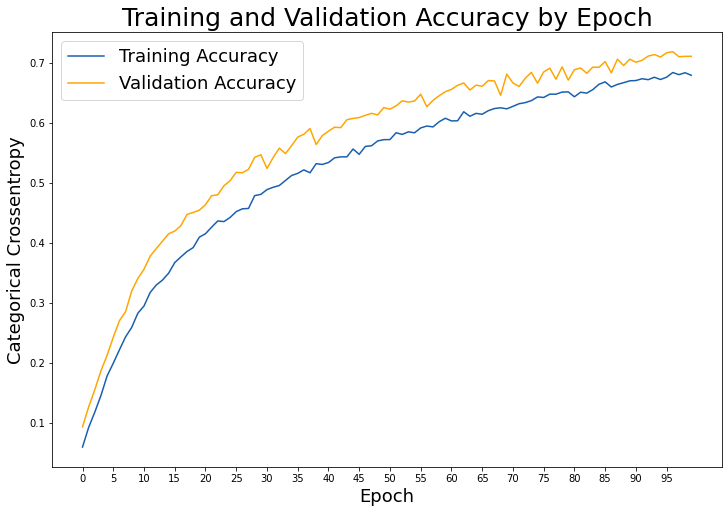

In [23]:
import matplotlib.pyplot as plt
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Set figure size.
plt.figure(figsize=(12, 8))
# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))
plt.legend(fontsize = 18);

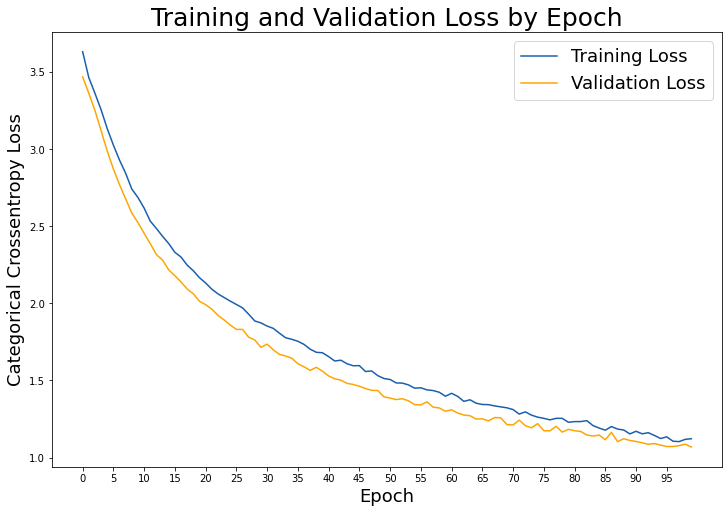

In [24]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['loss']
val_accuracy = history.history['val_loss']
# Set figure size.
plt.figure(figsize=(12, 8))
# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Loss', color='#185fad')
plt.plot(val_accuracy, label='Validation Loss', color='orange')
# Set title
plt.title('Training and Validation Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy Loss', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))
plt.legend(fontsize = 18);